# **Trabajo final**
# Determinantes Estructurales del Comportamiento Exportador de las Empresas Ecuatorianas en el Período 2019-2023

## Taller de programación - MEAP UBA
Integrantes:
- Jorge Eduardo Bolaños Gamarra
- Mario Antonio Valdivia Reyes
- Hector Sebastian San Martin


In [4]:
# Paso 1: Instalación limpia
!pip install -q ISLP l0bnb
!pip install -q linearmodels

# Paso 2: Importar librerías
import pandas as pd
import numpy as np
import ISLP
import l0bnb
import statsmodels.api as sm
from scipy import __version__ as scipy_version

print("✅ Librerías cargadas correctamente")
print("=" * 50)
print("Versión de NumPy:", np.__version__)
print("Versión de Pandas:", pd.__version__)
print("Versión de SciPy:", scipy_version)
print("Versión de Statsmodels:", sm.__version__)
print("Versión de ISLP:", ISLP.__version__)
print("l0bnb: ✅ Cargado correctamente")

✅ Librerías cargadas correctamente
Versión de NumPy: 2.0.2
Versión de Pandas: 2.2.2
Versión de SciPy: 1.16.3
Versión de Statsmodels: 0.14.5
Versión de ISLP: 0.4.0
l0bnb: ✅ Cargado correctamente


In [5]:
# Cargar las librerías para el análisis:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from statsmodels.api import OLS
import statsmodels.api as sm
import seaborn as sns
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

# Importar la base de datos y cargar las librerías

In [6]:
# 1. Montar Google Drive
from google.colab import drive
import os

# Desmontar cualquier montaje previo
try:
    drive.flush_and_unmount()
except:
    pass  # ignora si no había ningún montaje previo

# Montar Drive (forzando remount para evitar conflictos)
drive.mount('/content/drive', force_remount=True)

# Definir ruta a la carpeta de trabajo
ruta = "/content/drive/MyDrive/Taller de Programación - UBA/TF/"

# Verificar que la ruta existe
if os.path.exists(ruta):
    print(f"Ruta encontrada: {ruta}")
else:
    print(f"La ruta no existe: {ruta}")

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive
Ruta encontrada: /content/drive/MyDrive/Taller de Programación - UBA/TF/


In [7]:
# Cargar el archivo .dta:
df = pd.read_stata(ruta + "ENESEM final balanceada 2019 - 2023.dta")


/tmp/ipython-input-3608701231.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(ruta + "ENESEM final balanceada 2019 - 2023.dta")


In [8]:
# Mostrar las primeras filas del DataFrame cargado
display(df.head(4))

Year   id_empresa provincia cod_letra  \
0  2019.0  13582885014     Azuay         G   
1  2020.0  13582885014     Azuay         G   
2  2021.0  13582885014     Azuay         G   
3  2022.0  13582885014     Azuay         G   

                                           des_letra cod_ciiu2d  \
0  Comercio al por mayor y al por menor; reparaci...        G46   
1  Comercio al por mayor y al por menor; reparaci...        G46   
2  Comercio al por mayor y al por menor; reparaci...        G46   
3  Comercio al por mayor y al por menor; reparaci...        G46   

                                          des_ciiu2d cod_ciiu4d  \
0  Comercio al por mayor, excepto el de vehículos...      G4630   
1  Comercio al por mayor, excepto el de vehículos...      G4630   
2  Comercio al por mayor, excepto el de vehículos...      G4630   
3  Comercio al por mayor, excepto el de vehículos...      G4630   

                                          des_ciiu4d cod_letra_2da  ...  \
0  Venta al por mayor de alimentos, bebidas y tabaco                ...   
1  Venta al por mayor de alimentos, bebidas y tabaco                ...   
2  Venta al por mayor de alimentos, bebidas y tabaco                ...   
3  Venta al por mayor de alimentos, bebidas y tabaco                ...   

  ceepyc cacpt  hanuales      cant_ener cant_agua         k f_exp imputada  \
0    0.0   NaN  140040.0  308679.274740    2635.0  Nacional   1.0        2   
1    NaN   NaN  131328.0  440547.826999     135.0  Nacional   1.0            
2    NaN   NaN       NaN  410885.707434     717.0  Nacional   1.0            
3    0.0   0.0       NaN  561914.796611    1008.0  Nacional   1.0            

       des_tamano Imputada  
0  Grande Empresa      NaN  
1  Grande Empresa       No  
2  Grande Empresa       No  
3  Grande Empresa       No  

[4 rows x 1062 columns]

In [9]:
# Mostrar últimas filas del DataFrame cargado
display(df.tail(4))

Year   id_empresa provincia cod_letra  \
11566  2020.0  48461374096    Guayas         R   
11567  2021.0  48461374096    Guayas         R   
11568  2022.0  48461374096    Guayas         R   
11569  2023.0  48461374096    Guayas         R   

                                 des_letra cod_ciiu2d  \
11566  Artes, entretenimiento y recreación        R93   
11567  Artes, entretenimiento y recreación        R93   
11568  Artes, entretenimiento y recreación        R93   
11569  Artes, entretenimiento y recreación        R93   

                                              des_ciiu2d cod_ciiu4d  \
11566  Actividades deportivas, de esparcimiento y rec...      R9319   
11567  Actividades deportivas, de esparcimiento y rec...      R9319   
11568  Actividades deportivas, de esparcimiento y rec...      R9319   
11569  Actividades deportivas, de esparcimiento y rec...      R9319   

                         des_ciiu4d cod_letra_2da  ... ceepyc cacpt hanuales  \
11566  Otras actividades deportivas             G  ...    NaN   NaN  49248.0   
11567  Otras actividades deportivas             G  ...    NaN   NaN      NaN   
11568  Otras actividades deportivas                ...    0.0   0.0      NaN   
11569  Otras actividades deportivas                ...    0.0   0.0      NaN   

          cant_ener cant_agua         k f_exp imputada      des_tamano  \
11566  1.642778e+04     123.0  Nacional   1.0           Grande Empresa   
11567  4.191484e+06     664.0  Nacional   1.0           Grande Empresa   
11568  4.667050e+04     211.0  Nacional   1.0           Grande Empresa   
11569  4.553007e+04     490.0  Nacional   1.0           Grande Empresa   

      Imputada  
11566       No  
11567       No  
11568       No  
11569       No  

[4 rows x 1062 columns]

In [10]:
df['gasopera'].describe()

count    1.157000e+04
mean     3.829494e+06
std      1.505384e+07
min      0.000000e+00
25%      4.096660e+05
50%      1.018152e+06
75%      2.647637e+06
max      7.263534e+08
Name: gasopera, dtype: float64

In [11]:
# Nombres de columnas
print(list(df.columns))


['Year', 'id_empresa', 'provincia', 'cod_letra', 'des_letra', 'cod_ciiu2d', 'des_ciiu2d', 'cod_ciiu4d', 'des_ciiu4d', 'cod_letra_2da', 'des_letra_2da', 'cod_ciiu2d_2da', 'des_ciiu2d_2da', 'cod_ciiu4d_2da', 'des_ciiu4d_2da', 'cod_letra_3da', 'des_letra_3da', 'cod_ciiu2d_3da', 'des_ciiu2d_3da', 'cod_ciiu4d_3da', 'des_ciiu4d_3da', 'cod_sector', 'des_sector', 'cod_region', 'des_region', 'cod_tamano', 'anio_ruc_dis', 'capital_social_nac_privado', 'capital_social_nac_publico', 'capital_social_ext_privado', 'capital_social_ext_publico', 'v1001', 'v1002', 'v1003', 'v1004', 'v1005', 'v1006', 'v1007', 'v1008', 'v1009', 'v1010', 'v1011', 'v1012', 'v1013', 'v1014', 'v1015', 'v1016', 'v1017', 'v1018', 'v1019', 'v1020', 'v1021', 'v1022', 'v1023', 'v1024', 'v1025', 'v1026', 'v1027', 'v1028', 'v1029', 'v1030', 'v1031', 'v1032', 'v1033', 'v1034', 'v1035', 'v1036', 'v1037', 'v1038', 'v1039', 'v1040', 'v1041', 'v1042', 'v1043', 'v1044', 'v1045', 'v1046', 'v1047', 'v1048', 'v1049', 'v1050', 'v1051', 'v105

In [12]:
# Lista de las 20 variables seleccionadas
# Lista ordenada y corregida de variables seleccionadas
variables_seleccionadas = [

    # Identificación
    'Year',
    'id_empresa',

    # Exportaciones
    'v1005',  # Exportaciones netas
    'v1006',  # Exportación de bienes
    'v1007',  # Exportación de servicios

    # Ventas e ingresos
    'v1003',  # Total ventas
    'v2006',  # Ventas totales
    'v1004',  # Ventas netas locales de bienes
    'v1001',  # Total de ingresos

    # Costos y gastos
    'v1043',  # Costo de ventas
    'v1040',  # Total costo
    'v1041',  # Total costo y gasto
    'v1125',  # Costo en transporte
    'gasopera',  # Gasto operativo
    'v1181',  # Gasto financiero

    # Resultados financieros
    'v1203',  # Utilidad del ejercicio
    'valag',   # Valor agregado empresarial

    # Tamaño y capacidad productiva
    'prodtota',   # Producción total
    'v4001',     # Activo total
    'v4154',     # Activos fijos históricos
    'totalpeoc', # Personal ocupado total
    'des_tamano',# Tamaño de empresa

    # Capital humano y tecnológico
    'v5018',  # Profesionales científicos e intelectuales
    'tcaf',   # Construcción propia de activos fijos
    'v4182',  # I+D por cuenta propia

    # Capital financiero y estructura
    'capital_social_ext_privado',  # Capital extranjero privado
    'fbkf_1',  # Formación bruta de capital fijo
    'v1208',   # Pasivo total
    'v1209',   # Línea de crédito

    # Comercio exterior (importaciones)
    'v1050',  # Importaciones de bienes
    'v1059',  # Importaciones de materia prima

    # Ubicación geográfica
    'cod_region',

    # Sector económico
    'cod_ciiu2d',
    'des_sector'
]


# Crear DataFrame con las variables seleccionadas
df_exportadoras = df[variables_seleccionadas].copy()

# Mostrar información básica del nuevo DataFrame
print("Dimensiones del DataFrame de exportadoras:", df_exportadoras.shape)
print("\nPrimeras filas del DataFrame:")
print(df_exportadoras.head())

Dimensiones del DataFrame de exportadoras: (11570, 34)

Primeras filas del DataFrame:
     Year   id_empresa  v1005  v1006  v1007      v1003      v2006      v1004  \
0  2019.0  13582885014    0.0    0.0      0  9913036.0  9913036.0  9913036.0   
1  2020.0  13582885014    0.0    0.0      0  8376015.0  8376015.0  8376015.0   
2  2021.0  13582885014    0.0    0.0      0  8715832.0  8715832.0  8715832.0   
3  2022.0  13582885014    0.0    0.0      0  9959627.0  9959627.0  9959627.0   
4  2023.0  13582885014    0.0    0.0      0  5758087.0  5758087.0  5758087.0   

       v1001    v1043  ...  v4182  capital_social_ext_privado   fbkf_1  \
0  9913603.0  8340955  ...      0                         0.0      0.0   
1  8378317.0  7061307  ...      0                         NaN  25175.0   
2  8718659.0  7325440  ...      0                         NaN  27298.0   
3  9965272.0  8457969  ...      0                         0.0   4916.0   
4  5869664.0  4890869  ...      0                         0.0  

In [13]:
# Renombrar columnas
rename_dict = {
    'Year': 'anio',
    'id_empresa': 'id_empresa',
    'v1005': 'export_netas',
    'v1006': 'export_bienes',
    'v1007': 'export_servicios',
    'v1003': 'ventas_totales_bienes',
    'v2006': 'ventas_totales',
    'v1001': 'ingresos_totales',
    'v1043': 'costo_ventas',
    'v1040': 'costo_total',
    'v1041': 'costo_total_gasto',
    'v1125': 'costo_transporte',
    'gasopera': 'gasto_operativo',
    'v1181': 'gasto_financiero',
    'v1203': 'utilidad_ejercicio',
    'prodtota': 'produccion_total',
    'v4001': 'activo_total',
    'v4154': 'activos_fijos',
    'totalpeoc': 'personal_total',
    'des_tamano': 'tamano_empresa',
    'v5018': 'profesionales',
    'tcaf': 'activos_fijos_propia',
    'v4182': 'i_d',
    'capital_social_ext_privado': 'cap_social_ext_priv',
    'fbkf_1': 'formacion_capital',
    'v1209': 'linea_credito',
    'v1208': 'pasivo_total',
    'valag': 'valor_agregado',
    'v1004': 'ventas_locales',
    'v1050': 'costo_import_bienes',
    'v1059': 'costo_import_mp',
    'cod_region': 'region',
    'cod_ciiu2d': 'sector',
    'des_sector': 'desc_sector'
}

#Aplicar renombrado al DataFrame

df_exportadoras.rename(columns=rename_dict, inplace=True)

#Verificar el cambio

print(df_exportadoras.head())

     anio   id_empresa  export_netas  export_bienes  export_servicios  \
0  2019.0  13582885014           0.0            0.0                 0   
1  2020.0  13582885014           0.0            0.0                 0   
2  2021.0  13582885014           0.0            0.0                 0   
3  2022.0  13582885014           0.0            0.0                 0   
4  2023.0  13582885014           0.0            0.0                 0   

   ventas_totales_bienes  ventas_totales  ventas_locales  ingresos_totales  \
0              9913036.0       9913036.0       9913036.0         9913603.0   
1              8376015.0       8376015.0       8376015.0         8378317.0   
2              8715832.0       8715832.0       8715832.0         8718659.0   
3              9959627.0       9959627.0       9959627.0         9965272.0   
4              5758087.0       5758087.0       5758087.0         5869664.0   

   costo_ventas  ...  i_d  cap_social_ext_priv  formacion_capital  \
0       8340955  ...   

In [14]:
# Tipo de cada columna
df_exportadoras.dtypes

anio                      float32
id_empresa               category
export_netas              float64
export_bienes             float64
export_servicios            int32
ventas_totales_bienes     float64
ventas_totales            float64
ventas_locales            float64
ingresos_totales          float64
costo_ventas                int32
costo_total               float64
costo_total_gasto           int32
costo_transporte            int32
gasto_operativo             int32
gasto_financiero            int32
utilidad_ejercicio        float64
valor_agregado            float64
produccion_total          float64
activo_total              float64
activos_fijos             float64
personal_total              int16
tamano_empresa           category
profesionales               int16
activos_fijos_propia        int32
i_d                         int32
cap_social_ext_priv       float64
formacion_capital         float64
pasivo_total              float64
linea_credito            category
costo_import_bienes         int32
costo_import_mp             int32
region                   category
sector                     object
desc_sector                object
dtype: object

In [15]:
# Dimensiones
df_exportadoras.shape

(11570, 34)

In [16]:
# Crear variable binaria: 1 si exporta, 0 si no exporta
df_exportadoras['es_exportadora'] = df_exportadoras['export_netas'].apply(lambda x: 1 if x > 0 else 0)

# Verificar
print(df_exportadoras[['export_netas', 'es_exportadora']].head())
df_exportadoras['es_exportadora'].value_counts()


   export_netas  es_exportadora
0           0.0               0
1           0.0               0
2           0.0               0
3           0.0               0
4           0.0               0


es_exportadora
0    8158
1    3412
Name: count, dtype: int64

## **Estadísticas descriptivas**

In [17]:
# Estadísticas descriptivas
df_exportadoras.describe().T  # .T para transponer y verlo más claro

count          mean           std           min  \
anio                   11570.0  2.021000e+03  1.415460e+00  2.019000e+03   
export_netas           11570.0  8.005950e+06  1.435964e+08  0.000000e+00   
export_bienes          11570.0  7.718350e+06  1.435803e+08  0.000000e+00   
export_servicios       11570.0  2.875996e+05  2.793460e+06  0.000000e+00   
ventas_totales_bienes  11570.0  3.445497e+07  2.080685e+08  0.000000e+00   
ventas_totales         11570.0  4.476759e+07  2.151184e+08  0.000000e+00   
ventas_locales         11570.0  2.644902e+07  1.376680e+08  0.000000e+00   
ingresos_totales       11570.0  4.618600e+07  2.199056e+08  0.000000e+00   
costo_ventas           11570.0  2.023572e+07  6.755416e+07 -3.823632e+07   
costo_total            11570.0  2.722657e+07  1.725931e+08  0.000000e+00   
costo_total_gasto      11570.0  1.488365e+07  4.973836e+07  0.000000e+00   
costo_transporte       11570.0  1.454172e+04  4.546956e+05  0.000000e+00   
gasto_operativo        11570.0  3.829494e+06  1.505384e+07  0.000000e+00   
gasto_financiero       11570.0  7.089727e+05  3.255000e+06  0.000000e+00   
utilidad_ejercicio     11570.0  4.075775e+06  8.610159e+07 -2.673306e+09   
valor_agregado         11570.0  1.241532e+07  1.294674e+08 -1.982584e+09   
produccion_total       11570.0  3.152459e+07  2.082014e+08 -3.381782e+06   
activo_total           11570.0  6.218193e+07  8.857010e+08  0.000000e+00   
activos_fijos          11570.0  3.821229e+07  5.476311e+08  0.000000e+00   
personal_total         11570.0  2.601669e+02  6.295823e+02  0.000000e+00   
profesionales          11570.0  2.504875e+01  9.279108e+01  0.000000e+00   
activos_fijos_propia   11570.0  3.716692e+05  1.058365e+07 -3.686877e+06   
i_d                    11570.0  1.316539e+03  1.414287e+05  0.000000e+00   
cap_social_ext_priv    10204.0  2.287887e+01  4.031078e+01  0.000000e+00   
formacion_capital      11570.0  2.740440e+06  1.885276e+08 -1.698907e+09   
pasivo_total           11570.0  2.471383e+07  1.122968e+08  0.000000e+00   
costo_import_bienes    11570.0  4.114508e+06  1.661088e+07  0.000000e+00   
costo_import_mp        11570.0  2.438867e+06  1.453070e+07  0.000000e+00   
es_exportadora         11570.0  2.949006e-01  4.560178e-01  0.000000e+00   

                              25%         50%          75%           max  
anio                      2020.00      2021.0      2022.00  2.023000e+03  
export_netas                 0.00         0.0     57999.75  8.653567e+09  
export_bienes                0.00         0.0         0.00  8.653567e+09  
export_servicios             0.00         0.0         0.00  1.116410e+08  
ventas_totales_bienes  2507179.25   9519064.5  21948377.50  8.683470e+09  
ventas_totales         8202752.50  13877803.0  30376181.75  8.683470e+09  
ventas_locales               0.00   7934725.5  17903536.50  6.632978e+09  
ingresos_totales       8404347.75  14249559.5  31694227.25  8.977718e+09  
costo_ventas                 0.00   6299196.5  14984842.75  1.807324e+09  
costo_total            1306912.50   7355253.0  16941141.50  8.314099e+09  
costo_total_gasto      1808464.75   4558323.5  11266797.25  1.636342e+09  
costo_transporte             0.00         0.0         0.00  2.480641e+07  
gasto_operativo         409666.00   1018152.0   2647637.25  7.263534e+08  
gasto_financiero         22754.50    115891.5    433902.75  1.825754e+08  
utilidad_ejercicio       89548.25    453428.0   1712561.75  5.247073e+09  
valor_agregado         1200712.25   3055143.0   7256034.00  8.065296e+09  
produccion_total       2986024.00   8023319.5  19342382.25  8.977718e+09  
activo_total           4527991.00  10594655.5  28366928.50  6.605691e+10  
activos_fijos          1038943.25   3315882.0  12269458.00  3.029661e+10  
personal_total              39.00        92.0       241.00  1.234400e+04  
profesionales                0.00         4.0        16.00  2.333000e+03  
activos_fijos_propia         0.00         0.0         0.00  8.103218e+08  
i_d                

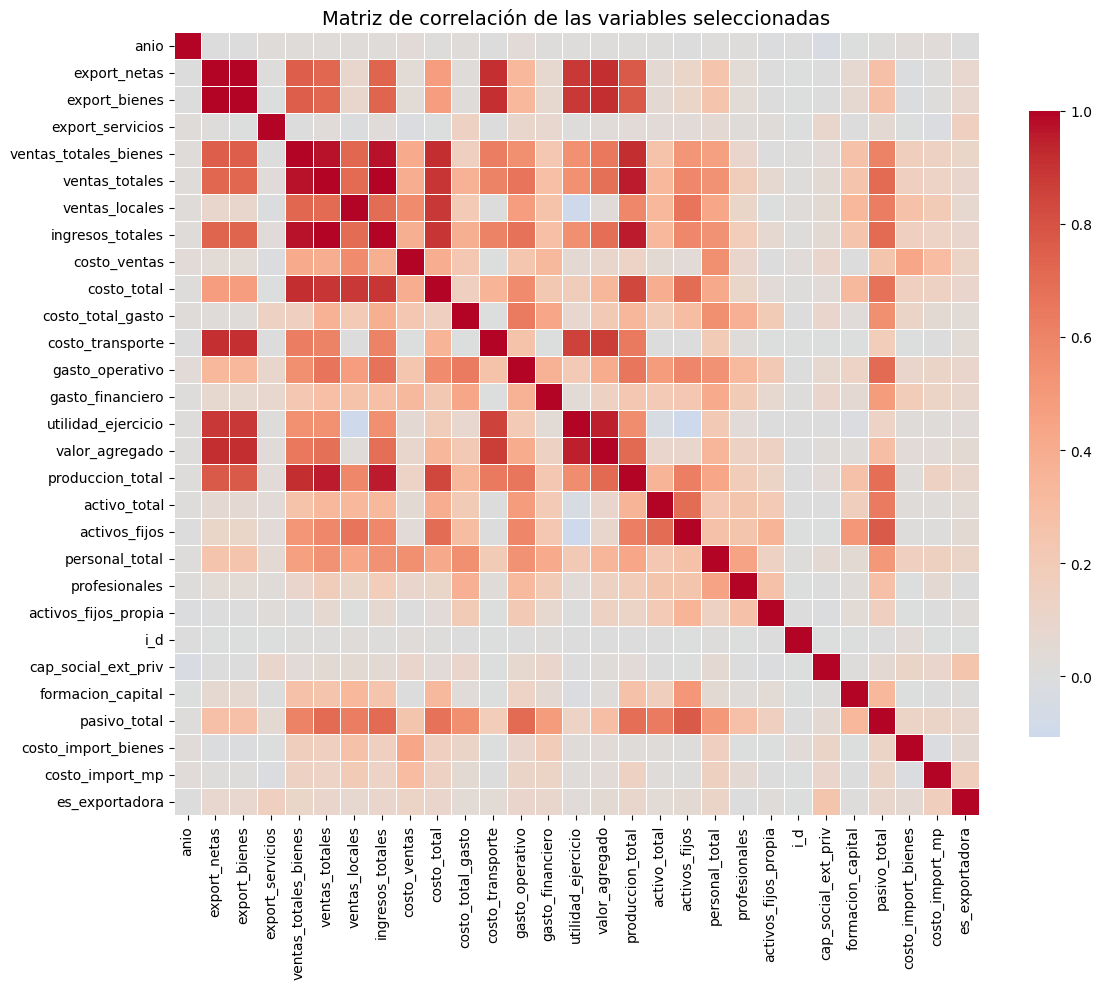

In [18]:
# Matriz de correlaciones
df_corr = df_exportadoras.select_dtypes(include='number')

# Calcular la matriz de correlaciones
corr_matrix = df_corr.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(
    corr_matrix,
    annot=False,               # mostrar valores numéricos
    fmt=".2f",               # formato de los números
    cmap="coolwarm",         # escala de colores
    center=0,                # centrado en 0
    linewidths=0.5,          # líneas divisorias
    cbar_kws={"shrink": 0.8} # tamaño de la barra de color
)

# Título del gráfico
plt.title("Matriz de correlación de las variables seleccionadas", fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# Correlaciones significativas
from scipy.stats import pearsonr

# Prueba de Hipótesis sobre la Correlación

# Hipótesis nula (H₀): No existe correlación lineal entre la variable X y export_netas.
# Hipótesis alternativa (H₁): Existe correlación lineal significativa entre la variable X y export_netas.

# Seleccionar solo variables numéricas (excluye categóricas)
numericas = df_exportadoras.select_dtypes(include='number').columns

# Crear lista para almacenar resultados
correlation_results = []

for col in numericas:
    if col != 'export_netas':  # evitar correlacionarse consigo misma
        corr_coef, p_value = pearsonr(df_exportadoras[col].fillna(0), df_exportadoras['export_netas'].fillna(0))
        correlation_results.append({
            'Variable': col,
            'Correlación con export_netas': corr_coef,
            'p-valor': p_value
        })

# Crear DataFrame final
df_correlaciones = pd.DataFrame(correlation_results)

# Ordenar por correlación absoluta descendente
df_correlaciones['AbsCorrelacion'] = df_correlaciones['Correlación con export_netas'].abs()
df_correlaciones.sort_values('AbsCorrelacion', ascending=False, inplace=True)
df_correlaciones.drop(columns='AbsCorrelacion', inplace=True)

# Mostrar tabla
pd.set_option('display.float_format', '{:.3f}'.format)
print(df_correlaciones)


                 Variable  Correlación con export_netas  p-valor
1           export_bienes                         1.000    0.000
14         valor_agregado                         0.919    0.000
10       costo_transporte                         0.905    0.000
13     utilidad_ejercicio                         0.887    0.000
15       produccion_total                         0.768    0.000
3   ventas_totales_bienes                         0.752    0.000
6        ingresos_totales                         0.728    0.000
4          ventas_totales                         0.727    0.000
8             costo_total                         0.478    0.000
11        gasto_operativo                         0.334    0.000
24           pasivo_total                         0.277    0.000
18         personal_total                         0.257    0.000
17          activos_fijos                         0.108    0.000
5          ventas_locales                         0.094    0.000
27         es_exportadora

## **Distribución de las variables**

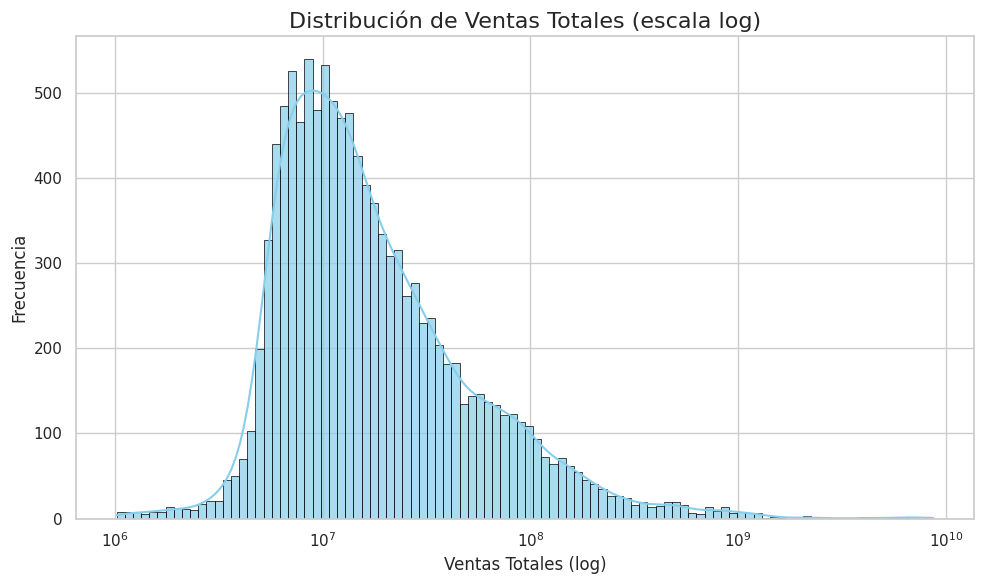

In [20]:
# -----------------------------
# Distribución de ventas totales (escala logarítmica)
# -----------------------------
sns.set(style="whitegrid")

# Filtrar solo valores positivos
ventas_pos = df_exportadoras[df_exportadoras['ventas_totales'] > 0]['ventas_totales']

plt.figure(figsize=(10,6))
sns.histplot(
    ventas_pos,
    bins=100,
    kde=True,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    log_scale=True  # Escala logarítmica en eje x
)

# Etiquetas y título
plt.title('Distribución de Ventas Totales (escala log)', fontsize=16)
plt.xlabel('Ventas Totales (log)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()


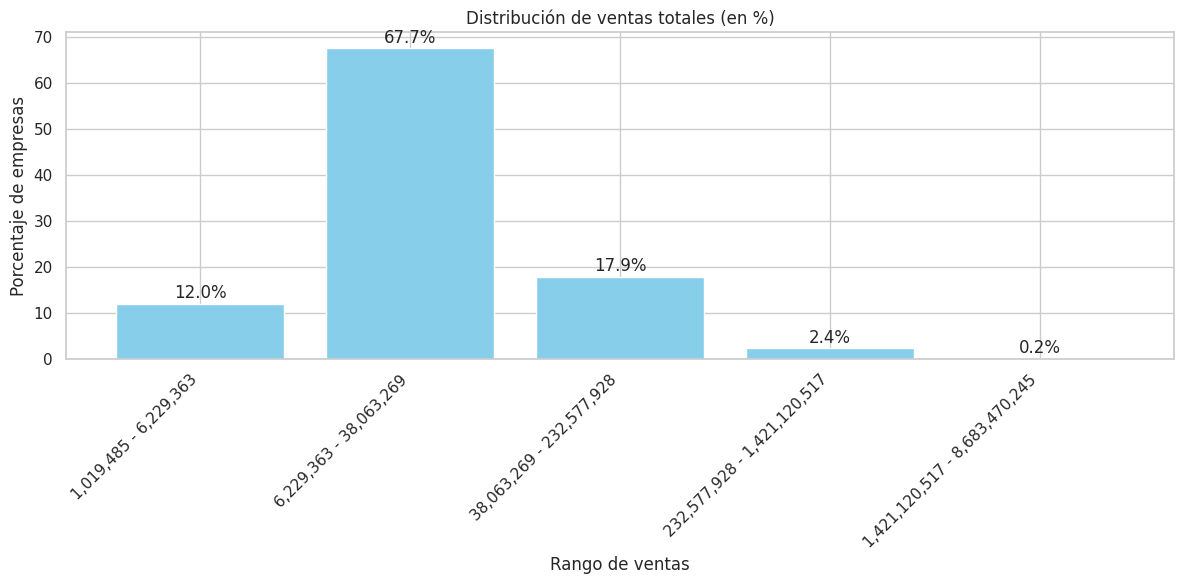

In [21]:
# Ventas totales
ventas = df_exportadoras['ventas_totales']

# Filtrar solo valores mayores a 0
ventas_pos = ventas[ventas > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(ventas_pos.min()), np.log10(ventas_pos.max()), n_bins+1)

# Crear los bins (sin incluir 0)
ventas_bins = pd.cut(ventas_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
ventas_counts = ventas_bins.value_counts().sort_index()

# Calcular porcentaje
ventas_pct = 100 * ventas_counts / ventas_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}" for interval in ventas_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, ventas_pct.values, color='skyblue')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, ventas_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f"{pct:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de ventas")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de ventas totales (en %)")
plt.tight_layout()
plt.show()


In [22]:
df_exportadoras.columns

Index(['anio', 'id_empresa', 'export_netas', 'export_bienes',
       'export_servicios', 'ventas_totales_bienes', 'ventas_totales',
       'ventas_locales', 'ingresos_totales', 'costo_ventas', 'costo_total',
       'costo_total_gasto', 'costo_transporte', 'gasto_operativo',
       'gasto_financiero', 'utilidad_ejercicio', 'valor_agregado',
       'produccion_total', 'activo_total', 'activos_fijos', 'personal_total',
       'tamano_empresa', 'profesionales', 'activos_fijos_propia', 'i_d',
       'cap_social_ext_priv', 'formacion_capital', 'pasivo_total',
       'linea_credito', 'costo_import_bienes', 'costo_import_mp', 'region',
       'sector', 'desc_sector', 'es_exportadora'],
      dtype='object')

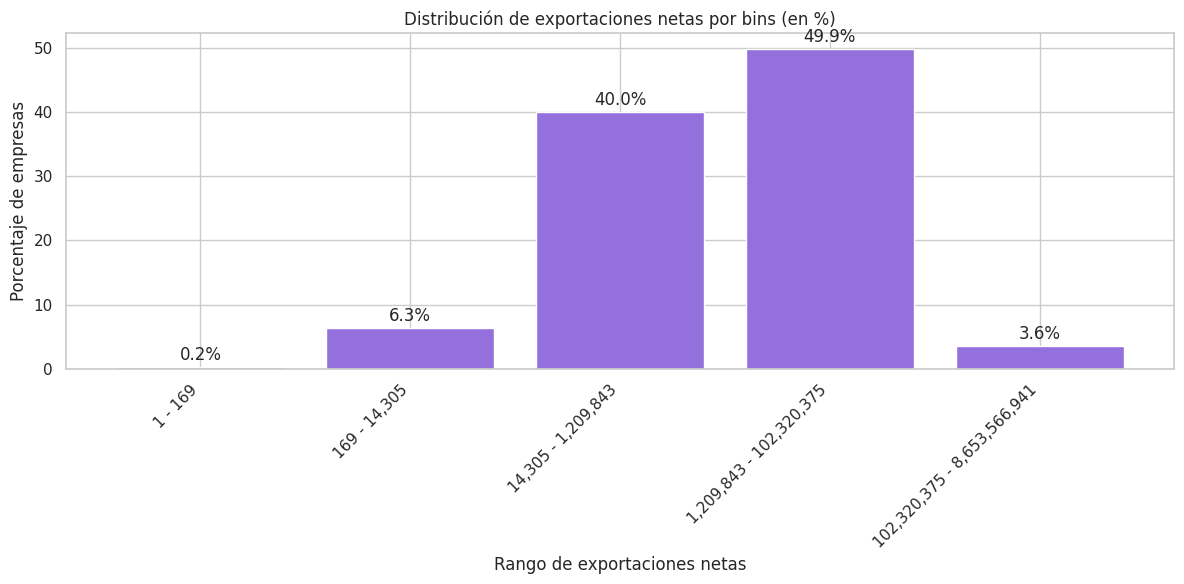

In [23]:
# -----------------------------
# Distribución de exportaciones netas
# -----------------------------

# Seleccionar la variable
export_netas = df_exportadoras['export_netas']

# Filtrar solo valores mayores a 0
export_netas = export_netas[export_netas > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(export_netas.min()), np.log10(export_netas.max()), n_bins+1)

# Crear los bins (sin incluir 0)
export_bins = pd.cut(export_netas, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
export_counts = export_bins.value_counts().sort_index()

# Calcular porcentaje
export_pct = 100 * export_counts / export_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}" for interval in export_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, export_pct.values, color='mediumpurple')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, export_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f"{pct:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de exportaciones netas")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de exportaciones netas por bins (en %)")
plt.tight_layout()
plt.show()


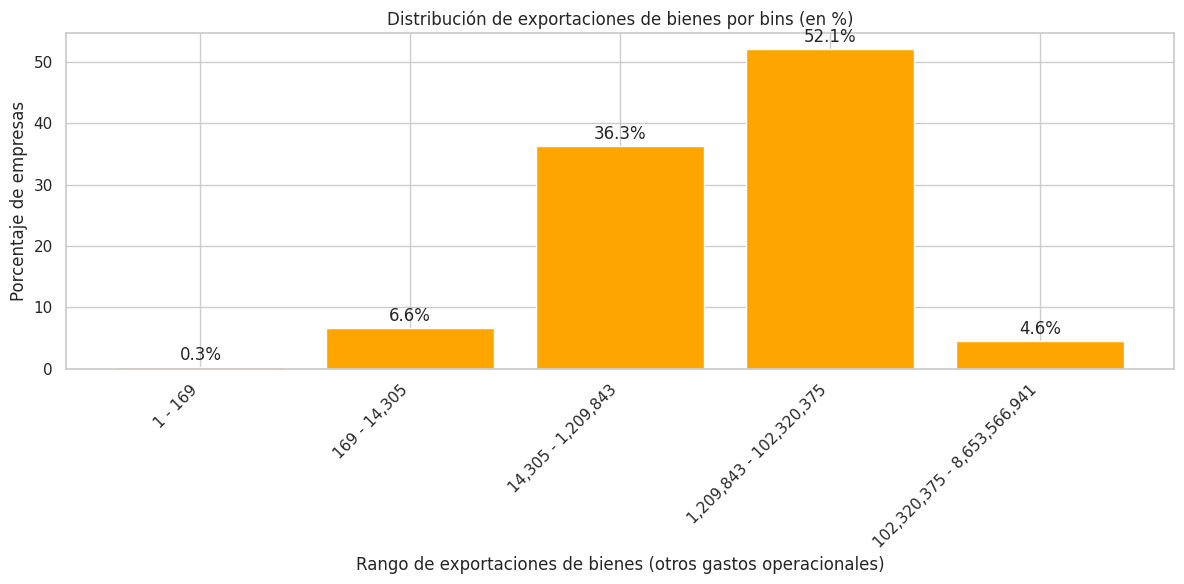

In [24]:
# -----------------------------
# Distribución de exportaciones de bienes (Otros gastos operacionales)
# -----------------------------

# Seleccionar la variable
export_bienes = df_exportadoras['export_bienes']

# Filtrar solo valores mayores a 0
export_bienes_pos = export_bienes[export_bienes > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(export_bienes_pos.min()),
                       np.log10(export_bienes_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
export_bienes_bins = pd.cut(export_bienes_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
export_bienes_counts = export_bienes_bins.value_counts().sort_index()

# Calcular porcentaje
export_bienes_pct = 100 * export_bienes_counts / export_bienes_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in export_bienes_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, export_bienes_pct.values, color='orange')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, export_bienes_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de exportaciones de bienes (otros gastos operacionales)")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de exportaciones de bienes por bins (en %)")
plt.tight_layout()
plt.show()


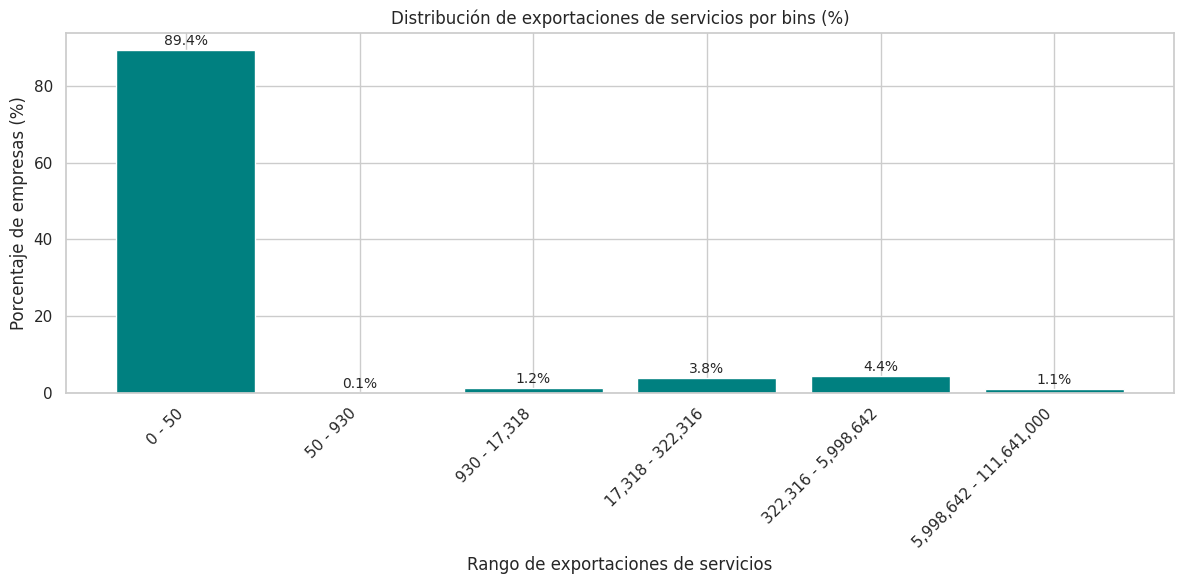

In [25]:
# -----------------------------
# Distribución de exportaciones de servicios
# -----------------------------

# Seleccionar la variable
export_servicios = df_exportadoras['export_servicios']

# Filtrar solo valores mayores a 0
export_servicios_pos = export_servicios[export_servicios > 0]

# Número de bins para los valores positivos
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(export_servicios_pos.min()),
                       np.log10(export_servicios_pos.max()),
                       n_bins+1)

# Combinar con un bin separado para 0
bins = np.concatenate(([0], bins_pos))

# Crear los bins
export_servicios_bins = pd.cut(export_servicios, bins=bins, include_lowest=True)
export_servicios_counts = export_servicios_bins.value_counts().sort_index()

# Excluir categorías con frecuencia cero
export_servicios_counts = export_servicios_counts[export_servicios_counts > 0]

# Convertir a porcentaje
export_servicios_percent = export_servicios_counts / export_servicios_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in export_servicios_percent.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, export_servicios_percent.values, color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de exportaciones de servicios")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de exportaciones de servicios por bins (%)")

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, export_servicios_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


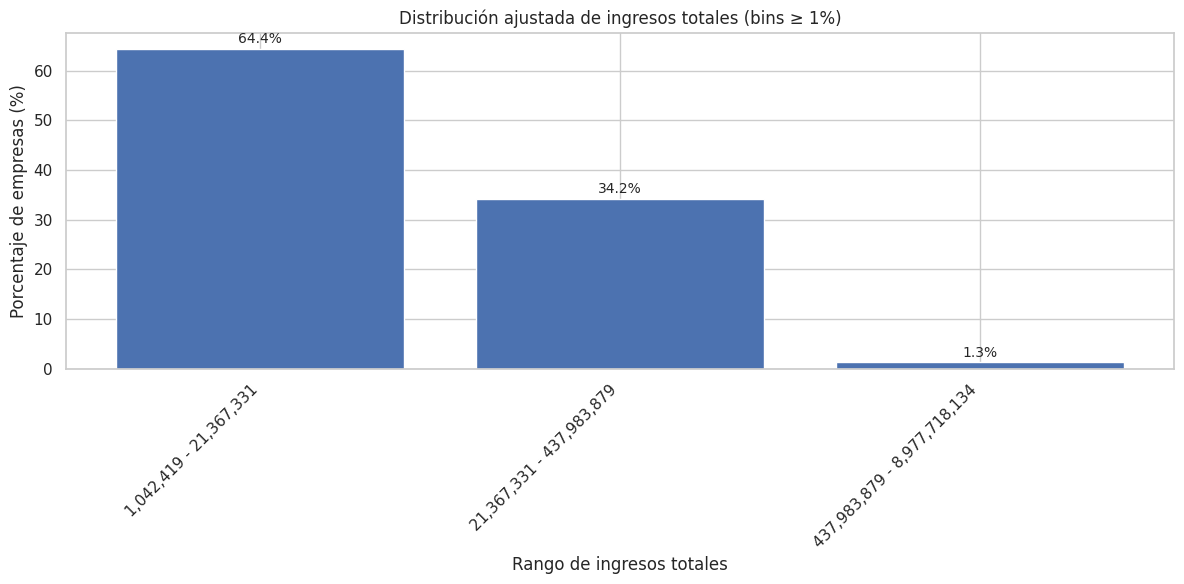

In [26]:
# -----------------------------
# Distribución de ingresos totales (sin bins < 1%)
# -----------------------------

ingresos_totales = df_exportadoras['ingresos_totales']
ingresos_pos = ingresos_totales[ingresos_totales > 0]

n_bins = 5

bins = np.logspace(np.log10(ingresos_pos.min()),
                   np.log10(ingresos_pos.max()),
                   n_bins + 1)

ingresos_bins = pd.cut(ingresos_pos, bins=bins, include_lowest=True)

# Conteo por bin
ingresos_counts = ingresos_bins.value_counts().sort_index()

# Eliminar bins vacíos
ingresos_counts = ingresos_counts[ingresos_counts > 0]

# Calcular porcentajes
ingresos_percent = ingresos_counts / ingresos_counts.sum() * 100

# Eliminar bins con menos de 1%
mask = ingresos_percent >= 1
ingresos_percent = ingresos_percent[mask]
ingresos_counts = ingresos_counts[mask]

# Etiquetas solo para bins válidos
labels = [
    f"{int(interval.left):,} - {int(interval.right):,}"
    for interval in ingresos_percent.index
]

# Gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, ingresos_percent.values)

for bar, pct in zip(bars, ingresos_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de ingresos totales")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución ajustada de ingresos totales (bins ≥ 1%)")
plt.tight_layout()
plt.show()


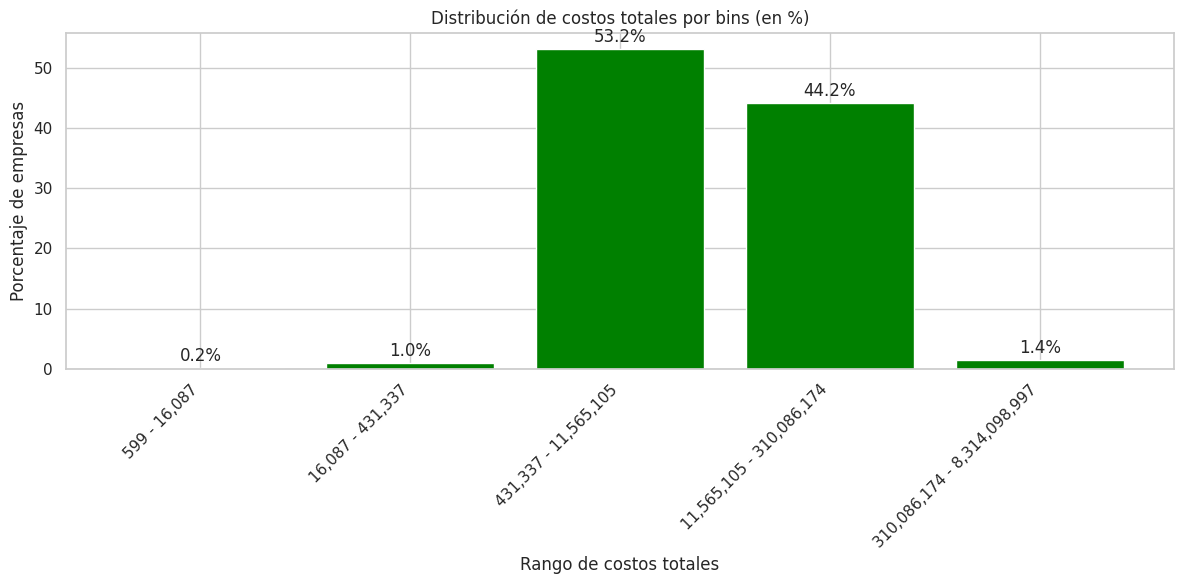

In [27]:
# -----------------------------
# Distribución de costos totales
# -----------------------------

# Seleccionar la variable
costos_totales = df_exportadoras['costo_total']

# Filtrar solo valores mayores a 0
costos_pos = costos_totales[costos_totales > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(costos_pos.min()),
                       np.log10(costos_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
costos_bins = pd.cut(costos_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
costos_counts = costos_bins.value_counts().sort_index()

# Calcular porcentaje
costos_pct = 100 * costos_counts / costos_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in costos_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, costos_pct.values, color='green')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, costos_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costos totales")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de costos totales por bins (en %)")
plt.tight_layout()
plt.show()


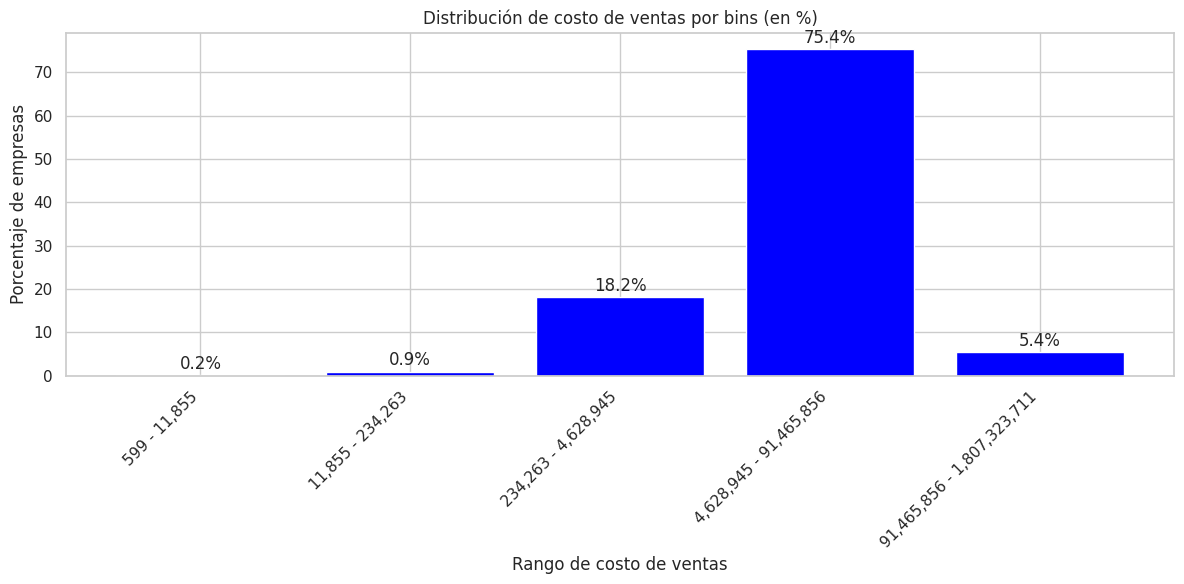

In [28]:
# -----------------------------
# Distribución de costo de ventas
# -----------------------------

# Seleccionar la variable
costo_ventas = df_exportadoras['costo_ventas']

# Filtrar solo valores mayores a 0
ventas_pos = costo_ventas[costo_ventas > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(ventas_pos.min()),
                       np.log10(ventas_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
ventas_bins = pd.cut(ventas_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
ventas_counts = ventas_bins.value_counts().sort_index()

# Calcular porcentaje
ventas_pct = 100 * ventas_counts / ventas_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in ventas_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, ventas_pct.values, color='blue')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, ventas_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costo de ventas")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de costo de ventas por bins (en %)")
plt.tight_layout()
plt.show()


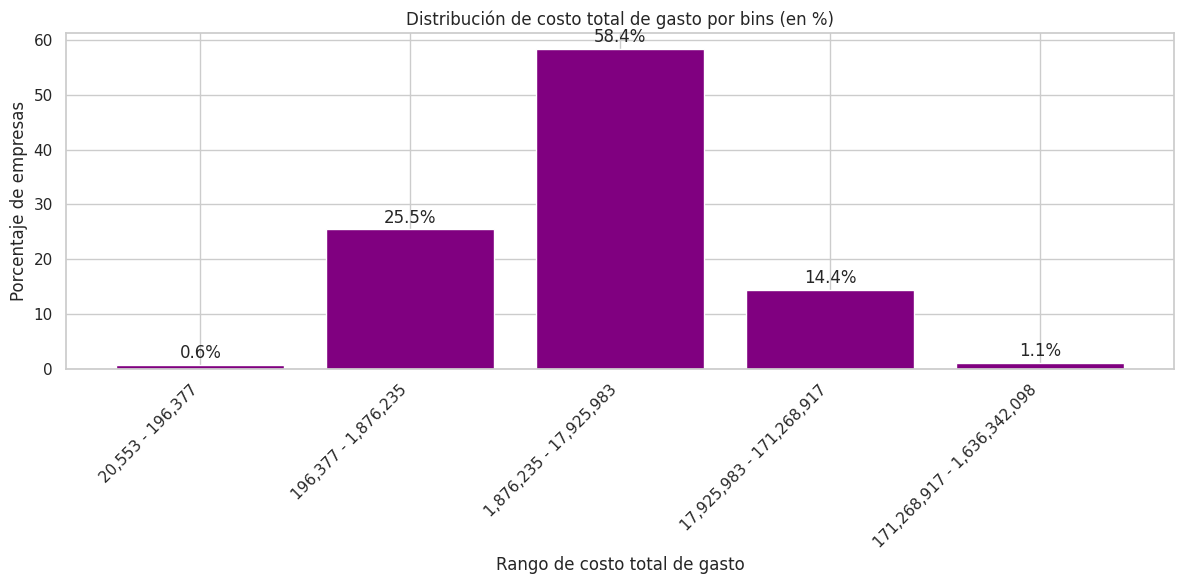

In [29]:
# -----------------------------
# Distribución de costo total de gasto
# -----------------------------

# Seleccionar la variable
costo_total_gasto = df_exportadoras['costo_total_gasto']

# Filtrar solo valores mayores a 0
gasto_pos = costo_total_gasto[costo_total_gasto > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(gasto_pos.min()),
                       np.log10(gasto_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
gasto_bins = pd.cut(gasto_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
gasto_counts = gasto_bins.value_counts().sort_index()

# Calcular porcentaje
gasto_pct = 100 * gasto_counts / gasto_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in gasto_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, gasto_pct.values, color='purple')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, gasto_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costo total de gasto")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de costo total de gasto por bins (en %)")
plt.tight_layout()
plt.show()


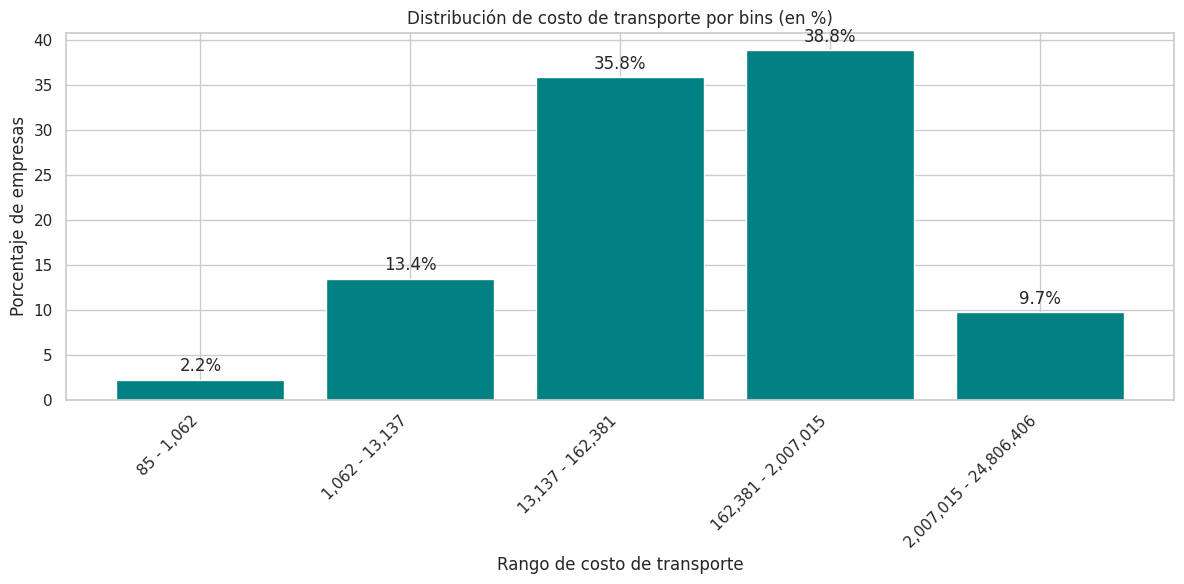

In [30]:
# -----------------------------
# Distribución de costo de transporte
# -----------------------------

# Seleccionar la variable
costo_transporte = df_exportadoras['costo_transporte']

# Filtrar solo valores mayores a 0
transporte_pos = costo_transporte[costo_transporte > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(transporte_pos.min()),
                       np.log10(transporte_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
transporte_bins = pd.cut(transporte_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
transporte_counts = transporte_bins.value_counts().sort_index()

# Calcular porcentaje
transporte_pct = 100 * transporte_counts / transporte_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in transporte_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, transporte_pct.values, color='teal')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, transporte_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costo de transporte")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de costo de transporte por bins (en %)")
plt.tight_layout()
plt.show()


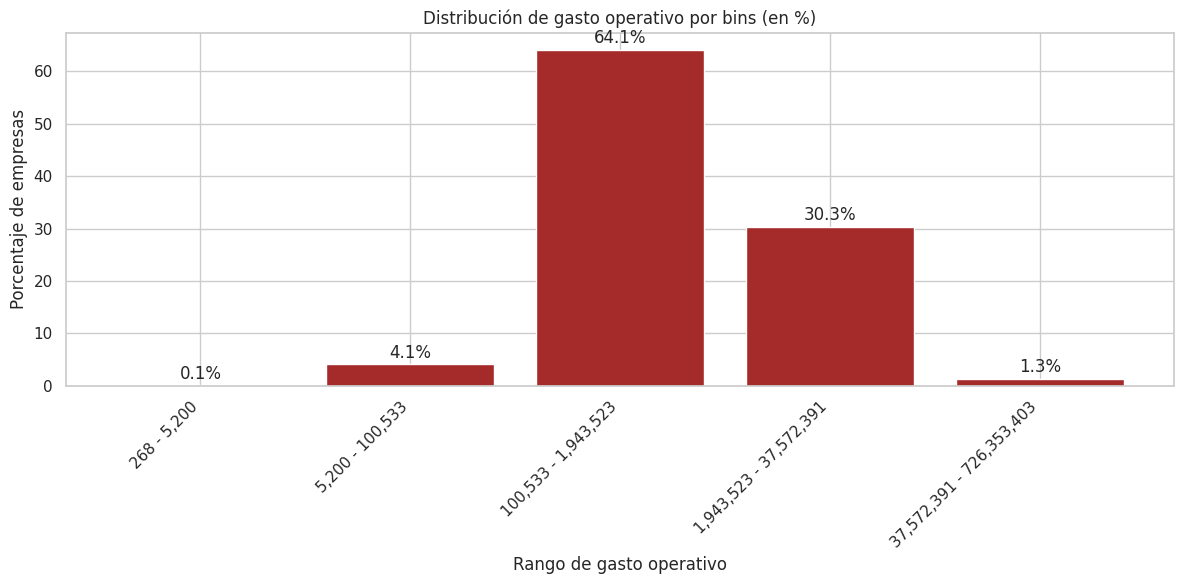

In [31]:
# -----------------------------
# Distribución de gasto operativo
# -----------------------------

# Seleccionar la variable
gasto_operativo = df_exportadoras['gasto_operativo']

# Filtrar solo valores mayores a 0
operativo_pos = gasto_operativo[gasto_operativo > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(operativo_pos.min()),
                       np.log10(operativo_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
operativo_bins = pd.cut(operativo_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
operativo_counts = operativo_bins.value_counts().sort_index()

# Calcular porcentaje
operativo_pct = 100 * operativo_counts / operativo_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in operativo_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, operativo_pct.values, color='brown')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, operativo_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de gasto operativo")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de gasto operativo por bins (en %)")
plt.tight_layout()
plt.show()


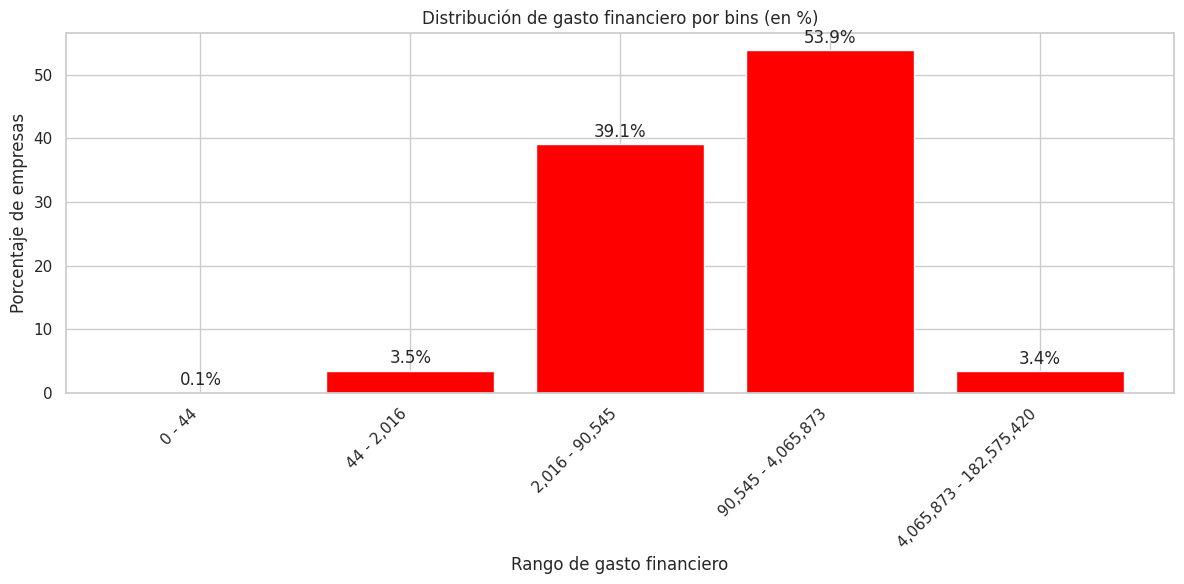

In [32]:
# -----------------------------
# Distribución de gasto financiero
# -----------------------------

# Seleccionar la variable
gasto_financiero = df_exportadoras['gasto_financiero']

# Filtrar solo valores mayores a 0
financiero_pos = gasto_financiero[gasto_financiero > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(financiero_pos.min()),
                       np.log10(financiero_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
financiero_bins = pd.cut(financiero_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
financiero_counts = financiero_bins.value_counts().sort_index()

# Calcular porcentaje
financiero_pct = 100 * financiero_counts / financiero_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in financiero_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, financiero_pct.values, color='red')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, financiero_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de gasto financiero")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de gasto financiero por bins (en %)")
plt.tight_layout()
plt.show()


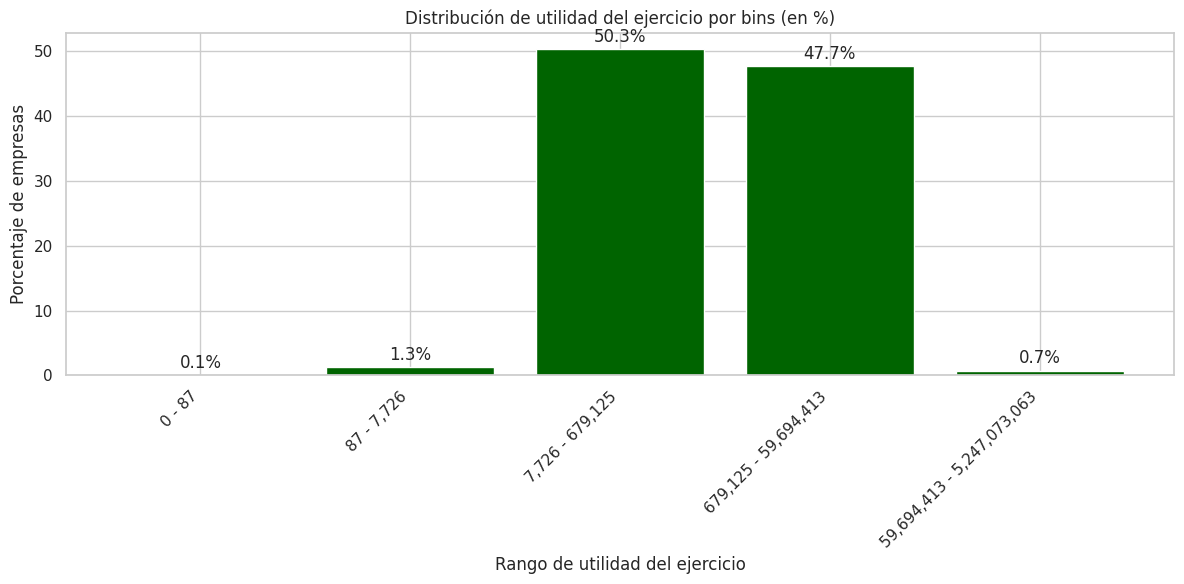

In [33]:
# -----------------------------
# Distribución de utilidad del ejercicio
# -----------------------------

# Seleccionar la variable
utilidad_ejercicio = df_exportadoras['utilidad_ejercicio']

# Filtrar solo valores mayores a 0
utilidad_pos = utilidad_ejercicio[utilidad_ejercicio > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(utilidad_pos.min()),
                       np.log10(utilidad_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
utilidad_bins = pd.cut(utilidad_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
utilidad_counts = utilidad_bins.value_counts().sort_index()

# Calcular porcentaje
utilidad_pct = 100 * utilidad_counts / utilidad_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in utilidad_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, utilidad_pct.values, color='darkgreen')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, utilidad_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de utilidad del ejercicio")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de utilidad del ejercicio por bins (en %)")
plt.tight_layout()
plt.show()


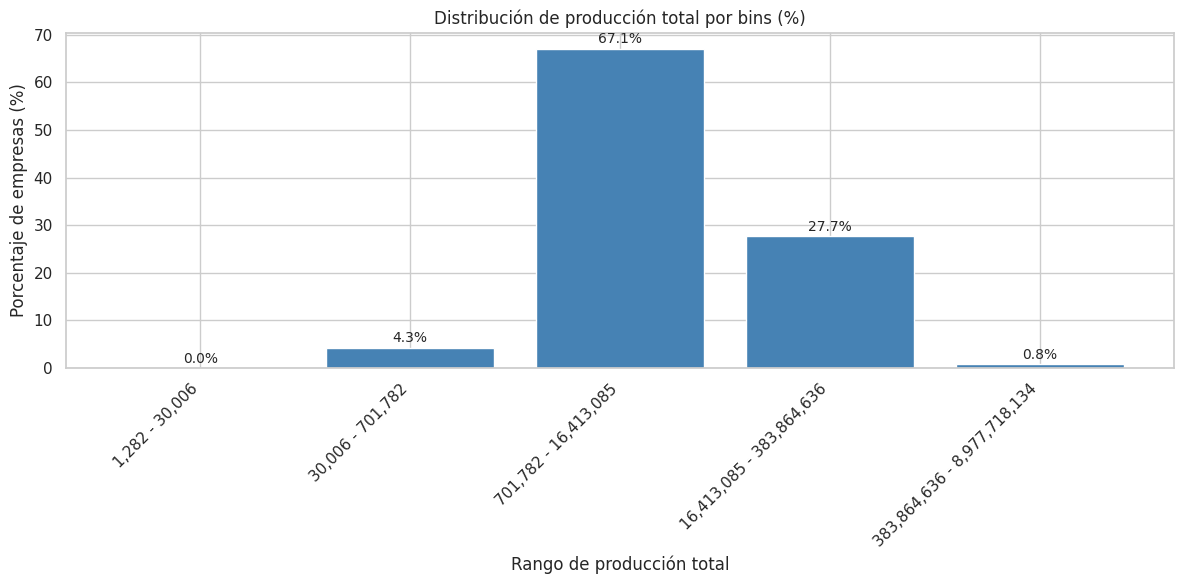

In [34]:
# -----------------------------
# Distribución de producción total
# -----------------------------

# Seleccionar la variable
produccion_total = df_exportadoras['produccion_total']

# Filtrar solo valores mayores a 0
produccion_pos = produccion_total[produccion_total > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(produccion_pos.min()),
                   np.log10(produccion_pos.max()),
                   n_bins + 1)

# Crear los bins
produccion_bins = pd.cut(produccion_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
produccion_counts = produccion_bins.value_counts().sort_index()

# Excluir bins vacíos
produccion_counts = produccion_counts[produccion_counts > 0]

# Calcular porcentaje
produccion_percent = produccion_counts / produccion_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in produccion_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, produccion_percent.values, color='steelblue')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, produccion_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de producción total")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de producción total por bins (%)")
plt.tight_layout()
plt.show()


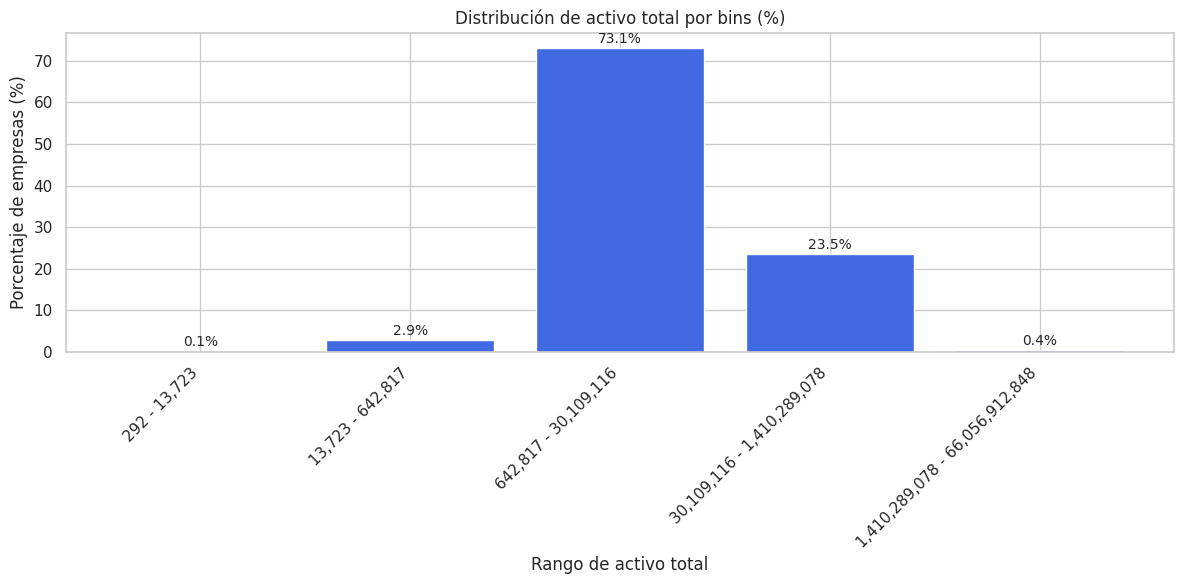

In [35]:
# -----------------------------
# Distribución de activo total
# -----------------------------

# Seleccionar la variable
activo_total = df_exportadoras['activo_total']

# Filtrar solo valores mayores a 0
activo_pos = activo_total[activo_total > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(activo_pos.min()),
                   np.log10(activo_pos.max()),
                   n_bins + 1)

# Crear los bins
activo_bins = pd.cut(activo_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
activo_counts = activo_bins.value_counts().sort_index()

# Excluir bins vacíos
activo_counts = activo_counts[activo_counts > 0]

# Calcular porcentaje
activo_percent = activo_counts / activo_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in activo_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, activo_percent.values, color='royalblue')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, activo_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de activo total")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de activo total por bins (%)")
plt.tight_layout()
plt.show()


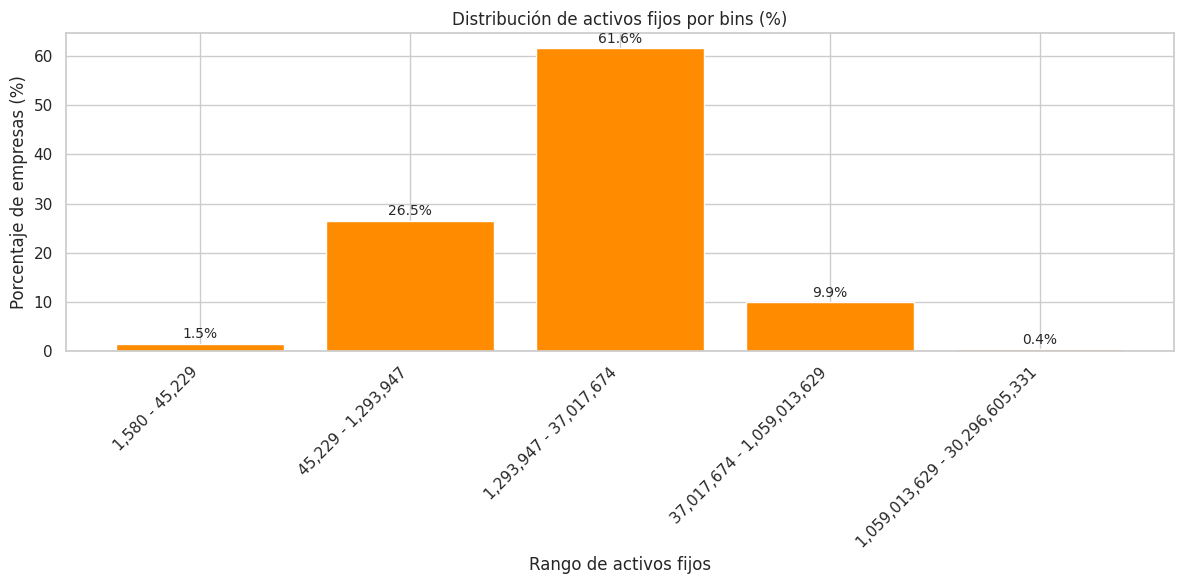

In [36]:
# -----------------------------
# Distribución de activos fijos
# -----------------------------

# Seleccionar la variable
activos_fijos = df_exportadoras['activos_fijos']

# Filtrar solo valores mayores a 0
activos_fijos_pos = activos_fijos[activos_fijos > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(activos_fijos_pos.min()),
                   np.log10(activos_fijos_pos.max()),
                   n_bins + 1)

# Crear los bins
activos_fijos_bins = pd.cut(activos_fijos_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
activos_fijos_counts = activos_fijos_bins.value_counts().sort_index()

# Excluir bins vacíos
activos_fijos_counts = activos_fijos_counts[activos_fijos_counts > 0]

# Calcular porcentaje
activos_fijos_percent = activos_fijos_counts / activos_fijos_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in activos_fijos_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, activos_fijos_percent.values, color='darkorange')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, activos_fijos_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de activos fijos")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de activos fijos por bins (%)")
plt.tight_layout()
plt.show()


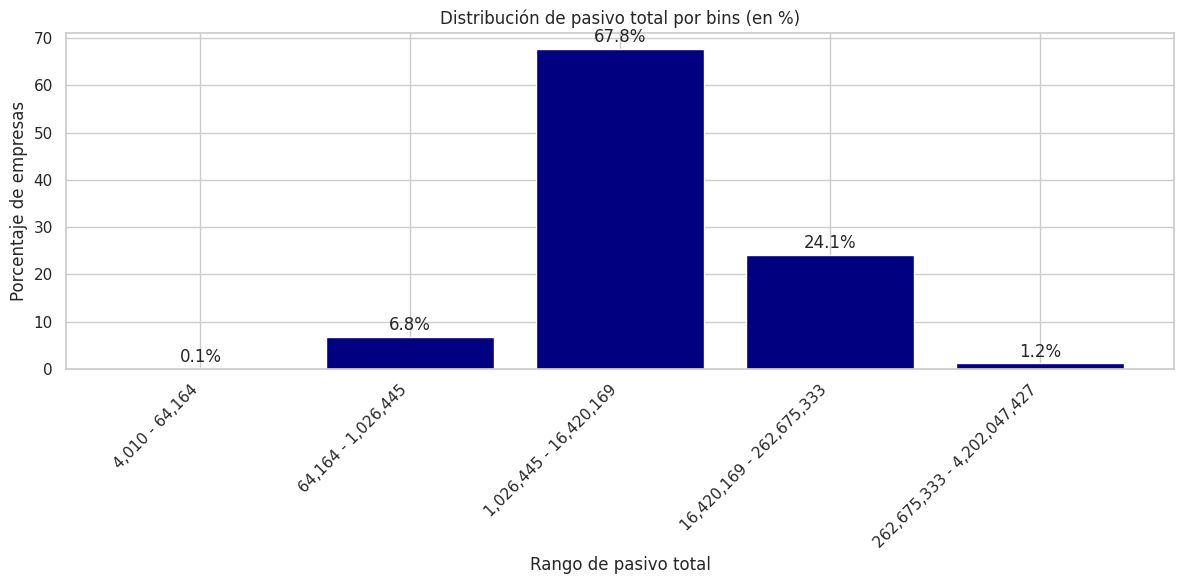

In [37]:
# -----------------------------
# Distribución de pasivo total
# -----------------------------

# Seleccionar la variable
pasivo_total = df_exportadoras['pasivo_total']

# Filtrar solo valores mayores a 0
pasivo_pos = pasivo_total[pasivo_total > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos para los valores > 0
bins_pos = np.logspace(np.log10(pasivo_pos.min()),
                       np.log10(pasivo_pos.max()),
                       n_bins+1)

# Crear los bins (sin incluir 0)
pasivo_bins = pd.cut(pasivo_pos, bins=bins_pos, include_lowest=True)

# Contar observaciones por bin
pasivo_counts = pasivo_bins.value_counts().sort_index()

# Calcular porcentaje
pasivo_pct = 100 * pasivo_counts / pasivo_counts.sum()

# Preparar etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in pasivo_counts.index]

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, pasivo_pct.values, color='navy')

# Añadir etiquetas de porcentaje sobre cada barra
for bar, pct in zip(bars, pasivo_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de pasivo total")
plt.ylabel("Porcentaje de empresas")
plt.title("Distribución de pasivo total por bins (en %)")
plt.tight_layout()
plt.show()


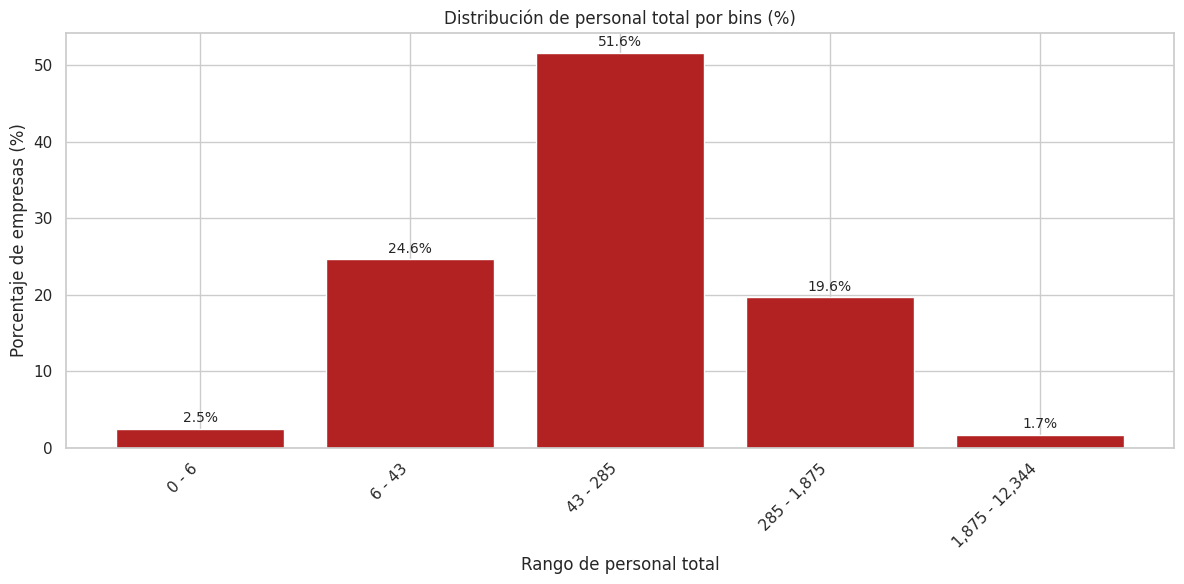

In [38]:
# -----------------------------
# Distribución de personal total
# -----------------------------

# Seleccionar la variable
personal_total = df_exportadoras['personal_total']

# Filtrar solo valores mayores a 0
personal_pos = personal_total[personal_total > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(personal_pos.min()),
                   np.log10(personal_pos.max()),
                   n_bins + 1)

# Crear los bins
personal_bins = pd.cut(personal_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
personal_counts = personal_bins.value_counts().sort_index()

# Excluir bins vacíos
personal_counts = personal_counts[personal_counts > 0]

# Calcular porcentaje
personal_percent = personal_counts / personal_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in personal_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, personal_percent.values, color='firebrick')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, personal_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de personal total")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de personal total por bins (%)")
plt.tight_layout()
plt.show()


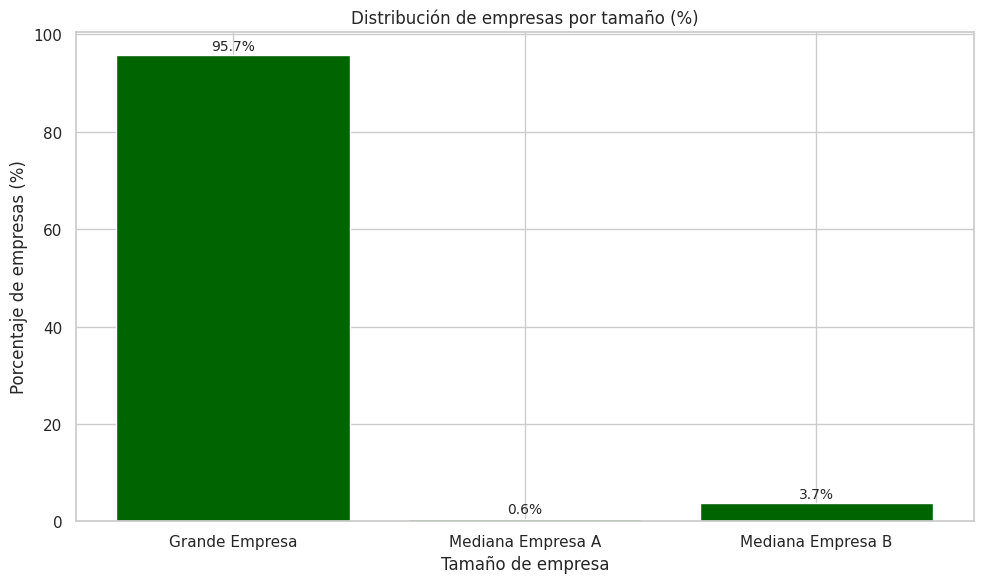

In [39]:
# -----------------------------
# Frecuencia de tamaño de empresas
# -----------------------------

# Contar frecuencia
tamano_counts = df_exportadoras['tamano_empresa'].value_counts().sort_index()

# Excluir valores con conteo 0 (por seguridad)
tamano_counts = tamano_counts[tamano_counts > 0]

# Calcular porcentaje
tamano_percent = tamano_counts / tamano_counts.sum() * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(tamano_percent.index.astype(str),
               tamano_percent.values,
               color='darkgreen')

# Etiquetas sobre cada barra
for bar, pct in zip(bars, tamano_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Tamaño de empresa")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de empresas por tamaño (%)")
plt.tight_layout()
plt.show()


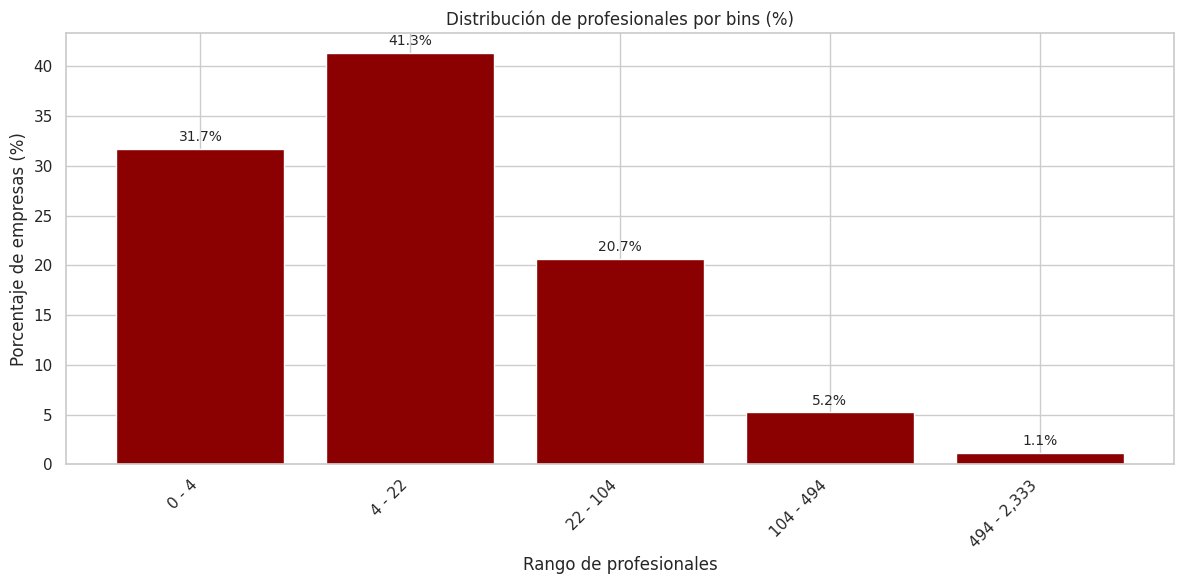

In [40]:
# -----------------------------
# Distribución de profesionales
# -----------------------------

# Seleccionar la variable
profesionales = df_exportadoras['profesionales']

# Filtrar solo valores mayores a 0
profesionales_pos = profesionales[profesionales > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(profesionales_pos.min()),
                   np.log10(profesionales_pos.max()),
                   n_bins + 1)

# Crear los bins
profesionales_bins = pd.cut(profesionales_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
profesionales_counts = profesionales_bins.value_counts().sort_index()

# Excluir bins vacíos
profesionales_counts = profesionales_counts[profesionales_counts > 0]

# Calcular porcentaje
profesionales_percent = profesionales_counts / profesionales_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in profesionales_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, profesionales_percent.values, color='darkred')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, profesionales_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de profesionales")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de profesionales por bins (%)")
plt.tight_layout()
plt.show()


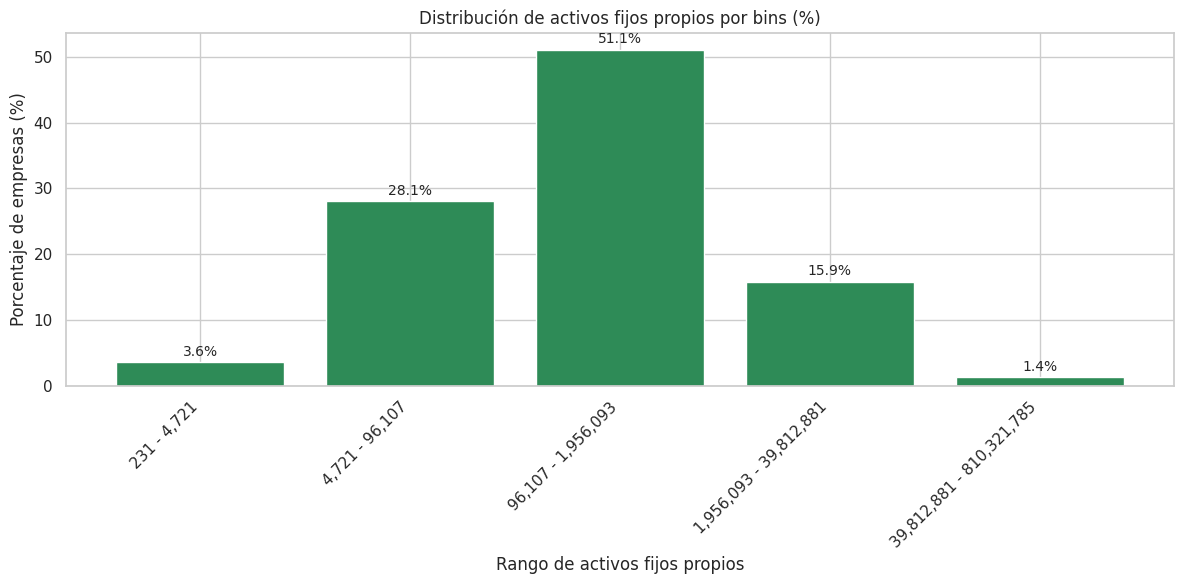

In [41]:
# -----------------------------
# Distribución de activos fijos propios
# -----------------------------

# Seleccionar la variable
activos_fijos_propia = df_exportadoras['activos_fijos_propia']

# Filtrar solo valores mayores a 0
activos_fijos_propia_pos = activos_fijos_propia[activos_fijos_propia > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(activos_fijos_propia_pos.min()),
                   np.log10(activos_fijos_propia_pos.max()),
                   n_bins + 1)

# Crear los bins
activos_fijos_propia_bins = pd.cut(activos_fijos_propia_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
activos_fijos_propia_counts = activos_fijos_propia_bins.value_counts().sort_index()

# Excluir bins vacíos
activos_fijos_propia_counts = activos_fijos_propia_counts[activos_fijos_propia_counts > 0]

# Calcular porcentaje
activos_fijos_propia_percent = activos_fijos_propia_counts / activos_fijos_propia_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in activos_fijos_propia_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, activos_fijos_propia_percent.values, color='seagreen')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, activos_fijos_propia_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de activos fijos propios")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de activos fijos propios por bins (%)")
plt.tight_layout()
plt.show()


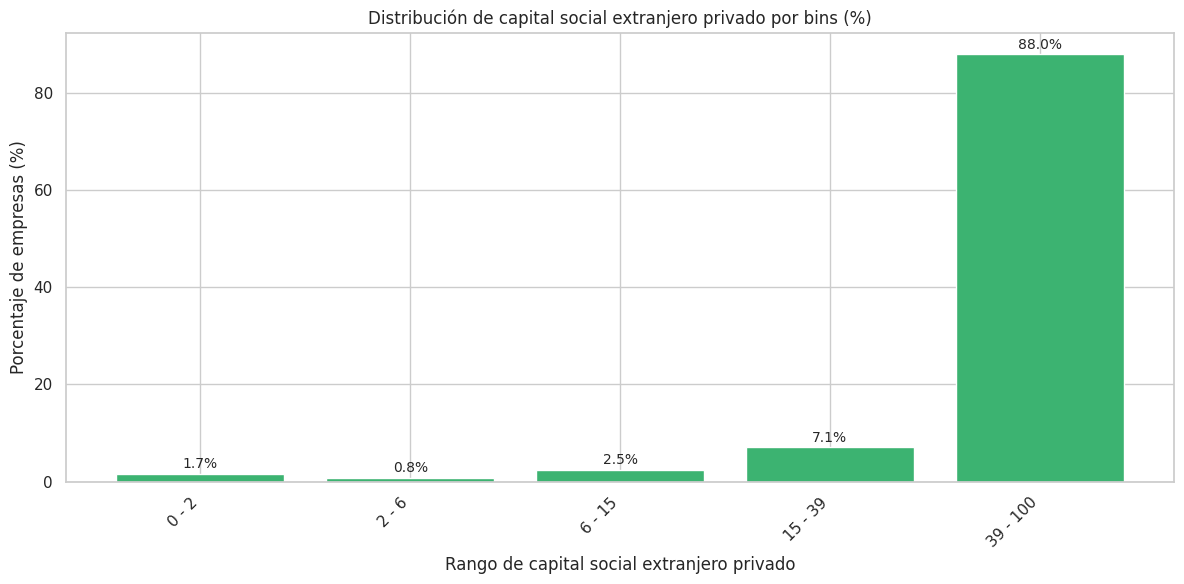

count   2775.000
mean      84.128
std       28.672
min        1.000
25%       82.000
50%      100.000
75%      100.000
max      100.000
Name: cap_social_ext_priv, dtype: float64


In [42]:
# -----------------------------
# Distribución de capital social extranjero privado
# -----------------------------

# Seleccionar la variable
cap_social_ext_priv = df_exportadoras['cap_social_ext_priv']

# Filtrar solo valores mayores a 0
cap_social_ext_priv_pos = cap_social_ext_priv[cap_social_ext_priv > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(cap_social_ext_priv_pos.min()),
                   np.log10(cap_social_ext_priv_pos.max()),
                   n_bins + 1)

# Crear los bins
cap_social_ext_priv_bins = pd.cut(cap_social_ext_priv_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
cap_social_ext_priv_counts = cap_social_ext_priv_bins.value_counts().sort_index()

# Excluir bins vacíos
cap_social_ext_priv_counts = cap_social_ext_priv_counts[cap_social_ext_priv_counts > 0]

# Calcular porcentaje
cap_social_ext_priv_percent = cap_social_ext_priv_counts / cap_social_ext_priv_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in cap_social_ext_priv_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, cap_social_ext_priv_percent.values, color='mediumseagreen')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, cap_social_ext_priv_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de capital social extranjero privado")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de capital social extranjero privado por bins (%)")
plt.tight_layout()
plt.show()
print(cap_social_ext_priv_pos.describe())

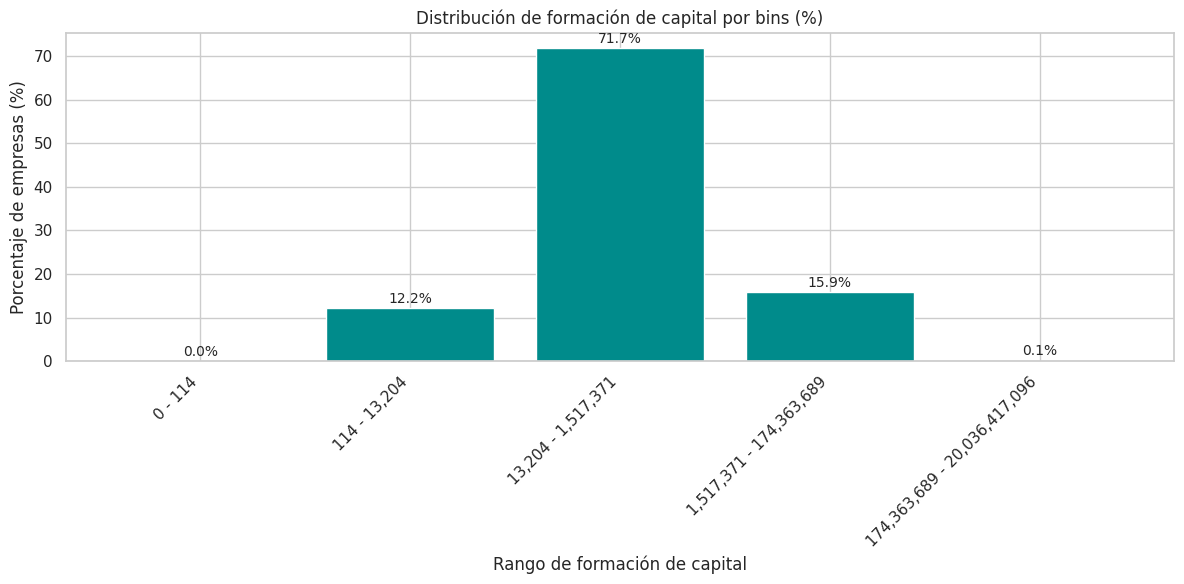

In [43]:
# -----------------------------
# Distribución de formación de capital
# -----------------------------

# Seleccionar la variable
formacion_capital = df_exportadoras['formacion_capital']

# Filtrar solo valores mayores a 0
formacion_capital_pos = formacion_capital[formacion_capital > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(formacion_capital_pos.min()),
                   np.log10(formacion_capital_pos.max()),
                   n_bins + 1)

# Crear los bins
formacion_capital_bins = pd.cut(formacion_capital_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
formacion_capital_counts = formacion_capital_bins.value_counts().sort_index()

# Excluir bins vacíos
formacion_capital_counts = formacion_capital_counts[formacion_capital_counts > 0]

# Calcular porcentaje
formacion_capital_percent = formacion_capital_counts / formacion_capital_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in formacion_capital_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, formacion_capital_percent.values, color='darkcyan')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, formacion_capital_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de formación de capital")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de formación de capital por bins (%)")
plt.tight_layout()
plt.show()


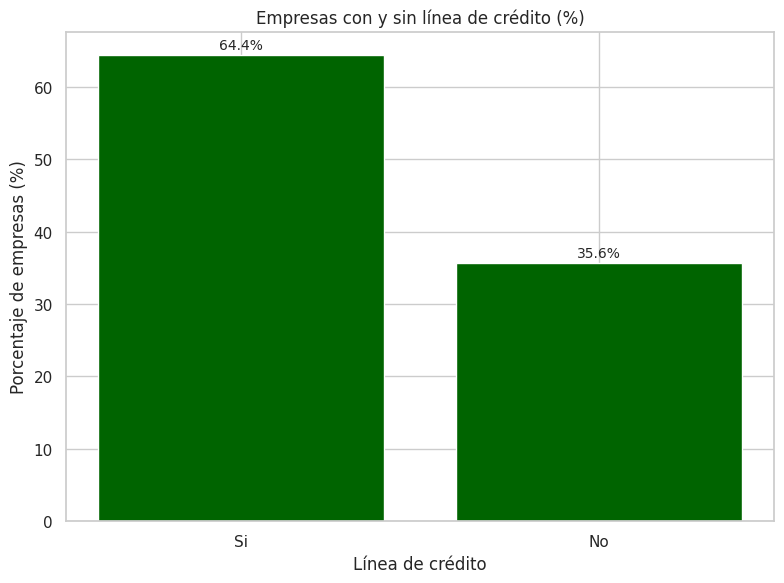

In [44]:
# -----------------------------
# Frecuencia de línea de crédito (ajustada)
# -----------------------------

# Contar frecuencia
linea_counts = df_exportadoras['linea_credito'].value_counts().sort_index()

# Excluir valores con conteo 0 (por seguridad)
linea_counts = linea_counts[linea_counts > 0]

# Calcular porcentaje
linea_percent = linea_counts / linea_counts.sum() * 100

# Gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(linea_percent.index.astype(str),
               linea_percent.values,
               color='darkgreen')

# Etiquetas sobre cada barra
for bar, pct in zip(bars, linea_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Línea de crédito")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Empresas con y sin línea de crédito (%)")
plt.tight_layout()
plt.show()


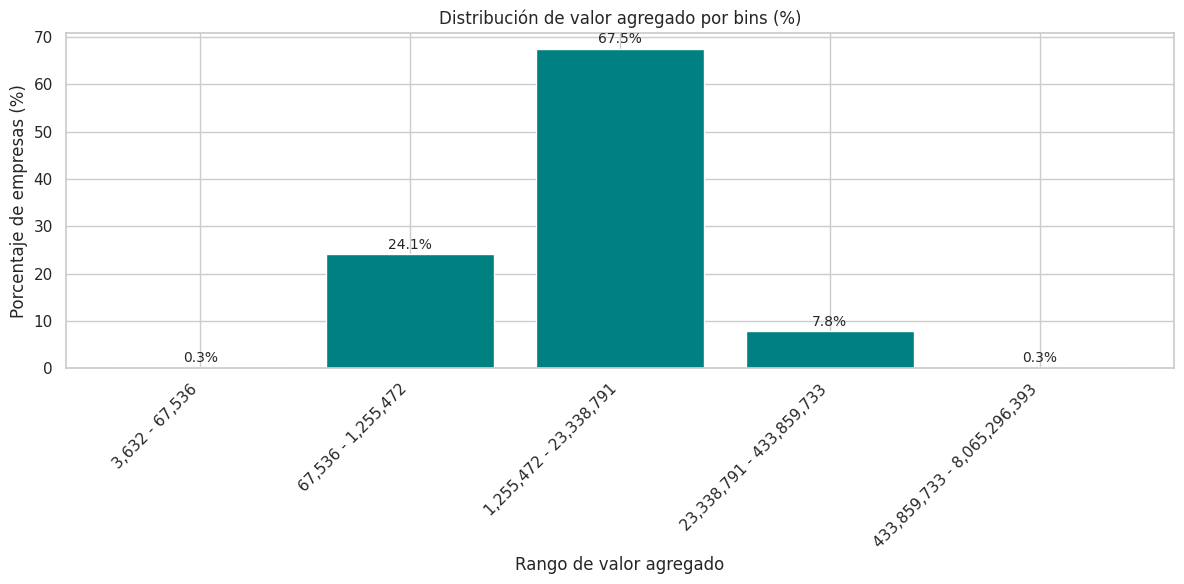

In [45]:
# -----------------------------
# Distribución de valor agregado
# -----------------------------

# Seleccionar la variable
valor_agregado = df_exportadoras['valor_agregado']

# Filtrar solo valores mayores a 0
valor_agregado_pos = valor_agregado[valor_agregado > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(valor_agregado_pos.min()),
                   np.log10(valor_agregado_pos.max()),
                   n_bins + 1)

# Crear los bins
valor_agregado_bins = pd.cut(valor_agregado_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
valor_agregado_counts = valor_agregado_bins.value_counts().sort_index()

# Excluir bins vacíos
valor_agregado_counts = valor_agregado_counts[valor_agregado_counts > 0]

# Calcular porcentaje
valor_agregado_percent = valor_agregado_counts / valor_agregado_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in valor_agregado_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, valor_agregado_percent.values, color='teal')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, valor_agregado_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de valor agregado")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de valor agregado por bins (%)")
plt.tight_layout()
plt.show()


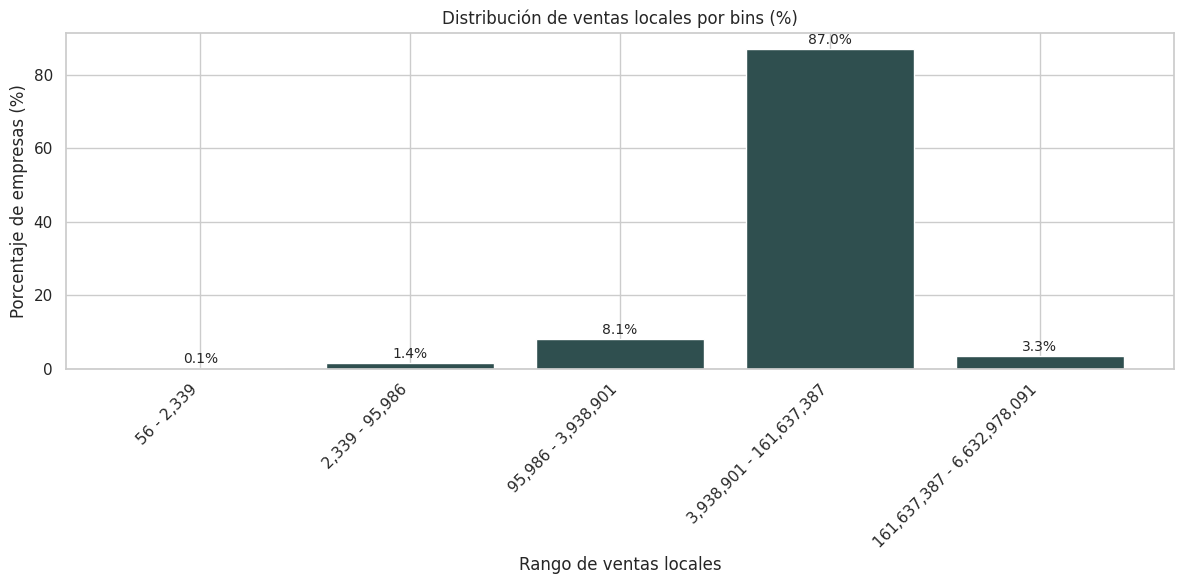

In [46]:
# -----------------------------
# Distribución de ventas locales
# -----------------------------

# Seleccionar la variable
ventas_locales = df_exportadoras['ventas_locales']

# Filtrar solo valores mayores a 0
ventas_locales_pos = ventas_locales[ventas_locales > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(ventas_locales_pos.min()),
                   np.log10(ventas_locales_pos.max()),
                   n_bins + 1)

# Crear los bins
ventas_locales_bins = pd.cut(ventas_locales_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
ventas_locales_counts = ventas_locales_bins.value_counts().sort_index()

# Excluir bins vacíos
ventas_locales_counts = ventas_locales_counts[ventas_locales_counts > 0]

# Calcular porcentaje
ventas_locales_percent = ventas_locales_counts / ventas_locales_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in ventas_locales_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, ventas_locales_percent.values, color='darkslategray')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, ventas_locales_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de ventas locales")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de ventas locales por bins (%)")
plt.tight_layout()
plt.show()


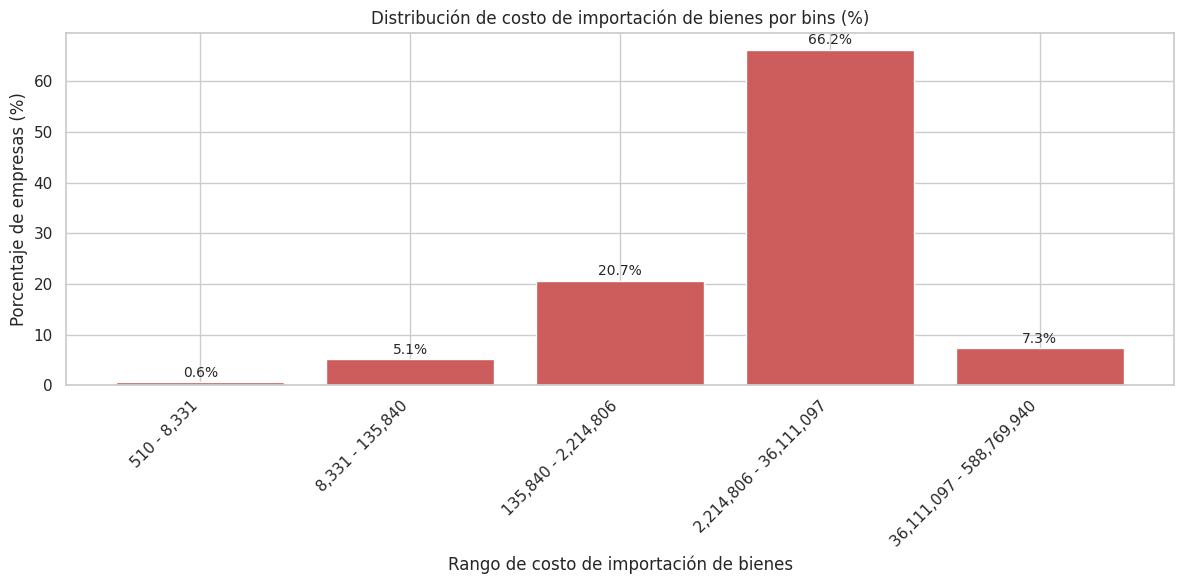

In [47]:
# -----------------------------
# Distribución de costo de importación de bienes
# -----------------------------

# Seleccionar la variable
costo_import_bienes = df_exportadoras['costo_import_bienes']

# Filtrar solo valores mayores a 0
costo_import_bienes_pos = costo_import_bienes[costo_import_bienes > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(costo_import_bienes_pos.min()),
                   np.log10(costo_import_bienes_pos.max()),
                   n_bins + 1)

# Crear los bins
costo_import_bienes_bins = pd.cut(costo_import_bienes_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
costo_import_bienes_counts = costo_import_bienes_bins.value_counts().sort_index()

# Excluir bins vacíos
costo_import_bienes_counts = costo_import_bienes_counts[costo_import_bienes_counts > 0]

# Calcular porcentaje
costo_import_bienes_percent = costo_import_bienes_counts / costo_import_bienes_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in costo_import_bienes_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, costo_import_bienes_percent.values, color='indianred')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, costo_import_bienes_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costo de importación de bienes")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de costo de importación de bienes por bins (%)")
plt.tight_layout()
plt.show()


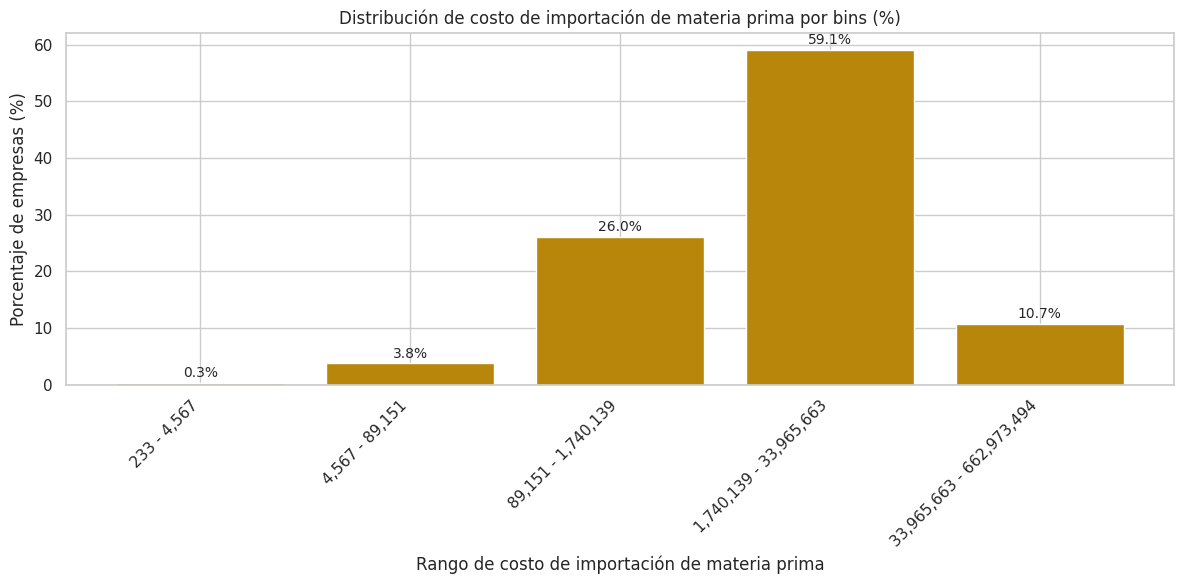

In [48]:
# -----------------------------
# Distribución de costo de importación de materia prima
# -----------------------------

# Seleccionar la variable
costo_import_mp = df_exportadoras['costo_import_mp']

# Filtrar solo valores mayores a 0
costo_import_mp_pos = costo_import_mp[costo_import_mp > 0]

# Número de bins
n_bins = 5

# Crear bins logarítmicos desde el mínimo real hasta el máximo
bins = np.logspace(np.log10(costo_import_mp_pos.min()),
                   np.log10(costo_import_mp_pos.max()),
                   n_bins + 1)

# Crear los bins
costo_import_mp_bins = pd.cut(costo_import_mp_pos, bins=bins, include_lowest=True)

# Contar observaciones por bin
costo_import_mp_counts = costo_import_mp_bins.value_counts().sort_index()

# Excluir bins vacíos
costo_import_mp_counts = costo_import_mp_counts[costo_import_mp_counts > 0]

# Calcular porcentaje
costo_import_mp_percent = costo_import_mp_counts / costo_import_mp_counts.sum() * 100

# Etiquetas para el eje x
labels = [f"{int(interval.left):,} - {int(interval.right):,}"
          for interval in costo_import_mp_counts.index]

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, costo_import_mp_percent.values, color='darkgoldenrod')

# Añadir etiquetas sobre cada barra
for bar, pct in zip(bars, costo_import_mp_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rango de costo de importación de materia prima")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de costo de importación de materia prima por bins (%)")
plt.tight_layout()
plt.show()


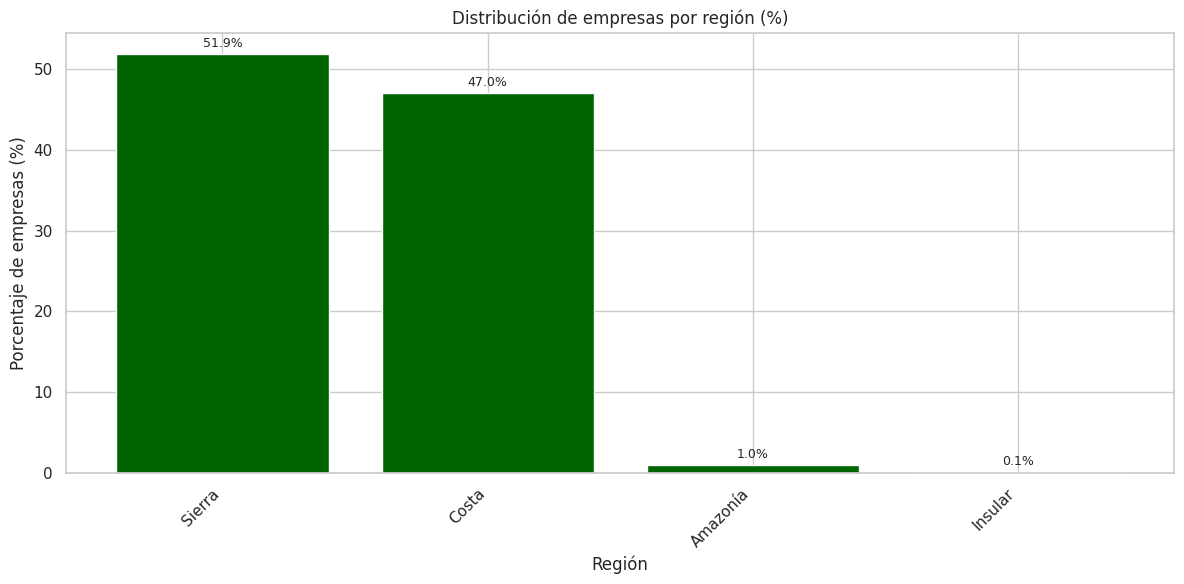

In [49]:
# -----------------------------
# Frecuencia de empresas por región (ajustada)
# -----------------------------

# Contar frecuencia
region_counts = df_exportadoras['region'].value_counts().sort_index()

# Excluir valores con conteo 0
region_counts = region_counts[region_counts > 0]

# Calcular porcentaje
region_percent = region_counts / region_counts.sum() * 100

# Gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(region_percent.index.astype(str),
               region_percent.values,
               color='darkgreen')

# Etiquetas sobre cada barra
for bar, pct in zip(bars, region_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Región")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de empresas por región (%)")
plt.tight_layout()
plt.show()


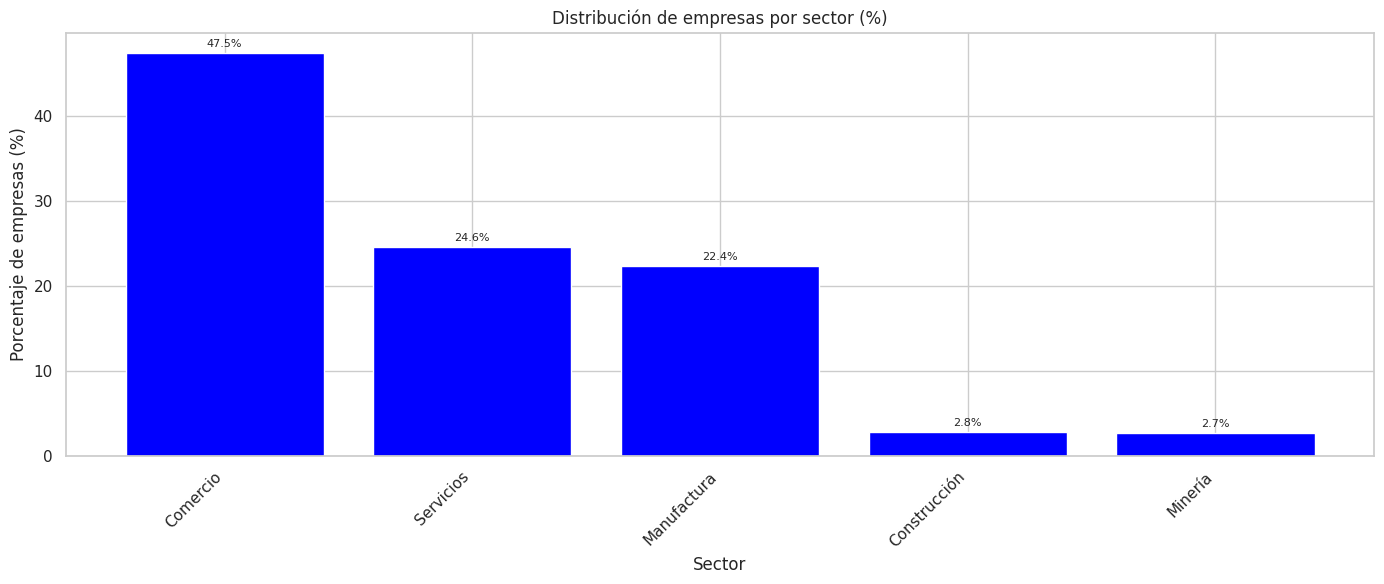

In [50]:
# -----------------------------
# Frecuencia de empresas por sector (ajustada)
# -----------------------------

# Contar frecuencia
sector_counts = df_exportadoras['desc_sector'].value_counts()

# Excluir valores con conteo 0
sector_counts = sector_counts[sector_counts > 0]

# Calcular porcentaje
sector_percent = sector_counts / sector_counts.sum() * 100

# Gráfico de barras
plt.figure(figsize=(14, 6))
bars = plt.bar(sector_percent.index.astype(str),
               sector_percent.values,
               color='blue')

# Etiquetas sobre cada barra
for bar, pct in zip(bars, sector_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.5,
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Sector")
plt.ylabel("Porcentaje de empresas (%)")
plt.title("Distribución de empresas por sector (%)")
plt.tight_layout()
plt.show()


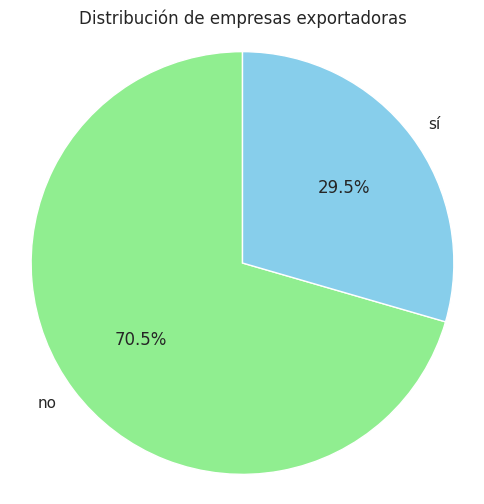

In [51]:
# Es exportadora
# Seleccionar la variable
exportadora = df_exportadoras['es_exportadora']

# Contar valores
export_counts = exportadora.value_counts()

# Asegurarse de que siempre haya 0 y 1
labels = ['no', 'sí']
sizes = [export_counts.get(0, 0), export_counts.get(1, 0)]

# Convertir a porcentaje
total = sum(sizes)
sizes_percent = [(s/total)*100 for s in sizes]

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(sizes_percent, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen','skyblue'])
plt.title("Distribución de empresas exportadoras")
plt.axis('equal')  # Para que quede circular
plt.show()


## **Diagramas de dispersión e histogramas**

Tamaño original: 11570
Tamaño limpio: 9147


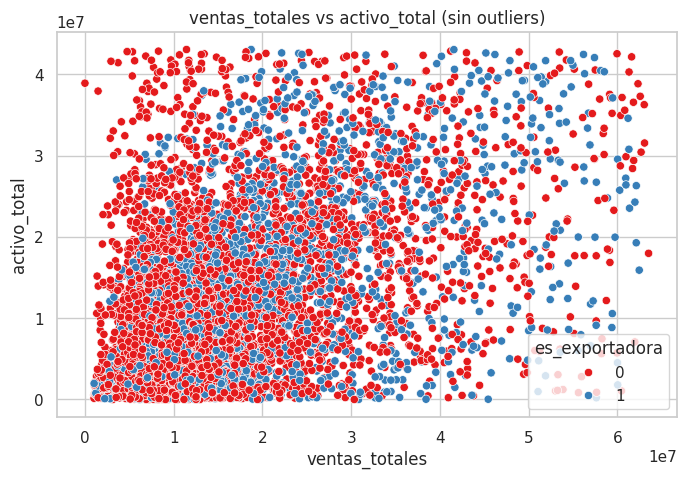

In [52]:
# Ventas totales vs activo total
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['ventas_totales', 'activo_total', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'ventas_totales')
df_clean = remove_outliers_iqr(df_clean, 'activo_total')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='ventas_totales',
    y='activo_total',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('ventas_totales vs activo_total (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('activo_total')
plt.show()


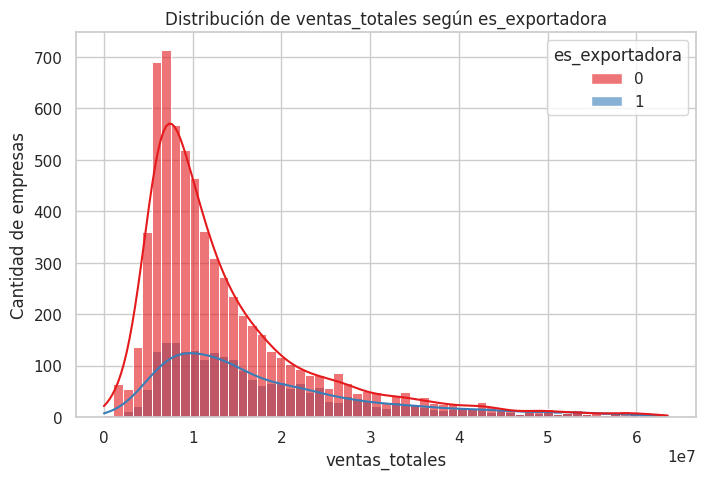

In [53]:
# Histograma de ventas_totales según es_exportadora
plt.figure(figsize=(8,5))

sns.histplot(
    data=df_clean,
    x='ventas_totales',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6
)

plt.title('Distribución de ventas_totales según es_exportadora')
plt.xlabel('ventas_totales')
plt.ylabel('Cantidad de empresas')
plt.show()


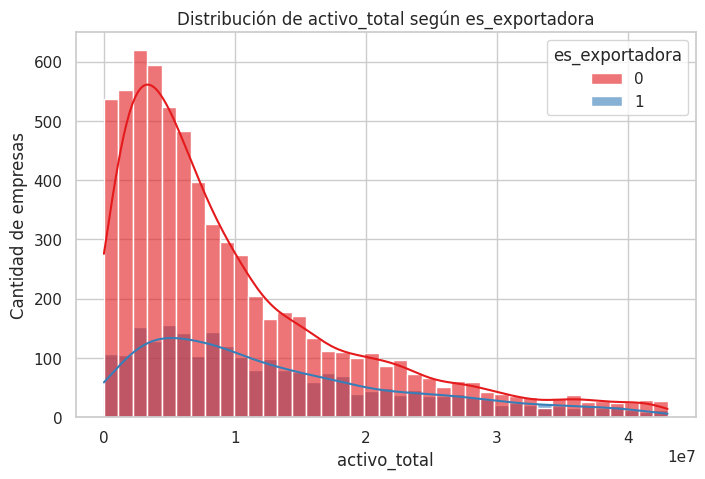

In [54]:
# Histograma de activo_total según es_exportadora
plt.figure(figsize=(8,5))

sns.histplot(
    data=df_clean,
    x='activo_total',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6
)

plt.title('Distribución de activo_total según es_exportadora')
plt.xlabel('activo_total')
plt.ylabel('Cantidad de empresas')
plt.show()


Tamaño original: 11570
Tamaño limpio: 9591


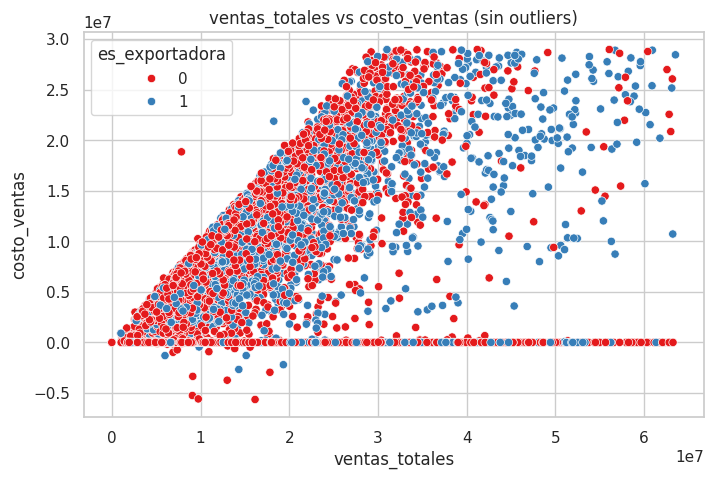

In [55]:
# Ventas totales vs costo_ventas
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['ventas_totales', 'costo_ventas', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'ventas_totales')
df_clean = remove_outliers_iqr(df_clean, 'costo_ventas')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='ventas_totales',
    y='costo_ventas',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('ventas_totales vs costo_ventas (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('costo_ventas')
plt.show()


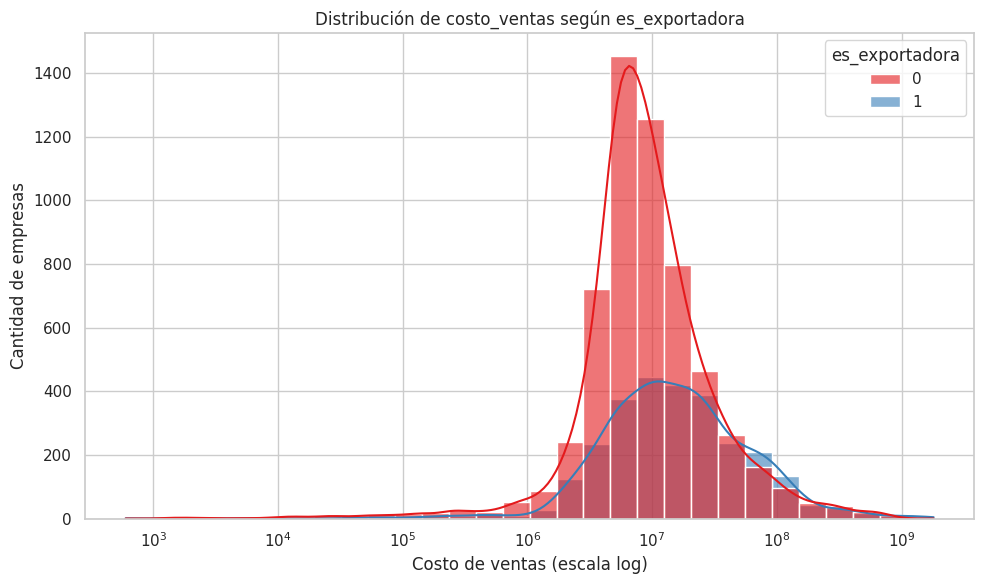

In [56]:
# -----------------------------
# Histograma de costo_ventas según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['costo_ventas'] > 0]

sns.histplot(
    data=df_pos,
    x='costo_ventas',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de costo_ventas según es_exportadora')
plt.xlabel('Costo de ventas (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


Tamaño original: 11570
Tamaño limpio: 9544


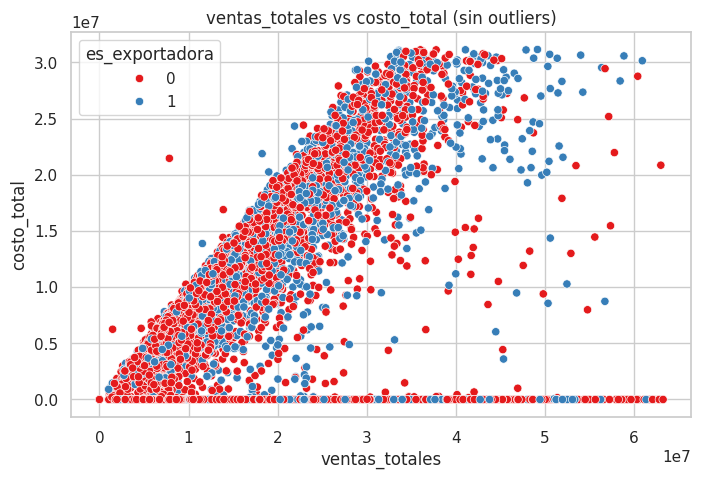

In [57]:
# Ventas totales vs costo_total
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['ventas_totales', 'costo_total', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'ventas_totales')
df_clean = remove_outliers_iqr(df_clean, 'costo_total')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='ventas_totales',
    y='costo_total',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('ventas_totales vs costo_total (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('costo_total')
plt.show()


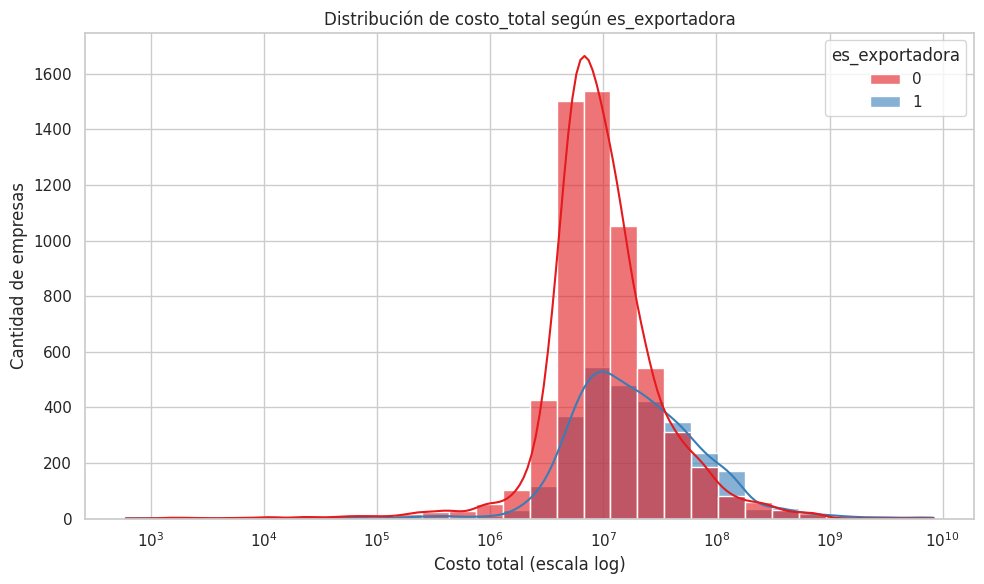

In [58]:
# -----------------------------
# Histograma de costo_total según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['costo_total'] > 0]

sns.histplot(
    data=df_pos,
    x='costo_total',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de costo_total según es_exportadora')
plt.xlabel('Costo total (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


Tamaño original: 11570
Tamaño limpio: 9277


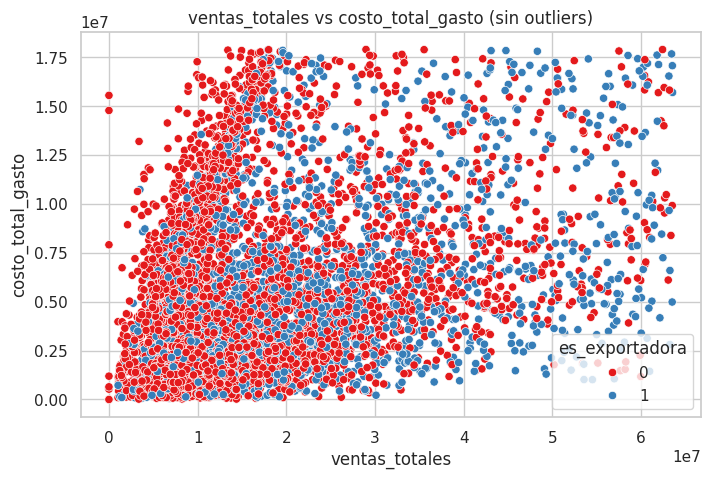

In [59]:
# Ventas totales vs costo_total_gasto
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['ventas_totales', 'costo_total_gasto', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'ventas_totales')
df_clean = remove_outliers_iqr(df_clean, 'costo_total_gasto')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='ventas_totales',
    y='costo_total_gasto',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('ventas_totales vs costo_total_gasto (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('costo_total_gasto')
plt.show()


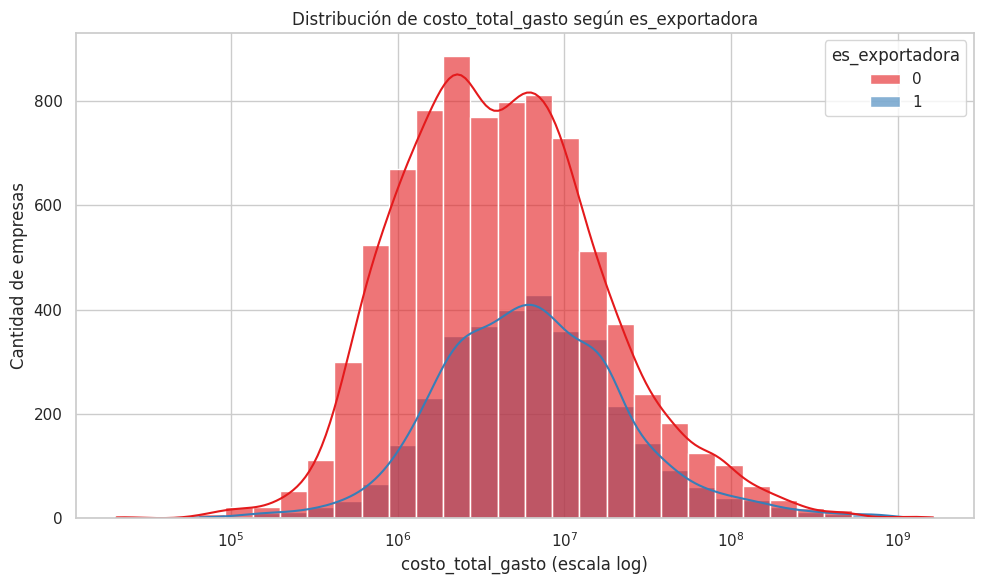

In [60]:
# -----------------------------
# Histograma de costo_total_gasto según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['costo_total_gasto'] > 0]

sns.histplot(
    data=df_pos,
    x='costo_total_gasto',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de costo_total_gasto según es_exportadora')
plt.xlabel('costo_total_gasto (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


Tamaño original: 11570
Tamaño limpio: 9220


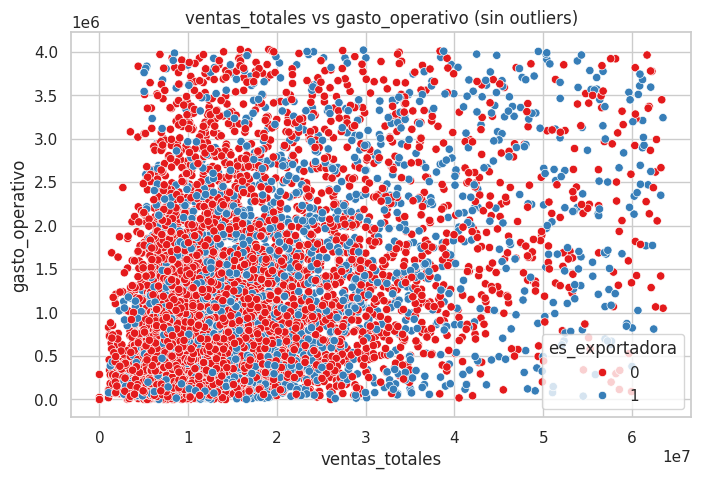

In [61]:
# Ventas totales vs gasto_operativo
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['ventas_totales', 'gasto_operativo', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'ventas_totales')
df_clean = remove_outliers_iqr(df_clean, 'gasto_operativo')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='ventas_totales',
    y='gasto_operativo',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('ventas_totales vs gasto_operativo (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('gasto_operativo')
plt.show()


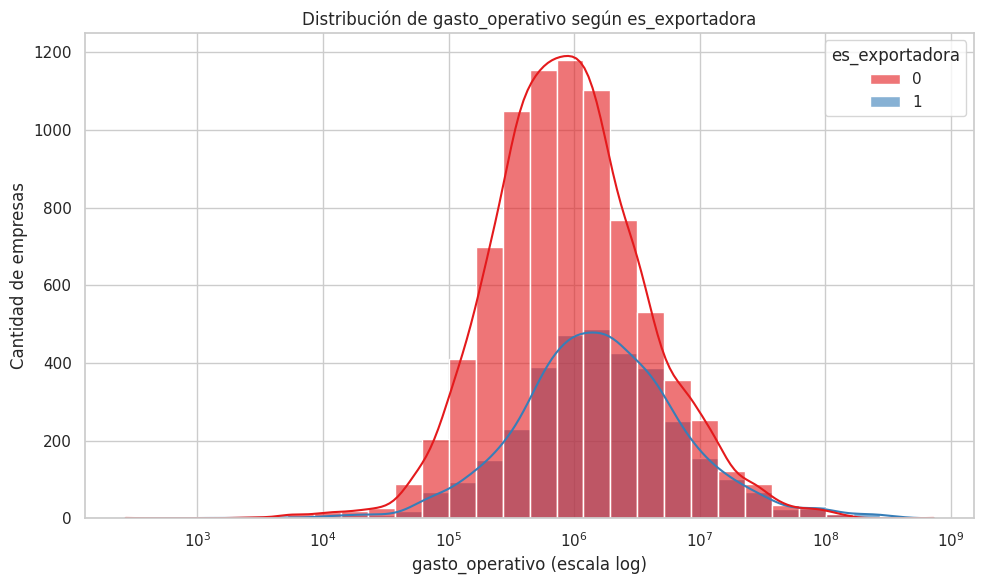

In [62]:
# -----------------------------
# Histograma de gasto_operativo según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['gasto_operativo'] > 0]

sns.histplot(
    data=df_pos,
    x='gasto_operativo',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de gasto_operativo según es_exportadora')
plt.xlabel('gasto_operativo (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


Tamaño original: 11570
Tamaño limpio: 9003


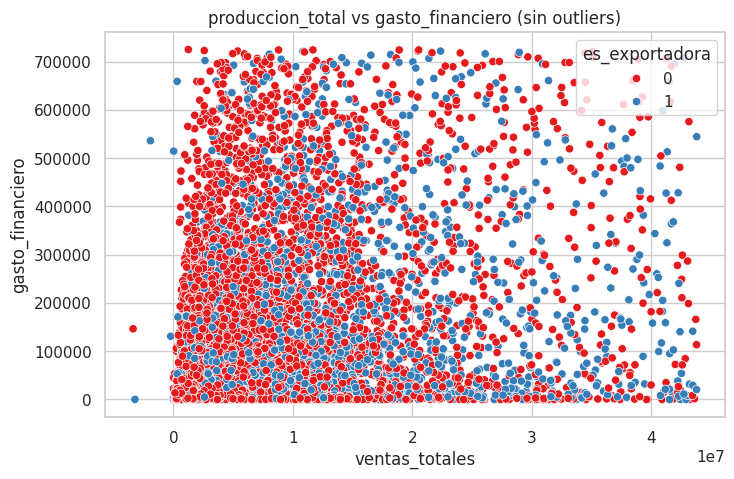

In [63]:
# produccion_total vs gasto_operativo
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['produccion_total', 'gasto_financiero', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'produccion_total')
df_clean = remove_outliers_iqr(df_clean, 'gasto_financiero')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='produccion_total',
    y='gasto_financiero',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('produccion_total vs gasto_financiero (sin outliers)')
plt.xlabel('ventas_totales')
plt.ylabel('gasto_financiero')
plt.show()


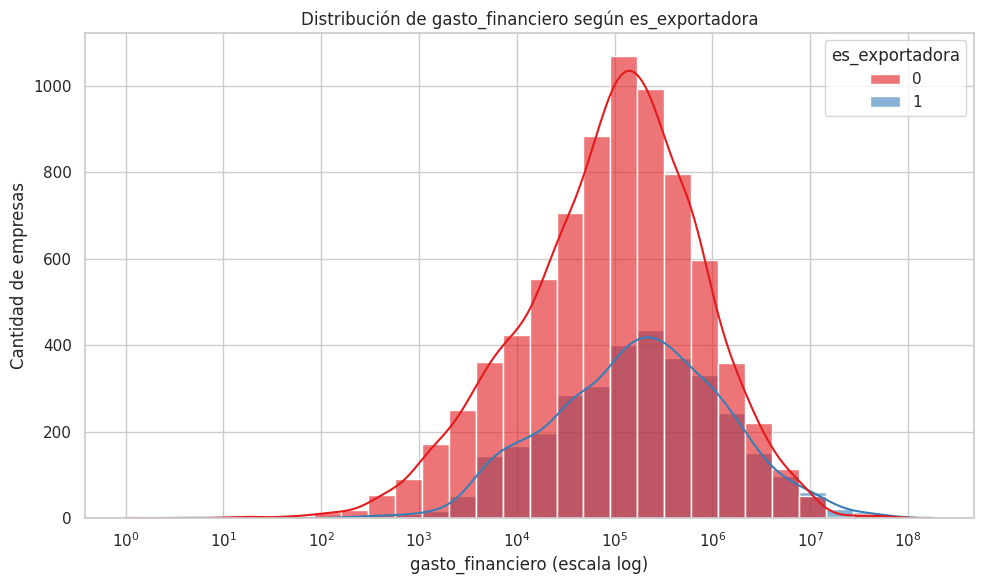

In [64]:
# -----------------------------
# Histograma de gasto_operativo según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['gasto_financiero'] > 0]

sns.histplot(
    data=df_pos,
    x='gasto_financiero',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de gasto_financiero según es_exportadora')
plt.xlabel('gasto_financiero (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


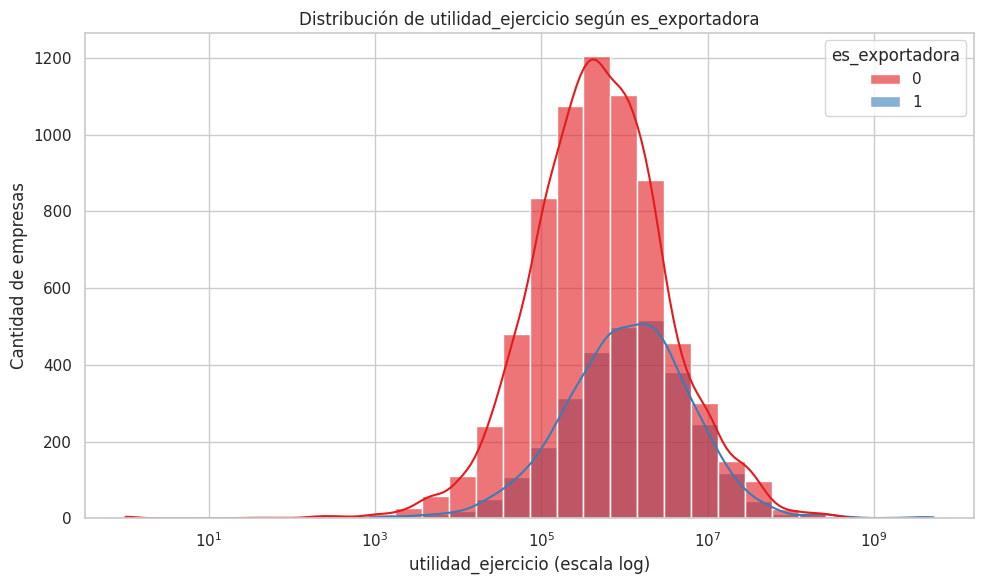

In [65]:
# -----------------------------
# Histograma de gasto_operativo según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['utilidad_ejercicio'] > 0]

sns.histplot(
    data=df_pos,
    x='utilidad_ejercicio',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de utilidad_ejercicio según es_exportadora')
plt.xlabel('utilidad_ejercicio (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


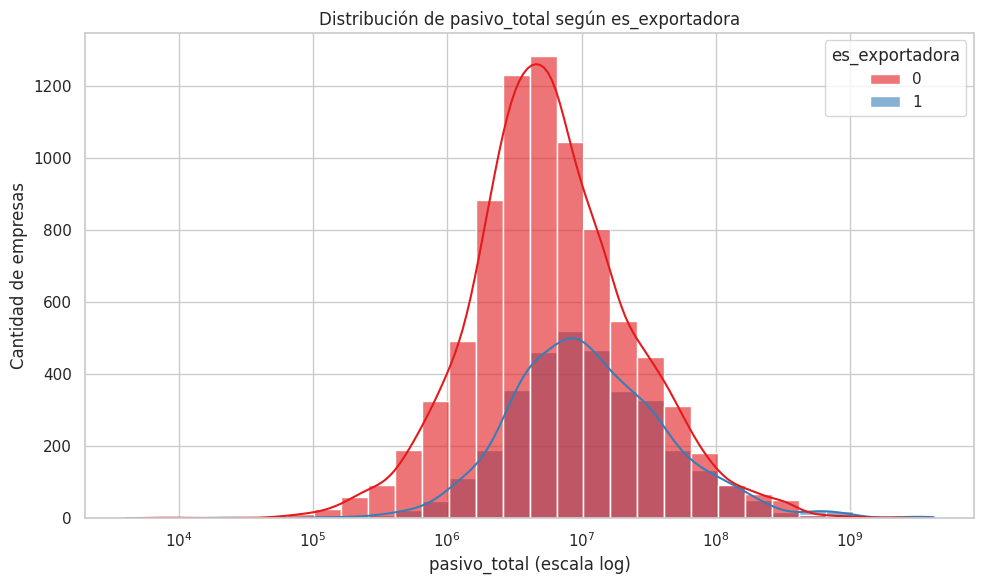

In [66]:
# -----------------------------
# Histograma de gasto_operativo según es_exportadora
# -----------------------------
plt.figure(figsize=(10,6))

# Filtrar solo valores mayores a 0 para evitar problemas con log-scale
df_pos = df_exportadoras[df_exportadoras['pasivo_total'] > 0]

sns.histplot(
    data=df_pos,
    x='pasivo_total',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True,   # Escala logarítmica en el eje x
    bins=30           # Puedes ajustar el número de bins según convenga
)

plt.title('Distribución de pasivo_total según es_exportadora')
plt.xlabel('pasivo_total (escala log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


Tamaño original: 11570
Tamaño limpio: 9159


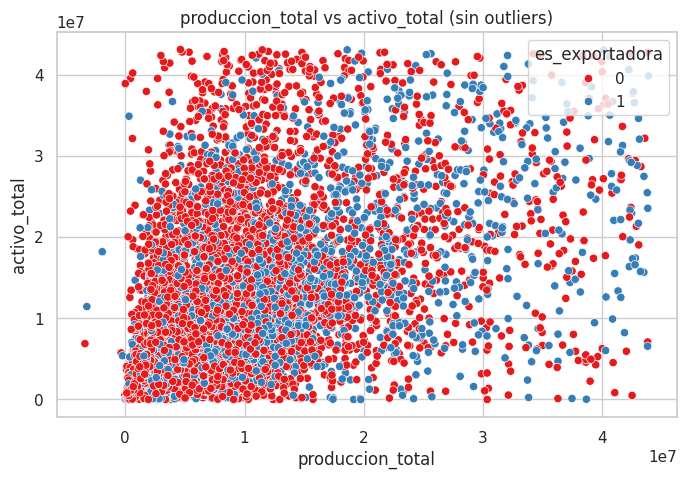

In [67]:

# Producción total vs activo total
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['produccion_total', 'activo_total', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'produccion_total')
df_clean = remove_outliers_iqr(df_clean, 'activo_total')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='produccion_total',
    y='activo_total',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('produccion_total vs activo_total (sin outliers)')
plt.xlabel('produccion_total')
plt.ylabel('activo_total')
plt.show()


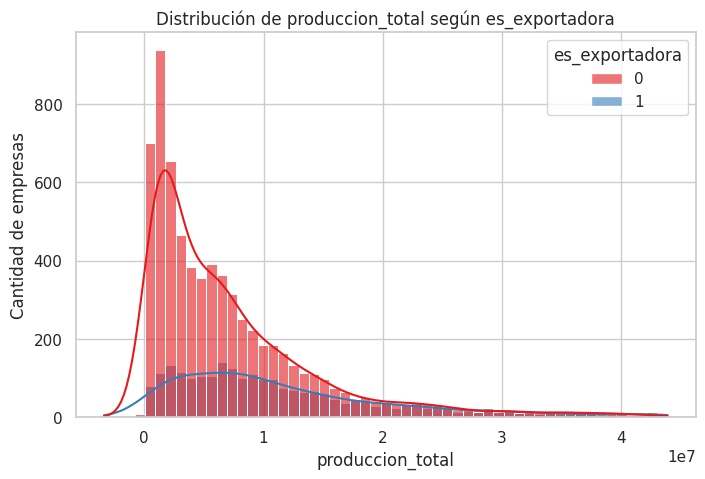

In [68]:
# Histograma de produccion_total según es_exportadora
plt.figure(figsize=(8,5))

sns.histplot(
    data=df_clean,
    x='produccion_total',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6
)

plt.title('Distribución de produccion_total según es_exportadora')
plt.xlabel('produccion_total')
plt.ylabel('Cantidad de empresas')
plt.show()


Tamaño original: 11570
Tamaño limpio: 9039


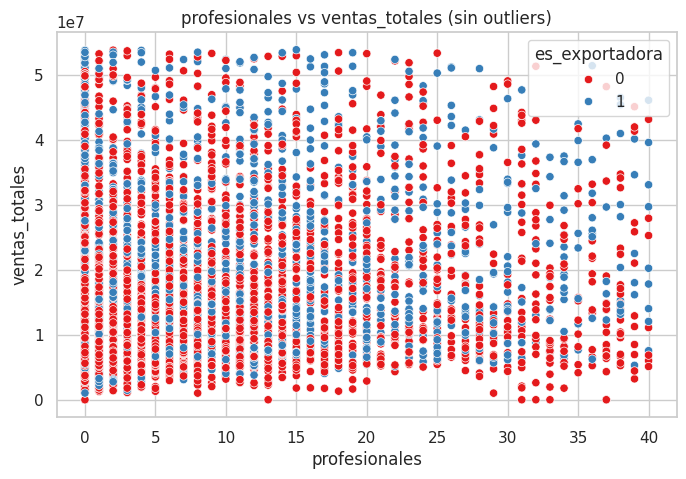

In [69]:
# No. de profesionales vs ventas totales
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['profesionales', 'ventas_totales', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'profesionales')
df_clean = remove_outliers_iqr(df_clean, 'ventas_totales')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='profesionales',
    y='ventas_totales',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('profesionales vs ventas_totales (sin outliers)')
plt.xlabel('profesionales')
plt.ylabel('ventas_totales')
plt.show()


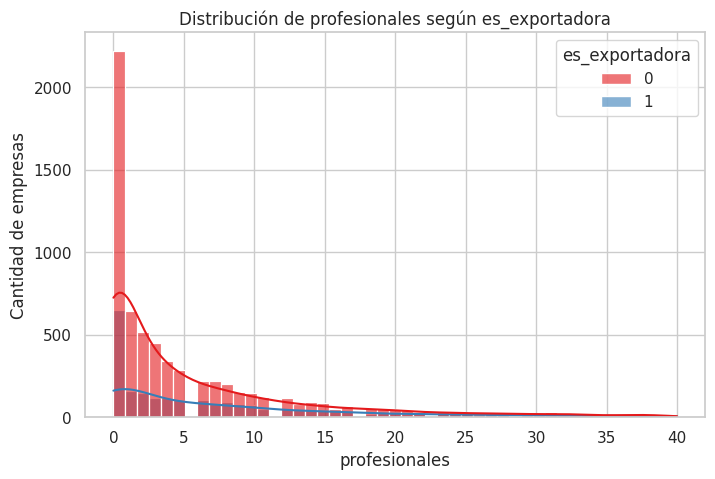

In [70]:
# Histograma de profesionales según es_exportadora
plt.figure(figsize=(8,5))

sns.histplot(
    data=df_clean,
    x='profesionales',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6
)

plt.title('Distribución de profesionales según es_exportadora')
plt.xlabel('profesionales')
plt.ylabel('Cantidad de empresas')
plt.show()


Tamaño original: 11570
Tamaño limpio: 7024


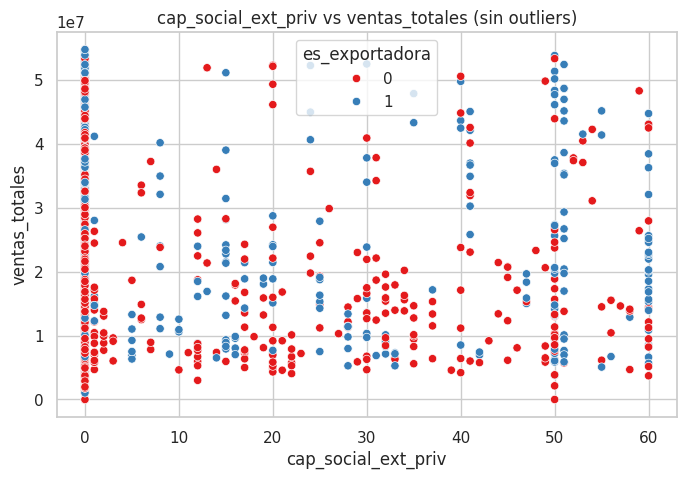

In [71]:
# Capital social externo privado vs ventas totales
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['cap_social_ext_priv', 'ventas_totales', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'cap_social_ext_priv')
df_clean = remove_outliers_iqr(df_clean, 'ventas_totales')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='cap_social_ext_priv',
    y='ventas_totales',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('cap_social_ext_priv vs ventas_totales (sin outliers)')
plt.xlabel('cap_social_ext_priv')
plt.ylabel('ventas_totales')
plt.show()


Tamaño original: 11570
Tamaño limpio: 7014


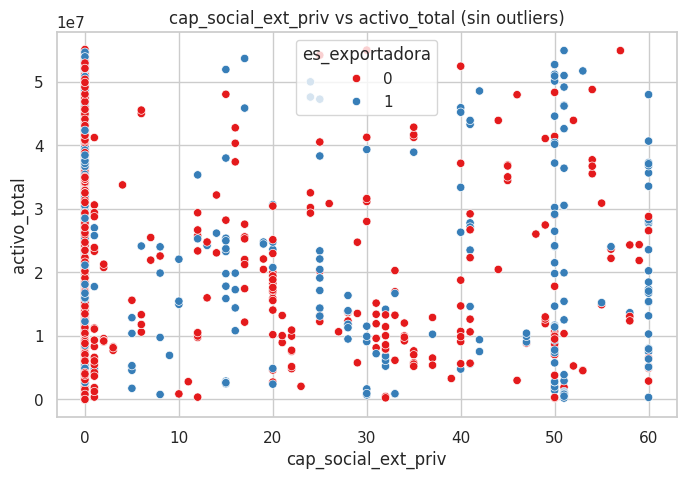

In [72]:
# Capital social externo privado vs activo_total
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['cap_social_ext_priv', 'activo_total', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'cap_social_ext_priv')
df_clean = remove_outliers_iqr(df_clean, 'activo_total')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='cap_social_ext_priv',
    y='activo_total',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('cap_social_ext_priv vs activo_total (sin outliers)')
plt.xlabel('cap_social_ext_priv')
plt.ylabel('activo_total')
plt.show()


Tamaño original: 11570
Tamaño limpio: 8605


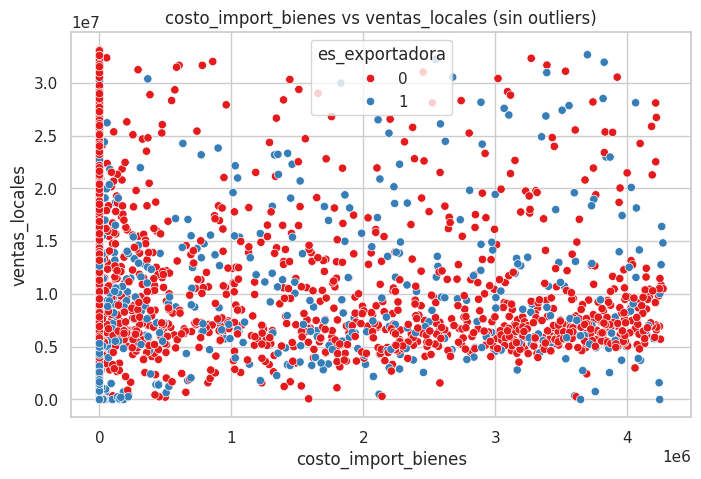

In [73]:
# Costo de importación de bienes vs ventas locales
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['costo_import_bienes', 'ventas_locales', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'costo_import_bienes')
df_clean = remove_outliers_iqr(df_clean, 'ventas_locales')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='costo_import_bienes',
    y='ventas_locales',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('costo_import_bienes vs ventas_locales (sin outliers)')
plt.xlabel('costo_import_bienes')
plt.ylabel('ventas_locales')
plt.show()


Tamaño original: 11570
Tamaño limpio: 8259


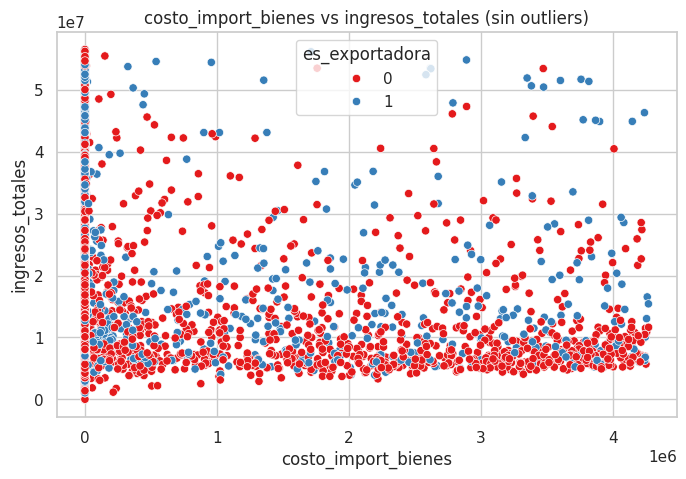

In [74]:
# Costo de importación de bienes vs ventas locales
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['costo_import_bienes', 'ingresos_totales', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'costo_import_bienes')
df_clean = remove_outliers_iqr(df_clean, 'ingresos_totales')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='costo_import_bienes',
    y='ingresos_totales',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('costo_import_bienes vs ingresos_totales (sin outliers)')
plt.xlabel('costo_import_bienes')
plt.ylabel('ingresos_totales')
plt.show()


Tamaño original: 11570
Tamaño limpio: 8549


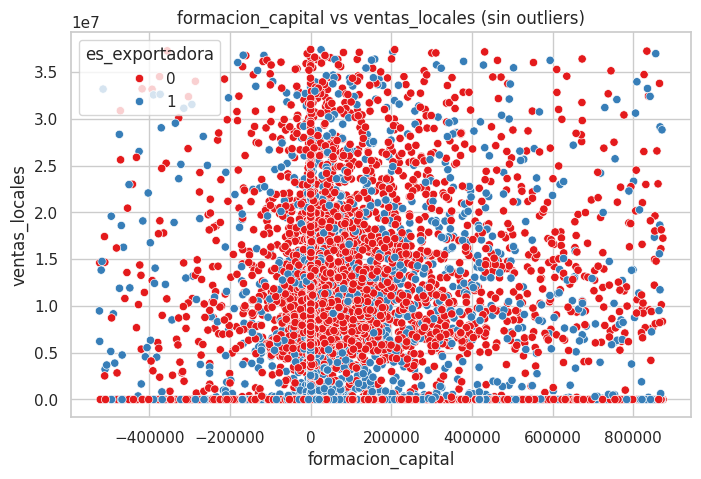

In [75]:
# Formación de capital vs ventas locales
# ================================================
# 1) Copiar variables necesarias
# ================================================
df_plot = df_exportadoras[['formacion_capital', 'ventas_locales', 'es_exportadora']].copy()

# Convertir booleanos a enteros (si es necesario)
df_plot['es_exportadora'] = df_plot['es_exportadora'].astype(int)

# ================================================
# 2) Limpieza de outliers mediante IQR
# ================================================
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Aplicar eliminación de outliers a ambas variables
df_clean = remove_outliers_iqr(df_plot, 'formacion_capital')
df_clean = remove_outliers_iqr(df_clean, 'ventas_locales')

print("Tamaño original:", len(df_plot))
print("Tamaño limpio:", len(df_clean))

# ================================================
# 3) Scatter plot sin outliers
# ================================================
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x='formacion_capital',
    y='ventas_locales',
    hue='es_exportadora',
    palette='Set1'
)
plt.title('formacion_capital vs ventas_locales (sin outliers)')
plt.xlabel('formacion_capital')
plt.ylabel('ventas_locales')
plt.show()


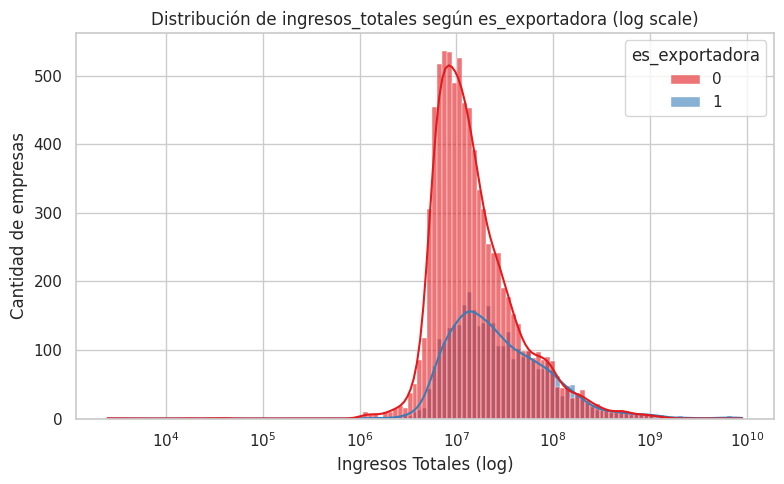

In [76]:
# -----------------------------
# Histograma de ingresos totales según es_exportadora (escala logarítmica)
# -----------------------------
plt.figure(figsize=(8,5))

# Filtrar solo valores positivos
df_pos = df_exportadoras[df_exportadoras['ingresos_totales'] > 0]

sns.histplot(
    data=df_pos,
    x='ingresos_totales',
    hue='es_exportadora',
    kde=True,
    palette='Set1',
    alpha=0.6,
    log_scale=True  # Escala logarítmica en el eje x
)

plt.title('Distribución de ingresos_totales según es_exportadora (log scale)')
plt.xlabel('Ingresos Totales (log)')
plt.ylabel('Cantidad de empresas')
plt.tight_layout()
plt.show()


## **Promedios por categoría (groupby)**

   es_exportadora  activo_total
0               0  36374702.220
1               1 123886316.857


/tmp/ipython-input-4255219307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=promedios, x='es_exportadora', y='activo_total', palette='Set2')


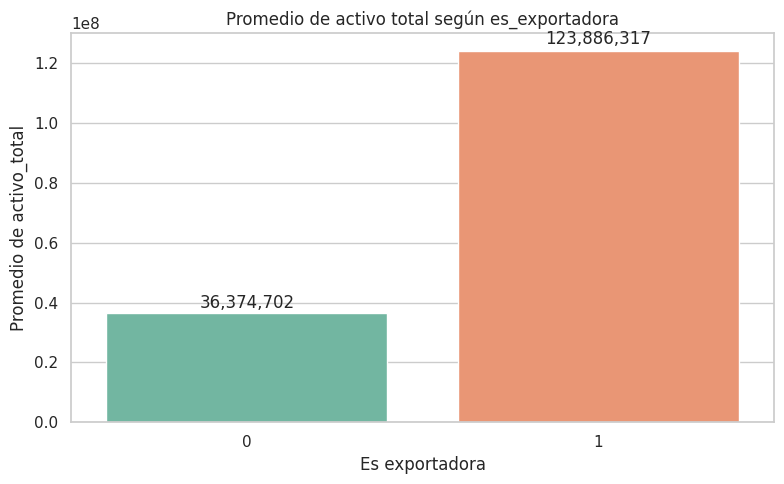

In [77]:
# -----------------------------
# Es exportadora vs promedio de activo total (con etiquetas)
# -----------------------------
promedios = df_exportadoras.groupby('es_exportadora')['activo_total'].mean().reset_index()

# Mostrar resultados
print(promedios)

plt.figure(figsize=(8,5))
bars = sns.barplot(data=promedios, x='es_exportadora', y='activo_total', palette='Set2')

# Añadir etiquetas de valor sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal en el centro de la barra
        height + 0.01*height,             # posición vertical ligeramente por encima de la barra
        f"{height:,.0f}",                 # mostrar valor con separador de miles y sin decimales
        ha='center', va='bottom'
    )

plt.title('Promedio de activo total según es_exportadora')
plt.xlabel('Es exportadora')
plt.ylabel('Promedio de activo_total')
plt.tight_layout()
plt.show()


   es_exportadora  ingresos_totales
0               0      31974946.988
1               1      80164229.551


/tmp/ipython-input-357179616.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=promedios, x='es_exportadora', y='ingresos_totales', palette='Set2')


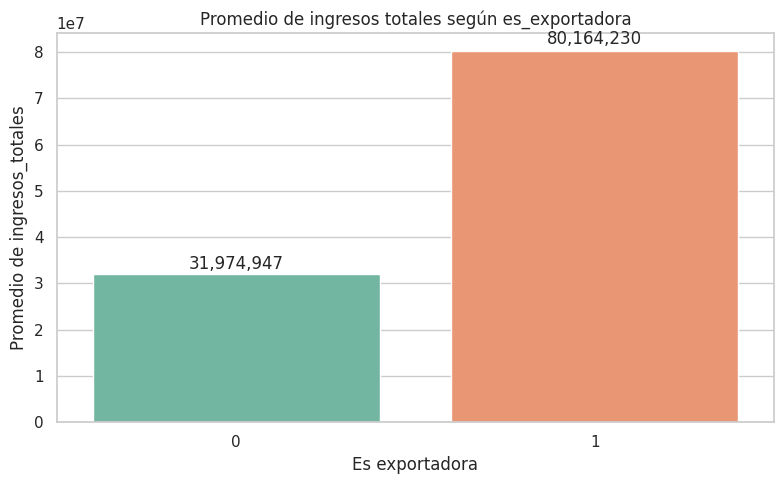

In [78]:
# -----------------------------
# Es exportadora vs promedio de ingresos totales (con etiquetas)
# -----------------------------
promedios = df_exportadoras.groupby('es_exportadora')['ingresos_totales'].mean().reset_index()

# Mostrar resultados
print(promedios)

plt.figure(figsize=(8,5))
bars = sns.barplot(data=promedios, x='es_exportadora', y='ingresos_totales', palette='Set2')

# Añadir etiquetas de valor sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal en el centro de la barra
        height + 0.01*height,             # posición vertical ligeramente por encima de la barra
        f"{height:,.0f}",                 # mostrar valor con separador de miles y sin decimales
        ha='center', va='bottom'
    )

plt.title('Promedio de ingresos totales según es_exportadora')
plt.xlabel('Es exportadora')
plt.ylabel('Promedio de ingresos_totales')
plt.tight_layout()
plt.show()


   es_exportadora  profesionales
0               0         24.937
1               1         25.315


/tmp/ipython-input-204055276.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=promedios, x='es_exportadora', y='profesionales', palette='Set2')


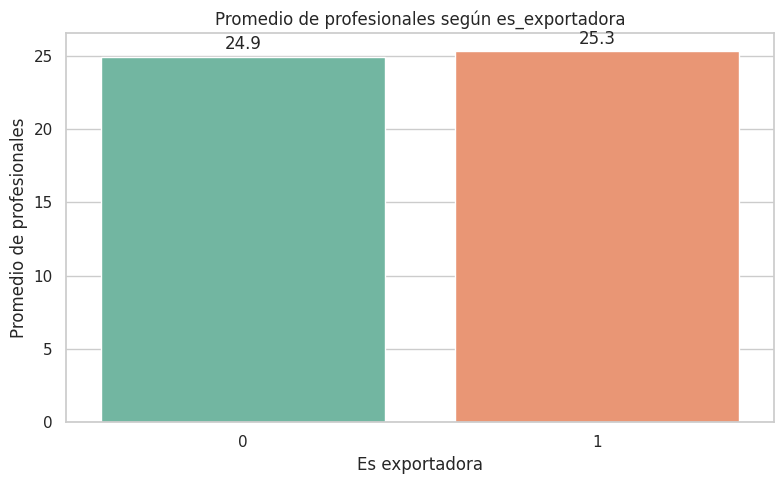

In [79]:
# -----------------------------
# Es exportadora vs promedio de profesionales (con etiquetas)
# -----------------------------
promedios = df_exportadoras.groupby('es_exportadora')['profesionales'].mean().reset_index()

# Mostrar resultados
print(promedios)

plt.figure(figsize=(8,5))
bars = sns.barplot(data=promedios, x='es_exportadora', y='profesionales', palette='Set2')

# Añadir etiquetas de valor sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal en el centro de la barra
        height + 0.01*height,             # posición vertical ligeramente por encima de la barra
        f"{height:.1f}",                  # mostrar valor con un decimal
        ha='center', va='bottom'
    )

plt.title('Promedio de profesionales según es_exportadora')
plt.xlabel('Es exportadora')
plt.ylabel('Promedio de profesionales')
plt.tight_layout()
plt.show()


      tamano_empresa  export_netas
0     Grande Empresa   8354192.573
1  Mediana Empresa A     58721.203
2  Mediana Empresa B    180689.860


/tmp/ipython-input-3246637831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df_exportadoras.groupby('tamano_empresa')['export_netas'].mean().reset_index()
/tmp/ipython-input-3246637831.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios, x='tamano_empresa', y='export_netas', palette='Set2')


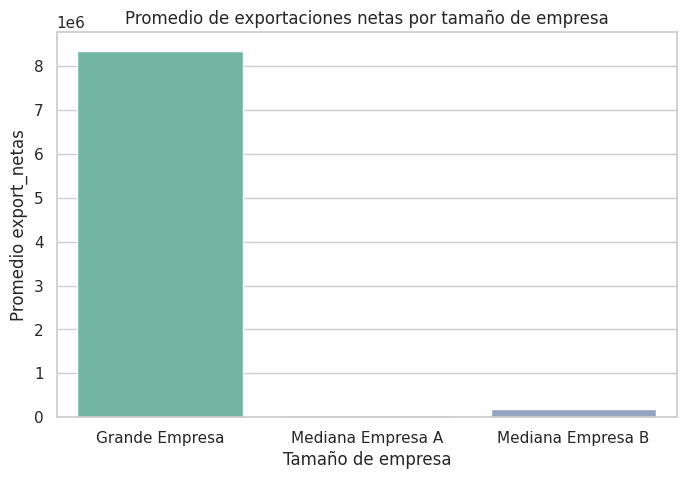

In [80]:
# Tamaño de empresa vs promedio de exportaciones netas
promedios = df_exportadoras.groupby('tamano_empresa')['export_netas'].mean().reset_index()

# Mostrar resultados
print(promedios)
plt.figure(figsize=(8,5))
sns.barplot(data=promedios, x='tamano_empresa', y='export_netas', palette='Set2')
plt.title('Promedio de exportaciones netas por tamaño de empresa')
plt.xlabel('Tamaño de empresa')
plt.ylabel('Promedio export_netas')
plt.show()


/tmp/ipython-input-3607781249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=promedios, x='desc_sector', y='export_netas', palette='Set2')


    desc_sector  export_netas
0      Comercio   2912464.011
1  Construcción     38116.052
2   Manufactura  12992559.513
3       Minería 126973327.419
4     Servicios   1128648.220


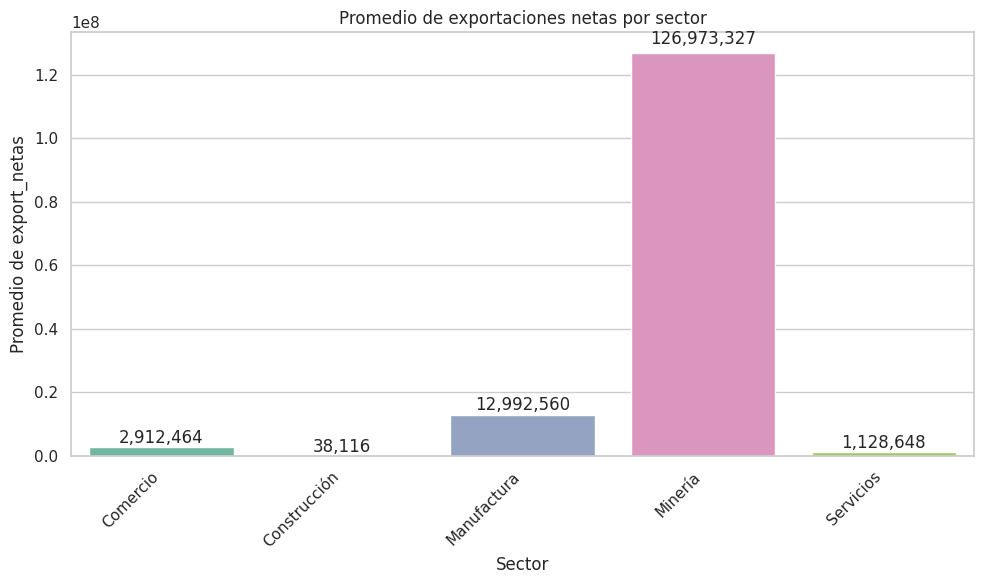

In [81]:
# -----------------------------
# Sector vs promedio de exportaciones netas (con etiquetas)
# -----------------------------
promedios = df_exportadoras.groupby('desc_sector')['export_netas'].mean().reset_index()

# Mostrar resultados
print(promedios)

plt.figure(figsize=(10,6))
bars = sns.barplot(data=promedios, x='desc_sector', y='export_netas', palette='Set2')

# Añadir etiquetas de valor sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal en el centro de la barra
        height + 0.01*height,             # posición vertical ligeramente por encima de la barra
        f"{height:,.0f}",                 # mostrar valor con separador de miles y sin decimales
        ha='center', va='bottom'
    )

plt.title('Promedio de exportaciones netas por sector')
plt.xlabel('Sector')
plt.ylabel('Promedio de export_netas')
plt.xticks(rotation=45, ha='right')  # rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()


/tmp/ipython-input-789059753.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df_exportadoras.groupby('region')['export_netas'].mean().reset_index()
/tmp/ipython-input-789059753.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=promedios, x='region', y='export_netas', palette='Set2')


     region  export_netas
0    Sierra   8318060.634
1     Costa   7840707.625
2  Amazonía    166312.899
3   Insular   4163833.273


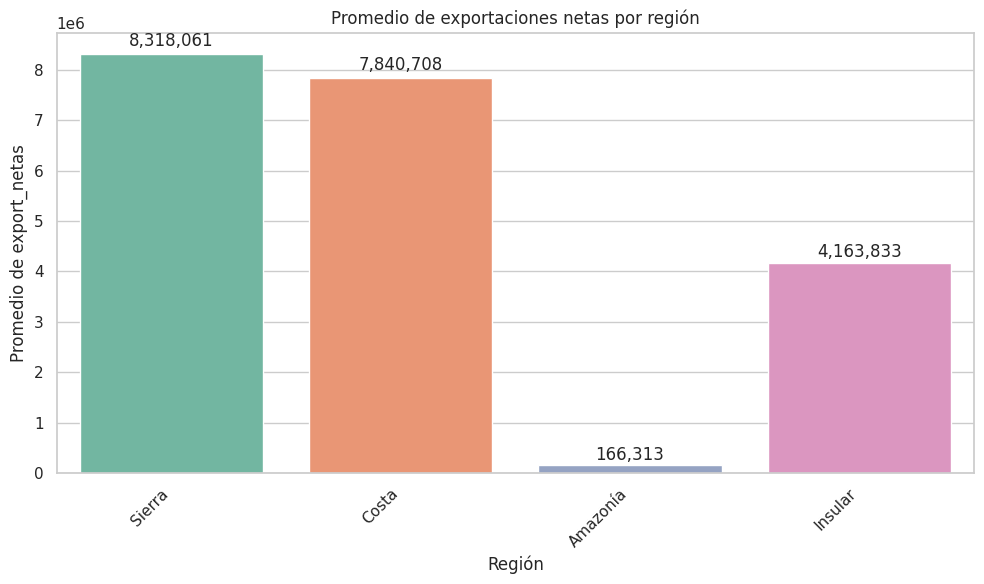

In [82]:
# -----------------------------
# Región vs promedio de exportaciones netas (con etiquetas)
# -----------------------------
promedios = df_exportadoras.groupby('region')['export_netas'].mean().reset_index()

# Mostrar resultados
print(promedios)

plt.figure(figsize=(10,6))
bars = sns.barplot(data=promedios, x='region', y='export_netas', palette='Set2')

# Añadir etiquetas de valor sobre cada barra
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posición horizontal en el centro de la barra
        height + 0.01*height,             # posición vertical ligeramente por encima de la barra
        f"{height:,.0f}",                 # mostrar valor con separador de miles y sin decimales
        ha='center', va='bottom'
    )

plt.title('Promedio de exportaciones netas por región')
plt.xlabel('Región')
plt.ylabel('Promedio de export_netas')
plt.xticks(rotation=45, ha='right')  # rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()


## **Tablas cruzadas (crosstable)**

In [83]:
# Tiene línea de crédito vs es exportadora
tabla_por_fila = pd.crosstab(df_exportadoras['linea_credito'], df_exportadoras['es_exportadora'], normalize='index') * 100
print(tabla_por_fila.round(2))


es_exportadora      0      1
linea_credito               
Si             70.220 29.780
No             71.060 28.940


In [84]:
# Sector vs es exportadora
tabla_por_fila = pd.crosstab(df_exportadoras['desc_sector'], df_exportadoras['es_exportadora'], normalize='index') * 100
print(tabla_por_fila.round(2))


es_exportadora      0      1
desc_sector                 
Comercio       78.130 21.870
Construcción   94.440  5.560
Manufactura    43.270 56.730
Minería        57.510 42.490
Servicios      79.310 20.690


In [85]:
# Exportadora vs sector
tabla_por_fila = pd.crosstab(df_exportadoras['es_exportadora'], df_exportadoras['desc_sector'], normalize='index') * 100
print(tabla_por_fila.round(2))

desc_sector     Comercio  Construcción  Manufactura  Minería  Servicios
es_exportadora                                                         
0                 52.590         3.750       13.740    2.210     27.720
1                 35.200         0.530       43.080    3.900     17.290


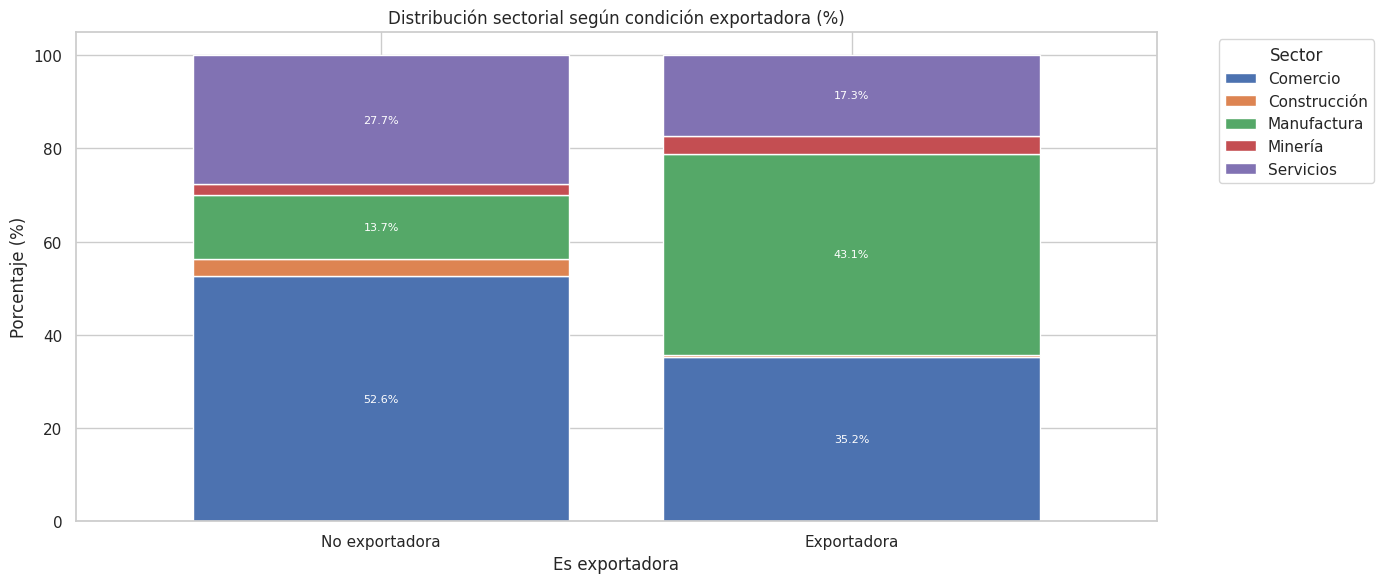

In [86]:
# ---------------------------------------
# Exportadora vs sector (porcentaje por fila)
# ---------------------------------------

tabla_por_fila = (
    pd.crosstab(df_exportadoras['es_exportadora'],
                df_exportadoras['desc_sector'],
                normalize='index') * 100
)

# Gráfico
ax = tabla_por_fila.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 6),
                         width=0.8)

# Añadir etiquetas de porcentaje
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height >= 5:  # mostrar solo si el segmento es >= 5%
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f"{height:.1f}%",
                    ha='center', va='center',
                    fontsize=8, color='white')

ax.set_xlabel("Es exportadora")
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución sectorial según condición exportadora (%)")
ax.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(['No exportadora', 'Exportadora'], rotation=0)

plt.tight_layout()
plt.show()


In [87]:
# Regresión vs es exportadora
tabla_por_fila = pd.crosstab(df_exportadoras['region'], df_exportadoras['es_exportadora'], normalize='index') * 100
print(tabla_por_fila.round(2))


es_exportadora      0      1
region                      
Sierra         74.080 25.920
Costa          65.990 34.010
Amazonía       95.800  4.200
Insular        81.820 18.180


In [88]:
# Exportadora vs sector
tabla_por_fila = pd.crosstab(df_exportadoras['es_exportadora'], df_exportadoras['region'], normalize='index') * 100
print(tabla_por_fila.round(2))

region          Sierra  Costa  Amazonía  Insular
es_exportadora                                  
0               54.510 43.980     1.400    0.110
1               45.600 54.190     0.150    0.060


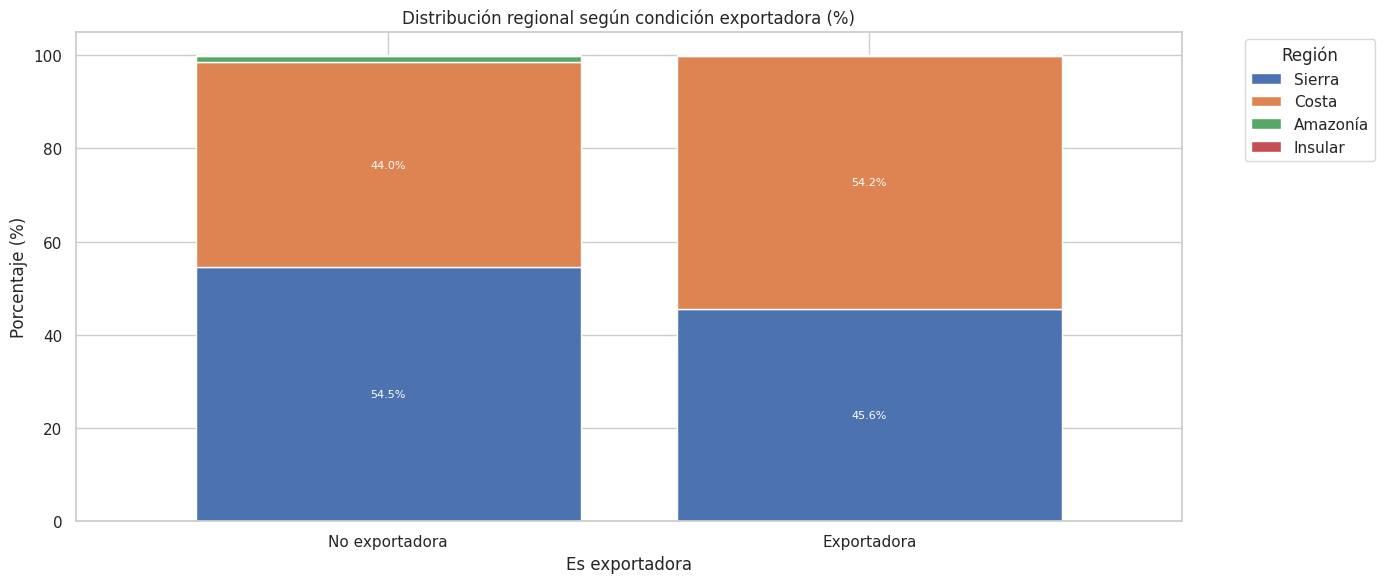

In [89]:
# ---------------------------------------
# Exportadora vs región (porcentaje por fila)
# ---------------------------------------

tabla_por_fila = (
    pd.crosstab(df_exportadoras['es_exportadora'],
                df_exportadoras['region'],
                normalize='index') * 100
)

# Gráfico
ax = tabla_por_fila.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 6),
                         width=0.8)

# Añadir etiquetas de porcentaje
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height >= 5:  # evitar saturación visual
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f"{height:.1f}%",
                    ha='center', va='center',
                    fontsize=8, color='white')

ax.set_xlabel("Es exportadora")
ax.set_ylabel("Porcentaje (%)")
ax.set_title("Distribución regional según condición exportadora (%)")
ax.legend(title="Región", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(['No exportadora', 'Exportadora'], rotation=0)

plt.tight_layout()
plt.show()


In [90]:
df_exportadoras.columns

Index(['anio', 'id_empresa', 'export_netas', 'export_bienes',
       'export_servicios', 'ventas_totales_bienes', 'ventas_totales',
       'ventas_locales', 'ingresos_totales', 'costo_ventas', 'costo_total',
       'costo_total_gasto', 'costo_transporte', 'gasto_operativo',
       'gasto_financiero', 'utilidad_ejercicio', 'valor_agregado',
       'produccion_total', 'activo_total', 'activos_fijos', 'personal_total',
       'tamano_empresa', 'profesionales', 'activos_fijos_propia', 'i_d',
       'cap_social_ext_priv', 'formacion_capital', 'pasivo_total',
       'linea_credito', 'costo_import_bienes', 'costo_import_mp', 'region',
       'sector', 'desc_sector', 'es_exportadora'],
      dtype='object')

In [91]:
# Contar el número de años únicos por empresa:
year_counts = df_exportadoras.groupby('id_empresa')['anio'].nunique()

# Identificar las empresas que tienen datos para todos los años (2019 a 2023 son 5 años):
empresas_balanceadas = year_counts[year_counts == 5].index

# Filtrar el DataFrame original para incluir solo las empresas balanceadas:
df_balanceado = df_exportadoras[df_exportadoras['id_empresa'].isin(empresas_balanceadas)].copy()

# Mostrar información sobre el DataFrame balanceado:
display(df_balanceado.head())

/tmp/ipython-input-2987861066.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_counts = df_exportadoras.groupby('id_empresa')['anio'].nunique()


anio   id_empresa  export_netas  export_bienes  export_servicios  \
0 2019.000  13582885014         0.000          0.000                 0   
1 2020.000  13582885014         0.000          0.000                 0   
2 2021.000  13582885014         0.000          0.000                 0   
3 2022.000  13582885014         0.000          0.000                 0   
4 2023.000  13582885014         0.000          0.000                 0   

   ventas_totales_bienes  ventas_totales  ventas_locales  ingresos_totales  \
0            9913036.000     9913036.000     9913036.000       9913603.000   
1            8376015.000     8376015.000     8376015.000       8378317.000   
2            8715832.000     8715832.000     8715832.000       8718659.000   
3            9959627.000     9959627.000     9959627.000       9965272.000   
4            5758087.000     5758087.000     5758087.000       5869664.000   

   costo_ventas  ...  cap_social_ext_priv  formacion_capital  pasivo_total  \
0       8340955  ...                0.000              0.000   2131063.000   
1       7061307  ...                  NaN          25175.000   1779474.000   
2       7325440  ...                  NaN          27298.000   1852887.000   
3       8457969  ...                0.000           4916.000   2106105.000   
4       4890869  ...                0.000          -9375.000    842015.000   

   linea_credito  costo_import_bienes  costo_import_mp  region  sector  \
0             No                    0                0  Sierra     G46   
1             No                    0                0  Sierra     G46   
2             No                    0                0  Sierra     G46   
3             Si                    0                0  Sierra     G46   
4             Si                    0                0  Sierra     G46   

   desc_sector  es_exportadora  
0     Comercio               0  
1     Comercio               0  
2     Comercio               0  
3     Comercio               0  
4     Comercio               0  

[5 rows x 35 columns]

Tabular el número de observaciones 'id_empresa' por año para verificación:

In [92]:
df_balanceado.columns

Index(['anio', 'id_empresa', 'export_netas', 'export_bienes',
       'export_servicios', 'ventas_totales_bienes', 'ventas_totales',
       'ventas_locales', 'ingresos_totales', 'costo_ventas', 'costo_total',
       'costo_total_gasto', 'costo_transporte', 'gasto_operativo',
       'gasto_financiero', 'utilidad_ejercicio', 'valor_agregado',
       'produccion_total', 'activo_total', 'activos_fijos', 'personal_total',
       'tamano_empresa', 'profesionales', 'activos_fijos_propia', 'i_d',
       'cap_social_ext_priv', 'formacion_capital', 'pasivo_total',
       'linea_credito', 'costo_import_bienes', 'costo_import_mp', 'region',
       'sector', 'desc_sector', 'es_exportadora'],
      dtype='object')

In [93]:
# Lista de columnas significativas
columnas_significativas = [ 'anio','id_empresa',
    'export_bienes',
    'valor_agregado',
    'costo_transporte',
    'utilidad_ejercicio',
    'produccion_total',
    'ventas_totales_bienes',
    'ingresos_totales',
    'ventas_totales',
    'costo_total',
    'gasto_operativo',
    'pasivo_total',
    'personal_total',
    'activos_fijos',
    'ventas_locales',
    'es_exportadora',
    'gasto_financiero',
    'formacion_capital',
    'activo_total',
    'costo_ventas',
    'profesionales',
    'costo_total_gasto'
]

# Mantener solo las columnas significativas
df_balanceado = df_balanceado[columnas_significativas]

# Verificar
df_balanceado.head()


anio   id_empresa  export_bienes  valor_agregado  costo_transporte  \
0 2019.000  13582885014          0.000     1129628.000                 0   
1 2020.000  13582885014          0.000      916366.000                 0   
2 2021.000  13582885014          0.000     1103881.000                 0   
3 2022.000  13582885014          0.000     1170736.000                 0   
4 2023.000  13582885014          0.000      616893.000                 0   

   utilidad_ejercicio  produccion_total  ventas_totales_bienes  \
0          205958.000       1572118.000            9913036.000   
1           80282.000       1314708.000            8376015.000   
2          213649.000       1416949.000            8715832.000   
3          197499.000       1502276.000            9959627.000   
4           50172.000        867218.000            5758087.000   

   ingresos_totales  ventas_totales  ...  personal_total  activos_fijos  \
0       9913603.000     9913036.000  ...              69     630449.000   
1       8378317.000     8376015.000  ...              64     655624.000   
2       8718659.000     8715832.000  ...              64     682924.000   
3       9965272.000     9959627.000  ...              62     687840.000   
4       5869664.000     5758087.000  ...              39     687843.000   

   ventas_locales  es_exportadora  gasto_financiero  formacion_capital  \
0     9913036.000               0                 0              0.000   
1     8376015.000               0              3600          25175.000   
2     8715832.000               0              3600          27298.000   
3     9959627.000               0              2605           4916.000   
4     5758087.000               0              4840          -9375.000   

   activo_total  costo_ventas  profesionales  costo_total_gasto  
0   3208366.000       8340955              5            1366690  
1   2713326.000       7061307              5            1236728  
2   2845175.000       7325440              5            1179570  
3   3130514.000       8457969              5            1309804  
4   1735909.000       4890869              1             928623  

[5 rows x 23 columns]

In [94]:
# Año vs id
df_balanceado['anio'] = df_balanceado['anio'].astype(int)

# Tabular el número de observaciones 'id_empresa' por año
observaciones_por_año = df_balanceado.groupby('anio')['id_empresa'].nunique()

# Mostrar la tabulación
display(observaciones_por_año)


anio
2019    2314
2020    2314
2021    2314
2022    2314
2023    2314
Name: id_empresa, dtype: int64

In [95]:
# Revisar NAs
print(np.isnan(df_balanceado['es_exportadora']).sum())

print(df_balanceado.isna().sum())


0
anio                     0
id_empresa               0
export_bienes            0
valor_agregado           0
costo_transporte         0
utilidad_ejercicio       0
produccion_total         0
ventas_totales_bienes    0
ingresos_totales         0
ventas_totales           0
costo_total              0
gasto_operativo          0
pasivo_total             0
personal_total           0
activos_fijos            0
ventas_locales           0
es_exportadora           0
gasto_financiero         0
formacion_capital        0
activo_total             0
costo_ventas             0
profesionales            0
costo_total_gasto        0
dtype: int64


In [96]:
# Revisa el resultado:
print(df_balanceado['es_exportadora'].value_counts())

es_exportadora
0    8158
1    3412
Name: count, dtype: int64


In [97]:
# Balanceado
print(df_balanceado['es_exportadora'].isna().value_counts())

es_exportadora
False    11570
Name: count, dtype: int64


In [98]:
# Columnas con NA
df_balanceado = df_balanceado.dropna(axis=1)

In [100]:
df_balanceado.dtypes

anio                        int64
id_empresa               category
export_bienes             float64
valor_agregado            float64
costo_transporte            int32
utilidad_ejercicio        float64
produccion_total          float64
ventas_totales_bienes     float64
ingresos_totales          float64
ventas_totales            float64
costo_total               float64
gasto_operativo             int32
pasivo_total              float64
personal_total              int16
activos_fijos             float64
ventas_locales            float64
es_exportadora              int64
gasto_financiero            int32
formacion_capital         float64
activo_total              float64
costo_ventas                int32
profesionales               int16
costo_total_gasto           int32
dtype: object

### Importancia de las Variables (Random Forest - Gini Importance) ###
ventas_totales_bienes   0.158
ventas_locales          0.153
produccion_total        0.077
costo_total             0.063
costo_ventas            0.058
valor_agregado          0.051
activos_fijos           0.051
costo_total_gasto       0.041
personal_total          0.039
ventas_totales          0.038
pasivo_total            0.037
activo_total            0.037
gasto_operativo         0.036
gasto_financiero        0.034
ingresos_totales        0.033
utilidad_ejercicio      0.033
profesionales           0.026
formacion_capital       0.025
anio                    0.009
costo_transporte        0.001
dtype: float64


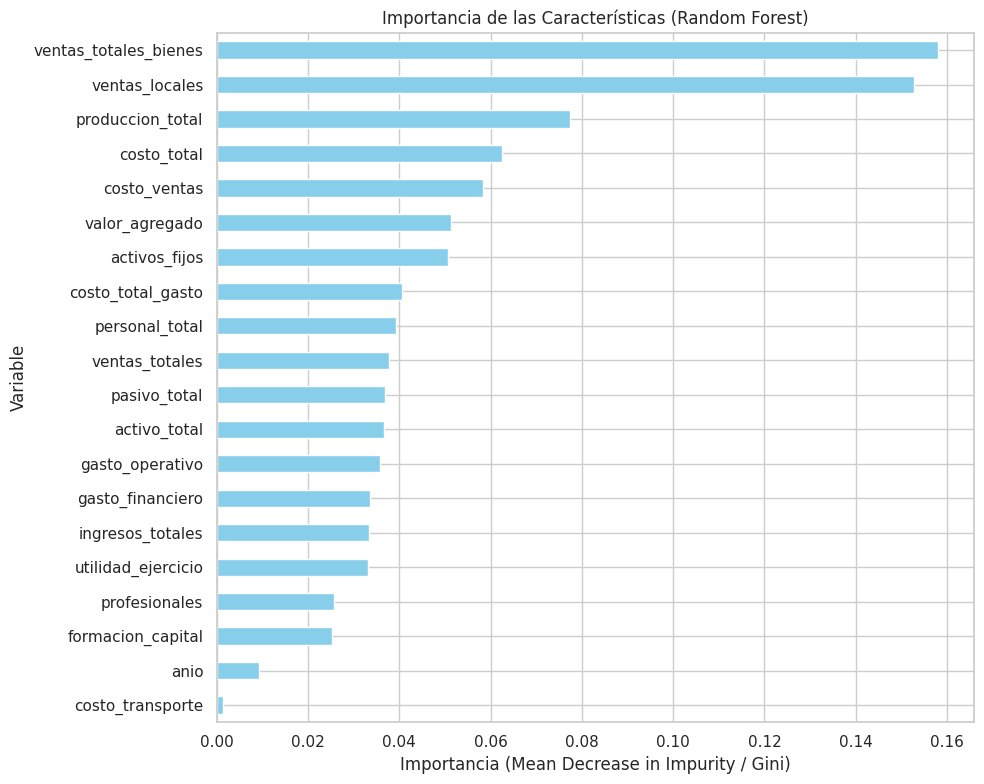

In [101]:
# Importancia de características mediante Random Forest

from sklearn.ensemble import RandomForestClassifier

# -----------------------------
# 1. Selección de Variables (excluyendo strings, la dependiente y export_bienes)
# -----------------------------
# Detectar columnas de tipo string (object) para excluirlas
columnas_string = df_balanceado.select_dtypes(include=['object']).columns

# Excluir la variable dependiente, columnas string y export_bienes
variables_a_excluir = ['es_exportadora', 'export_bienes'] + list(columnas_string)
variables_a_excluir = list(set(variables_a_excluir))  # eliminar duplicados si es necesario

# -----------------------------
# 2. Definir X (características) e y (variable objetivo)
# -----------------------------
X = df_balanceado.drop(columns=variables_a_excluir, errors='ignore')
y = df_balanceado['es_exportadora']

# Asegurarse de que las variables de entrada sean solo numéricas
X = X.select_dtypes(include=np.number)

# -----------------------------
# 3. Entrenar el Modelo Random Forest
# -----------------------------
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X, y)

# -----------------------------
# 4. Calcular y Visualizar la Importancia de las Variables
# -----------------------------
importancias = modelo_rf.feature_importances_
importancia_df = pd.Series(importancias, index=X.columns)
importancia_ordenada = importancia_df.sort_values(ascending=False)

# Imprimir importancias
print("### Importancia de las Variables (Random Forest - Gini Importance) ###")
print(importancia_ordenada)

# Visualización
plt.figure(figsize=(10, len(importancia_ordenada) * 0.4))
importancia_ordenada.plot(kind='barh', color='skyblue')
plt.title('Importancia de las Características (Random Forest)')
plt.xlabel('Importancia (Mean Decrease in Impurity / Gini)')
plt.ylabel('Variable')
plt.gca().invert_yaxis()  # Poner la más importante arriba
plt.tight_layout()
plt.show()


In [102]:
# Remover NAs
df_balanceado = df_balanceado.dropna()

In [103]:
# ============================================
# WINSORIZACIÓN DE OUTLIERS (RECOMENDADO)
# ============================================

excluir = ['anio', 'es_exportadora', 'id_empresa']
cols = df_balanceado.select_dtypes(include='number').columns
cols = [c for c in cols if c not in excluir]

df_limpio = df_balanceado.copy()

for col in cols:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_limpio[col] = df_limpio[col].clip(lower, upper)

print("Observaciones finales:", df_limpio.shape)
print(df_limpio['es_exportadora'].value_counts())


Observaciones finales: (11570, 23)
es_exportadora
0    8158
1    3412
Name: count, dtype: int64


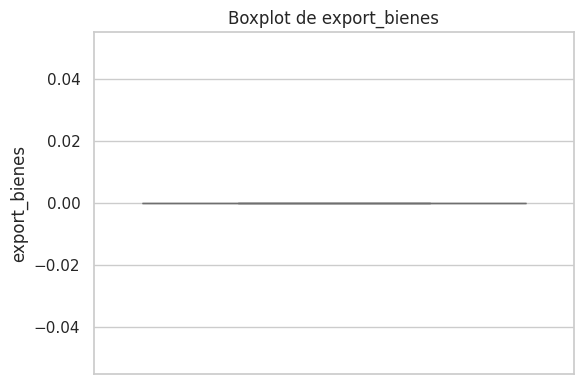

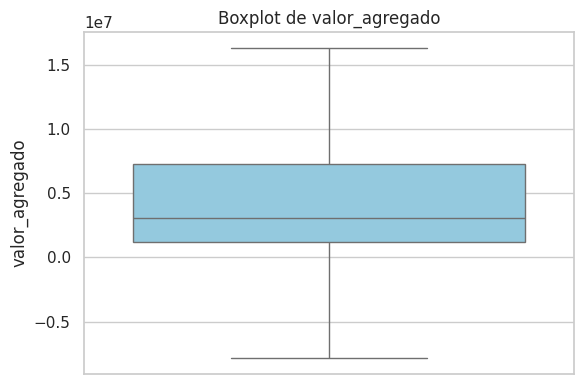

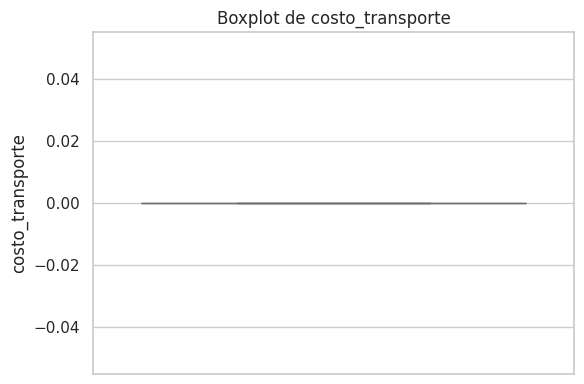

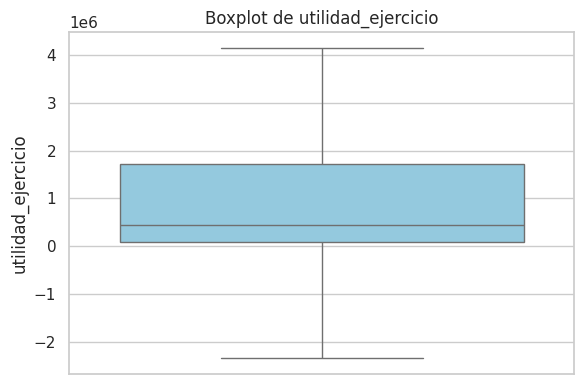

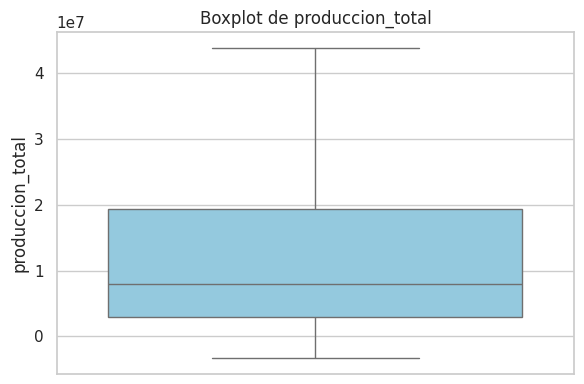

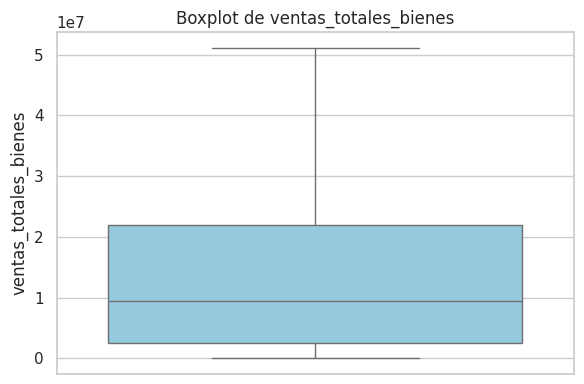

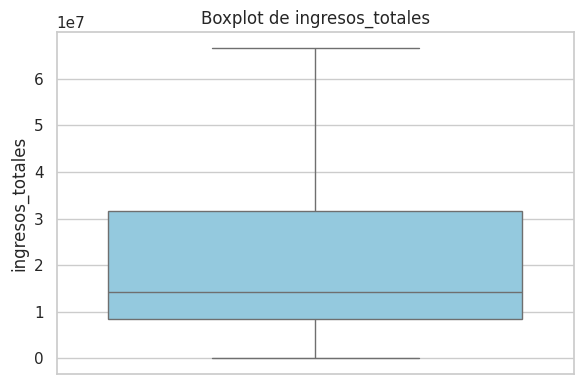

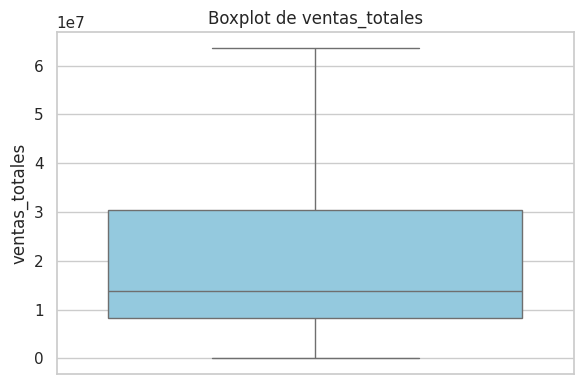

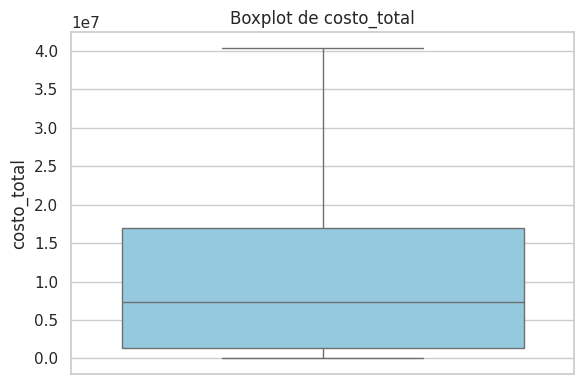

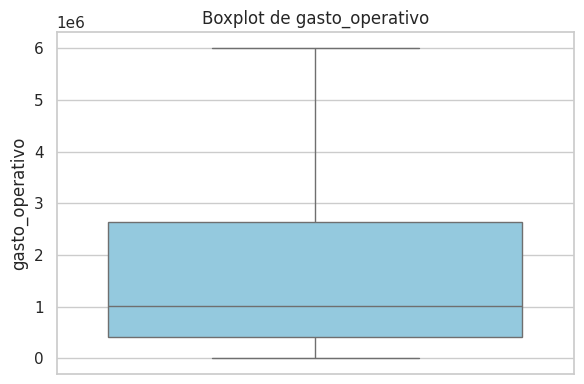

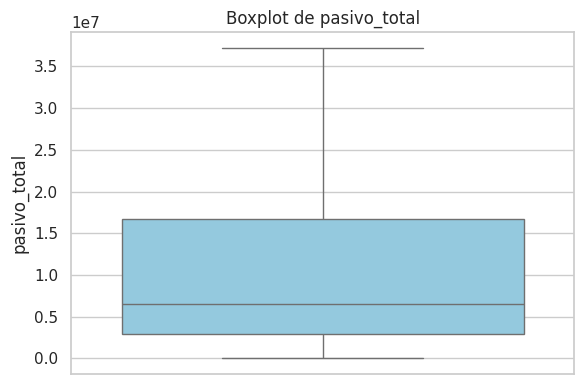

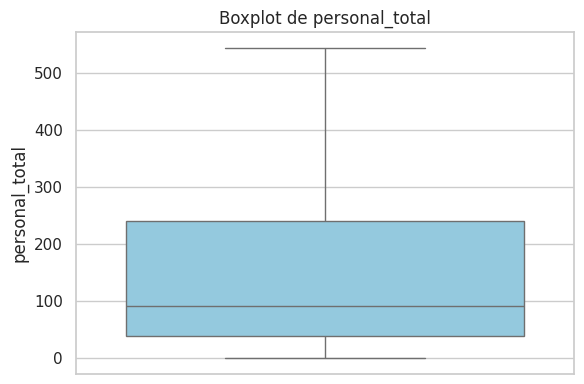

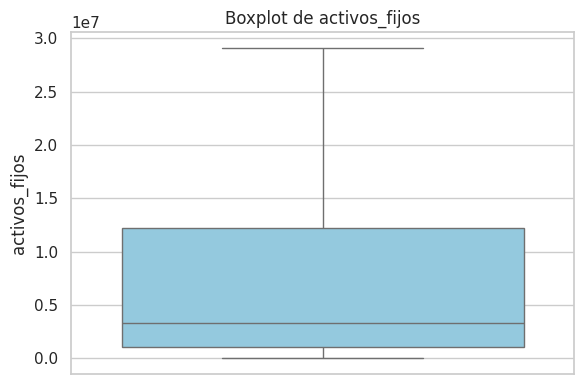

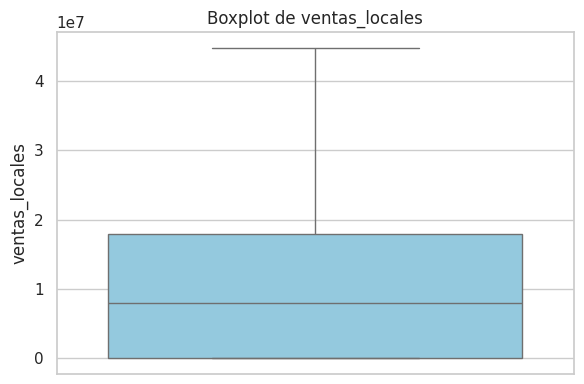

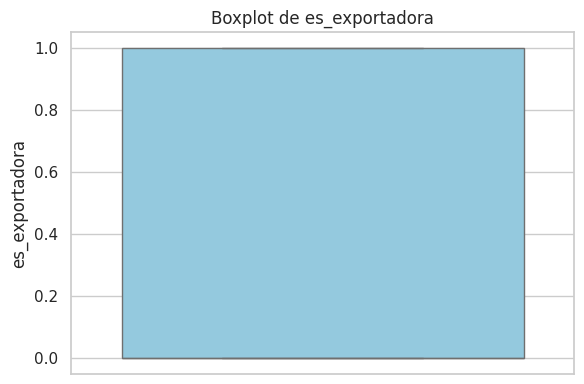

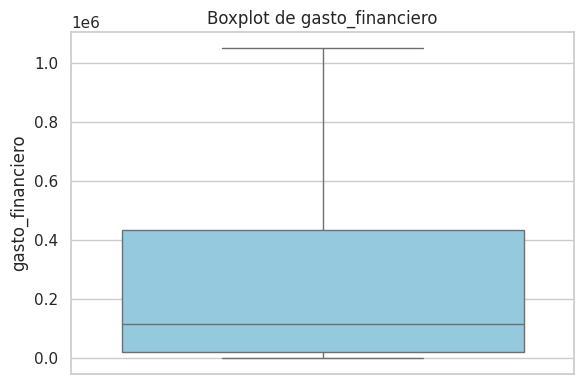

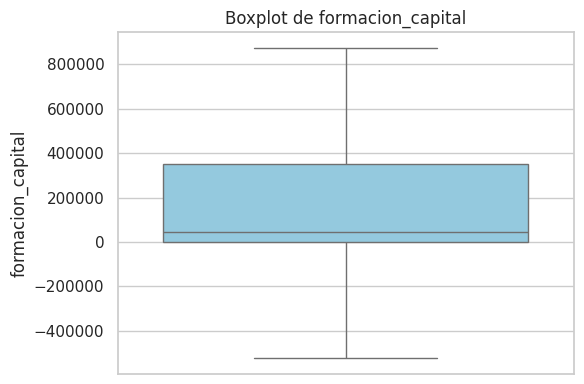

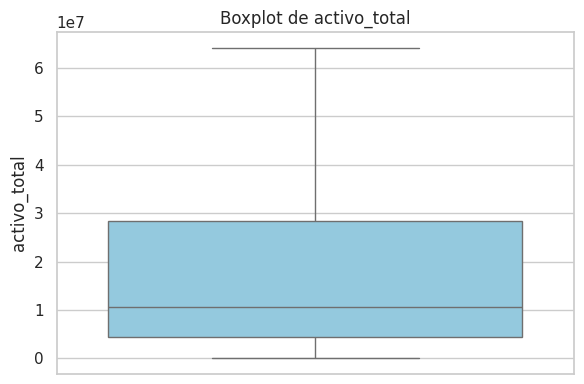

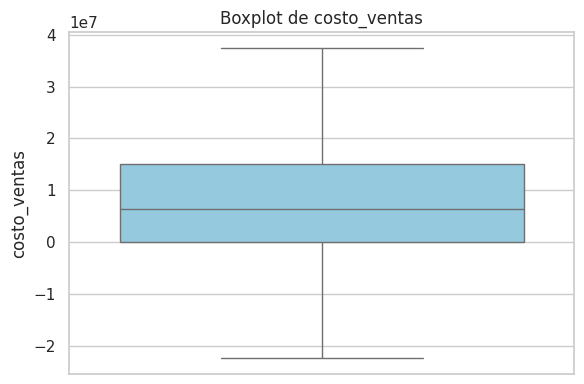

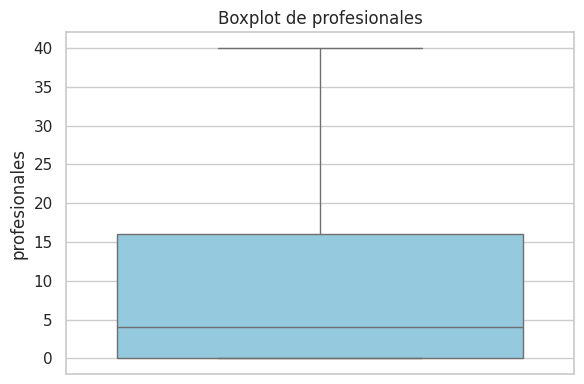

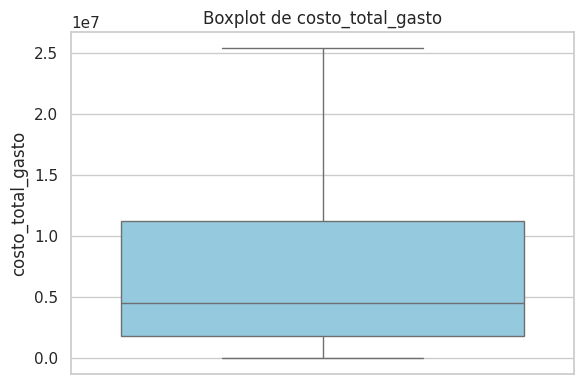

In [104]:
# Boxplot

# Seleccionar solo variables numéricas
vars_numericas = df_limpio.select_dtypes(include=np.number).columns

# Excluir identificadores si existen
vars_numericas = [v for v in vars_numericas
                  if v not in ["anio", "id_empresa"]]

# Crear boxplots uno por uno
for var in vars_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_limpio[var], color="skyblue")
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


In [106]:
# Revisar VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --------------------------------------------
# 1. Seleccionar X (solo explicativas)
# --------------------------------------------
excluir = ["es_exportadora", "anio", "id_empresa"]

X = df_limpio.drop(columns=excluir, errors="ignore")
X = X.select_dtypes(include=[np.number])

# Eliminar columnas constantes
X = X.loc[:, X.nunique() > 1]

# --------------------------------------------
# 2. (Opcional pero recomendado) Escalar
# --------------------------------------------
X_scaled = pd.DataFrame(
    StandardScaler().fit_transform(X),
    columns=X.columns,
    index=X.index
)

# --------------------------------------------
# 3. Añadir constante
# --------------------------------------------
X_const = add_constant(X_scaled)

# --------------------------------------------
# 4. Calcular VIF
# --------------------------------------------
vif_df = pd.DataFrame({
    "Variable": X_const.columns,
    "VIF": [
        variance_inflation_factor(X_const.values, i)
        for i in range(X_const.shape[1])
    ]
})

# Eliminar la constante del reporte
vif_df = vif_df[vif_df["Variable"] != "const"]

# Ordenar de mayor a menor
vif_df = vif_df.sort_values("VIF", ascending=False)

print(vif_df)


                 Variable    VIF
5        ingresos_totales 85.949
6          ventas_totales 84.402
7             costo_total 29.181
16           costo_ventas 19.297
4   ventas_totales_bienes 18.341
3        produccion_total  7.338
15           activo_total  6.792
1          valor_agregado  6.526
18      costo_total_gasto  6.463
9            pasivo_total  6.193
12         ventas_locales  4.772
8         gasto_operativo  3.606
11          activos_fijos  3.480
10         personal_total  2.990
2      utilidad_ejercicio  2.317
13       gasto_financiero  2.252
17          profesionales  1.490
14      formacion_capital  1.275


In [107]:
# ============================================
# REGRESIÓN LOGÍSTICA LASSO
# ============================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, classification_report

# ============================================
# 1. Variables a EXCLUIR por colinealidad (VIF > 10)
# ============================================
colineales = [
    "ingresos_totales",
    "ventas_totales",
    "costo_total",
    "costo_ventas",
    "ventas_totales_bienes"
]

# Variables que no deben entrar al modelo
excluir_base = ["anio", "id_empresa"]

# ============================================
# 2. Preparar X e y
# ============================================
y = df_limpio["es_exportadora"].astype(int)

X = df_limpio.drop(
    columns=excluir_base + ["es_exportadora"] + colineales,
    errors="ignore"
)

# Mantener solo numéricas
X = X.select_dtypes(include="number")

print("Variables utilizadas en el modelo:")
print(X.columns.tolist())

# ============================================
# 3. Train / Test split (estratificado)
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# ============================================
# 4. Escalado
# ============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================
# 5. LASSO Logístico (L1)
# ============================================
lasso = LogisticRegressionCV(
    penalty="l1",
    solver="saga",
    Cs=10,
    cv=5,
    scoring="roc_auc",
    max_iter=5000,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

lasso.fit(X_train_scaled, y_train)

# ============================================
# 6. Coeficientes seleccionados
# ============================================
coef = pd.Series(
    lasso.coef_[0],
    index=X.columns
)

coef_no_cero = coef[coef != 0].sort_values(ascending=False)

print("\n### Variables seleccionadas por LASSO ###")
print(coef_no_cero)

# ============================================
# 7. Evaluación
# ============================================
y_pred_proba = lasso.predict_proba(X_test_scaled)[:, 1]
y_pred = lasso.predict(X_test_scaled)

print("\nROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Variables utilizadas en el modelo:
['export_bienes', 'valor_agregado', 'costo_transporte', 'utilidad_ejercicio', 'produccion_total', 'gasto_operativo', 'pasivo_total', 'personal_total', 'activos_fijos', 'ventas_locales', 'gasto_financiero', 'formacion_capital', 'activo_total', 'profesionales', 'costo_total_gasto']

### Variables seleccionadas por LASSO ###
produccion_total     1.017
pasivo_total         0.086
valor_agregado       0.056
activos_fijos        0.055
profesionales       -0.033
ventas_locales      -0.070
personal_total      -0.107
activo_total        -0.123
costo_total_gasto   -0.466
dtype: float64

ROC AUC: 0.7091763351808336

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2447
           1       0.48      0.45      0.47      1024

    accuracy                           0.69      3471
   macro avg       0.63      0.62      0.63      3471
weighted avg       0.69      0.69      0.69      3471



In [108]:
# ============================================
# REGRESIÓN LOGÍSTICA CLÁSICA CON VARIABLES SELECCIONADAS + EFECTOS MARGINALES
# ============================================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import statsmodels.api as sm

# --------------------------------------------
# 1. Variables seleccionadas
# --------------------------------------------
vars_modelo = [
    'produccion_total',
    'pasivo_total',
    'valor_agregado',
    'activos_fijos',
    'profesionales',
    'ventas_locales',
    'personal_total',
    'activo_total',
    'costo_total_gasto'
]

# 2. Preparar X e y
X = df_limpio[vars_modelo]
y = df_limpio['es_exportadora'].astype(int)

# 3. Estandarizar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Ajustar modelo de regresión logística
modelo_logit = LogisticRegression(solver='lbfgs', max_iter=5000)
modelo_logit.fit(X_scaled, y)

# 5. Probabilidades predichas
y_pred_proba = modelo_logit.predict_proba(X_scaled)[:, 1]

# 6. Ajustar el punto de corte (threshold)
threshold = 0.38  # cambiar este valor según necesidad
y_pred = (y_pred_proba >= threshold).astype(int)

# 7. Métricas
print("ROC AUC:", roc_auc_score(y, y_pred_proba))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y, y_pred))

# 8. Coeficientes
coef_df = pd.DataFrame({
    'Variable': vars_modelo,
    'Coeficiente': modelo_logit.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes del modelo:\n", coef_df)

# --------------------------------------------
# 9. Efectos marginales con statsmodels
# --------------------------------------------
# statsmodels requiere agregar la constante manualmente
X_sm = sm.add_constant(X_scaled)
y_sm = y.values

# Ajustar modelo logit con statsmodels
logit_sm = sm.Logit(y_sm, X_sm)
resultado_sm = logit_sm.fit(disp=False)

# Calcular efectos marginales
margeff = resultado_sm.get_margeff()
me_summary = margeff.summary_frame()

# Mostrar resumen completo
print("\nEfectos marginales (dy/dx) de cada variable:\n")
print(me_summary)


ROC AUC: 0.7042429277053688

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81      8158
           1       0.52      0.38      0.44      3412

    accuracy                           0.72     11570
   macro avg       0.65      0.62      0.62     11570
weighted avg       0.70      0.72      0.70     11570


Matriz de Confusión:
 [[6997 1161]
 [2131 1281]]

Coeficientes del modelo:
             Variable  Coeficiente
0   produccion_total        0.953
1       pasivo_total        0.188
3      activos_fijos        0.160
2     valor_agregado        0.129
4      profesionales       -0.018
5     ventas_locales       -0.061
6     personal_total       -0.115
7       activo_total       -0.255
8  costo_total_gasto       -0.565

Efectos marginales (dy/dx) de cada variable:

    dy/dx  Std. Err.       z  Pr(>|z|)  Conf. Int. Low  Cont. Int. Hi.
x1  0.178      0.008  22.686     0.000           0.162           0.193
x2  0.035     

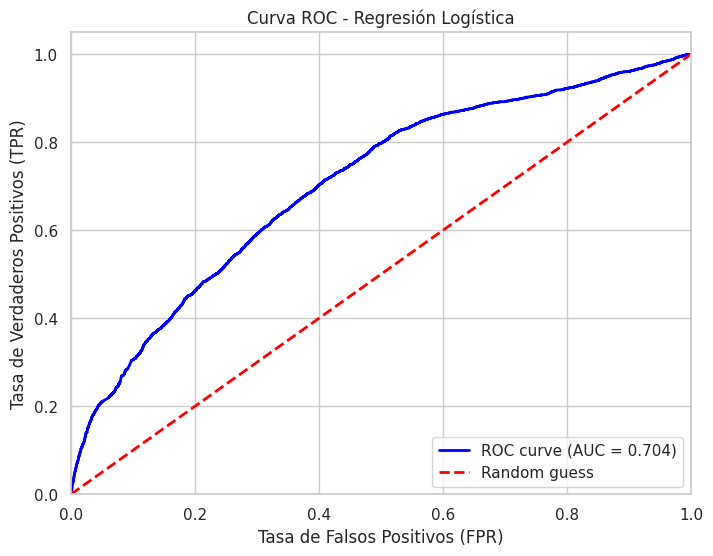

In [109]:
# ============================================
# CURVA ROC PARA REGRESIÓN LOGÍSTICA
# ============================================

from sklearn.metrics import roc_curve, auc

# 1. Calcular FPR, TPR y umbrales
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# 2. Calcular AUC
roc_auc = auc(fpr, tpr)

# 3. Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [110]:
# --------------------------------------------
# Exportar variables
# --------------------------------------------

# Variables utilizadas en la regresión
vars_modelo = [
    'produccion_total',
    'pasivo_total',
    'valor_agregado',
    'activos_fijos',
    'profesionales',
    'ventas_locales',
    'personal_total',
    'activo_total',
    'costo_total_gasto'
]

# Añadir la variable dependiente
vars_exportar = ['es_exportadora']+['anio']+['id_empresa'] + vars_modelo

# Crear dataframe con solo esas columnas
df_export = df_limpio[vars_exportar].copy()

# Exportar a Excel
ruta_salida = "df_regresion_logistica.xlsx"
df_export.to_excel(ruta_salida, index=False)

print(f"Dataframe exportado correctamente a: {ruta_salida}")


Dataframe exportado correctamente a: df_regresion_logistica.xlsx


In [111]:
# ============================================
# REGRESIÓN LINEAL DE EFECTOS ALEATORIOS (variables estandarizadas)
# ============================================

from linearmodels.panel import RandomEffects
from sklearn.preprocessing import StandardScaler

# Variables seleccionadas
vars_re = [
    'produccion_total',
    'pasivo_total',
    'valor_agregado',
    'activos_fijos',
    'profesionales',
    'ventas_locales',
    'personal_total',
    'activo_total',
    'costo_total_gasto'
]

# 1. Preparar dataframe de panel
dfp = df_limpio.set_index(['id_empresa', 'anio'])

# 2. Definir dependiente y regresores
y = dfp['es_exportadora']  # variable dependiente
X = dfp[vars_re]

# 3. Convertir todas las columnas a numéricas y eliminar filas con NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=0)
y = y.loc[X.index]  # sincronizar índice

# 4. Estandarizar las variables independientes
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# 5. Ajustar modelo de efectos aleatorios con variables estandarizadas
modelo_re = RandomEffects(y, X_scaled)
resultado = modelo_re.fit()

# 6. Resumen
print(resultado.summary)


/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:604: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_sum: DataFrame = frame.groupby(level=level).transform("sum")
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:606: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_weights: DataFrame = frame.groupby(level=level).transform("sum")
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:604: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

                        RandomEffects Estimation Summary                        
Dep. Variable:         es_exportadora   R-squared:                        0.0113
Estimator:              RandomEffects   R-squared (Between):              0.0517
No. Observations:               11570   R-squared (Within):               0.0003
Date:                Wed, Dec 10 2025   R-squared (Overall):              0.0463
Time:                        14:03:56   Log-likelihood                    2359.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.726
Entities:                        2314   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                 F(9,11561)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             14.726
                            

/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:595: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")


In [112]:
# ============================================
# REGRESIÓN LINEAL DE EFECTOS ALEATORIOS (solo variables significativas)
# ============================================

# Variables significativas
vars_sig = [
    'produccion_total',
    'activos_fijos',
    'ventas_locales',
    'costo_total_gasto'
]

# 1. Preparar dataframe de panel
dfp = df_limpio.set_index(['id_empresa', 'anio'])

# 2. Definir dependiente y regresores
y = dfp['es_exportadora']  # variable dependiente
X = dfp[vars_sig]

# 3. Convertir todas las columnas a numéricas y eliminar filas con NaN
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna(axis=0)
y = y.loc[X.index]  # sincronizar índice

# 4. Estandarizar las variables independientes
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

# 5. Ajustar modelo de efectos aleatorios con variables estandarizadas
modelo_re = RandomEffects(y, X_scaled)
resultado = modelo_re.fit()

# 6. Resumen
print(resultado.summary)


/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:604: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_sum: DataFrame = frame.groupby(level=level).transform("sum")
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:606: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_weights: DataFrame = frame.groupby(level=level).transform("sum")
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:604: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

                        RandomEffects Estimation Summary                        
Dep. Variable:         es_exportadora   R-squared:                        0.0109
Estimator:              RandomEffects   R-squared (Between):              0.0518
No. Observations:               11570   R-squared (Within):              -0.0002
Date:                Wed, Dec 10 2025   R-squared (Overall):              0.0463
Time:                        14:03:57   Log-likelihood                    2360.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      31.874
Entities:                        2314   P-value                           0.0000
Avg Obs:                       5.0000   Distribution:                 F(4,11566)
Min Obs:                       5.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             31.874
                            

/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:645: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = self._frame.groupby(level=level).count()
/usr/local/lib/python3.12/dist-packages/linearmodels/panel/data.py:685: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

### Regresión Logística Stepwise Hacia Atrás (Pooled Data)

LA regresión por pasos, podemos aplicar una regresión logística en los datos agrupados (ignorando la estructura de panel por ahora) para identificar las variables más influyentes. Luego, estas variables se pueden usar en modelos de panel más complejos.

Vamos a definir una función para realizar la **eliminación hacia atrás** (backward elimination) basada en el p-valor de cada coeficiente. Empezaremos con todas las variables predictoras (excepto `id_empresa` y `anio`) y eliminaremos iteratively la variable con el p-valor más alto que sea mayor que un umbral predefinido (e.g., 0.05).

**Reasoning**:
The previous code for backward stepwise logistic regression encountered `LinAlgError` due to multicollinearity and potentially constant features in subsets of the data. To address this, I will modify cell `63f51e13` to refine the feature selection process. This involves curating a list of numerical features to reduce collinearity, specifically removing highly correlated variables such as 'ingresos_totales', 'produccion_total', 'valor_agregado', 'ventas_locales', 'ventas_totales_bienes', 'costo_ventas', and 'costo_total' and retaining 'ventas_totales' as the primary sales metric. Additionally, I will update the categorical feature list to use 'desc_sector' for dummy encoding instead of 'sector', and then re-create the `df_exportadoras_dummies` DataFrame. Finally, I will reconstruct `X_logit` and `y_logit` with these refined features and ensure all columns are numeric, handle any remaining NaNs, and convert boolean columns to integers before running the stepwise selection. This robust data preparation should prevent numerical stability issues in the logistic regression.



In [113]:
import statsmodels.api as sm

def backward_stepwise_logistic(X, y, initial_features, p_threshold=0.05):

    features = list(initial_features)
    while len(features) > 0:
        X_current = X[features]
        X_current = sm.add_constant(X_current, has_constant='add')

        try:
            model = sm.Logit(y, X_current).fit(disp=0)
        except np.linalg.LinAlgError as e:
            print(f"LinAlgError durante el ajuste del modelo con características: {features}. Error: {e}")
            problematic_cols = [col for col in X_current.columns if X_current[col].nunique() <= 1 and col != 'const']
            if problematic_cols:
                for p_col in problematic_cols:
                    if p_col in features:
                        features.remove(p_col)
                        print(f"Eliminada columna constante o con varianza cero: {p_col}")
                continue
            else:

                if not p_values.empty and p_values.max() > p_threshold: #
                    feature_to_remove = p_values.idxmax()
                    if feature_to_remove in features:
                        features.remove(feature_to_remove)
                        print(f"LinAlgError: Removing highest p-value feature: {feature_to_remove} to resolve singularity.")
                        continue
                elif len(features) > 0: #
                    feature_to_remove = features.pop()
                    print(f"LinAlgError: No clear highest p-value. Forcing removal of: {feature_to_remove} to resolve singularity.")
                    continue
                else:
                    print("No features left to remove. Terminating stepwise due to persistent LinAlgError.")
                    break

        p_values = model.pvalues.drop('const', errors='ignore') #
        if p_values.empty:
            print("No hay p-valores para evaluar. Terminando el stepwise.")
            break

        max_p_value = p_values.max()

        if max_p_value > p_threshold:
            redundant_feature = p_values.idxmax()
            features.remove(redundant_feature)
            print(f"Eliminando: {redundant_feature} (p-valor: {max_p_value:.4f})")
        else:
            break
    return features

# ================================================
# 1. eleccionar variable stepwise
# ================================================

numerical_features_curated = [
    'gasto_operativo',
    'pasivo_total',
    'personal_total',
    'activos_fijos',
    'gasto_financiero',
    'formacion_capital',
    'activo_total',
    'profesionales',
    'costo_total_gasto',
    'costo_transporte',
    'utilidad_ejercicio',
    'i_d',
    'cap_social_ext_priv',
    'costo_import_bienes',
    'costo_import_mp',
    'ventas_totales' # Keep as main sales metric
]


valid_numerical_features = [col for col in numerical_features_curated if col in df_exportadoras.columns and np.issubdtype(df_exportadoras[col].dtype, np.number)]

# ================================================
# 2. categorias
# ================================================
#
categorical_cols = [
    'tamano_empresa',
    'linea_credito',
    'region',
    'desc_sector' #
]

#
existent_categorical_cols = [col for col in categorical_cols if col in df_exportadoras.columns]

# ================================================
# 3.  df_exportadoras_dummies
# ================================================
df_exportadoras_dummies = pd.get_dummies(
    df_exportadoras,
    columns=existent_categorical_cols,
    drop_first=True
)

# ================================================
# 4. Defino variable para stepwise
# ================================================
# Columnas dummy
dummy_cols = [col for col in df_exportadoras_dummies.columns if any(cat_col in col for cat_col in existent_categorical_cols) and df_exportadoras_dummies[col].dtype == 'bool']


initial_features = valid_numerical_features + dummy_cols

exclusion_set = {'id_empresa', 'anio', 'es_exportadora', 'export_netas', 'export_bienes', 'export_servicios'}

# Filter initial_features to remove any from the exclusion set
final_initial_features = [f for f in initial_features if f not in exclusion_set]

X_logit = df_exportadoras_dummies[final_initial_features].copy()
y_logit = df_exportadoras_dummies['es_exportadora'].astype(int).copy()


for col in X_logit.columns:

    X_logit[col] = pd.to_numeric(X_logit[col], errors='coerce')

#
X_logit = X_logit.dropna(axis=1, how='all')


#
combined = pd.concat([X_logit, y_logit], axis=1).dropna()
X_logit = combined.drop(columns=['es_exportadora'])
y_logit = combined['es_exportadora']

#
for col in X_logit.select_dtypes(include=['bool']).columns:
    X_logit[col] = X_logit[col].astype(int)

# Final check
non_constant_columns = X_logit.columns[X_logit.nunique() > 1].tolist()
constant_columns = [col for col in X_logit.columns if col not in non_constant_columns]
if constant_columns:
    print(f"Eliminando columnas constantes antes del stepwise (post-processing): {constant_columns}")
    X_logit = X_logit[non_constant_columns]

#
final_initial_features = X_logit.columns.tolist()

print("Iniciando selección backward stepwise...")
selected_features = backward_stepwise_logistic(X_logit, y_logit, final_initial_features, p_threshold=0.05)

print("\nCaracterísticas seleccionadas por stepwise:", selected_features)

# Ajustar el modelo logístico final con las características seleccionadas
X_final = sm.add_constant(X_logit[selected_features])
final_logit_model = sm.Logit(y_logit, X_final).fit(disp=False) #

print("\nResumen del modelo logístico final con características seleccionadas:")
print(final_logit_model.summary())

Iniciando selección backward stepwise...
Eliminando: region_Insular (p-valor: 0.9674)
Eliminando: desc_sector_Servicios (p-valor: 0.9360)
Eliminando: i_d (p-valor: 0.9226)
Eliminando: formacion_capital (p-valor: 0.7579)
Eliminando: activo_total (p-valor: 0.4011)
Eliminando: gasto_operativo (p-valor: 0.2605)
Eliminando: linea_credito_No (p-valor: 0.2321)
Eliminando: costo_total_gasto (p-valor: 0.1628)
Eliminando: personal_total (p-valor: 0.0965)

Características seleccionadas por stepwise: ['pasivo_total', 'activos_fijos', 'gasto_financiero', 'profesionales', 'costo_transporte', 'utilidad_ejercicio', 'cap_social_ext_priv', 'costo_import_bienes', 'costo_import_mp', 'ventas_totales', 'tamano_empresa_Mediana Empresa A', 'tamano_empresa_Mediana Empresa B', 'region_Costa', 'region_Amazonía', 'desc_sector_Construcción', 'desc_sector_Manufactura', 'desc_sector_Minería']

Resumen del modelo logístico final con características seleccionadas:
                           Logit Regression Results   

In [114]:
print("Odds Ratios del modelo logístico final:")
print(np.exp(final_logit_model.params))

Odds Ratios del modelo logístico final:
const                              0.160
pasivo_total                       1.000
activos_fijos                      1.000
gasto_financiero                   1.000
profesionales                      0.999
costo_transporte                   1.000
utilidad_ejercicio                 1.000
cap_social_ext_priv                1.013
costo_import_bienes                1.000
costo_import_mp                    1.000
ventas_totales                     1.000
tamano_empresa_Mediana Empresa A   0.207
tamano_empresa_Mediana Empresa B   0.497
region_Costa                       1.563
region_Amazonía                    0.143
desc_sector_Construcción           0.251
desc_sector_Manufactura            4.326
desc_sector_Minería                2.644
dtype: float64


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Crear un DataFrame con las variables predictoras (excluyendo 'const')
X_vif = X_final.drop(columns=['const'])

# Asegurarse de que todas las columnas son numéricas
X_vif = X_vif.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

# 2. Calcular VIF para cada variable predictora
vif_data = pd.DataFrame()
vif_data["variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# 3. Mostrar los resultados ordenados
print("Factor de Inflación de la Varianza (VIF) para las variables del modelo logístico:")
print(vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True))

Factor de Inflación de la Varianza (VIF) para las variables del modelo logístico:
                            variable   VIF
0                 utilidad_ejercicio 6.646
1                     ventas_totales 6.037
2                   costo_transporte 5.281
3                       pasivo_total 4.472
4                      activos_fijos 3.443
5                   gasto_financiero 1.781
6            desc_sector_Manufactura 1.331
7                       region_Costa 1.278
8                costo_import_bienes 1.225
9                cap_social_ext_priv 1.224
10                   costo_import_mp 1.216
11                     profesionales 1.163
12               desc_sector_Minería 1.122
13                   region_Amazonía 1.033
14  tamano_empresa_Mediana Empresa B 1.025
15          desc_sector_Construcción 1.023
16  tamano_empresa_Mediana Empresa A 1.021


In [116]:
X_cv = X_final.drop(columns=['const']).copy()
y_cv = y_logit.copy()
groups = df_exportadoras_dummies['id_empresa'].loc[X_cv.index].copy()


for col in X_cv.select_dtypes(include=['bool']).columns:
    X_cv[col] = X_cv[col].astype(int)

print("Shape de X_cv:", X_cv.shape)
print("Shape de y_cv:", y_cv.shape)
print("Shape de groups:", groups.shape)
print("\nPrimeras filas de X_cv:")
print(X_cv.head())
print("\nPrimeras filas de y_cv:")
print(y_cv.head())
print("\nPrimeras filas de groups:")
print(groups.head())

Shape de X_cv: (10204, 17)
Shape de y_cv: (10204,)
Shape de groups: (10204,)

Primeras filas de X_cv:
   pasivo_total  activos_fijos  gasto_financiero  profesionales  \
0   2131063.000     630449.000                 0              5   
3   2106105.000     687840.000              2605              5   
4    842015.000     687843.000              4840              1   
5    522578.000    2091369.000             20292              1   
8    507197.000    2093977.000             16406              1   

   costo_transporte  utilidad_ejercicio  cap_social_ext_priv  \
0                 0          205958.000                0.000   
3                 0          197499.000                0.000   
4                 0           50172.000                0.000   
5                 0          141676.000                0.000   
8                 0          131167.000                0.000   

   costo_import_bienes  costo_import_mp  ventas_totales  \
0                    0                0     9913036

In [117]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. Configurar GroupKFold
# n_splits define el número de folds para la validación cruzada
gkf = GroupKFold(n_splits=5)

# Listas para almacenar las métricas de cada fold
auc_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

print("Iniciando validación cruzada con GroupKFold (usando scikit-learn LogisticRegression)...")

# 2. Iterar sobre los folds
for fold, (train_idx, test_idx) in enumerate(gkf.split(X_cv, y_cv, groups)):
    print(f"\n--- Fold {fold+1}/{gkf.n_splits} ---")

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test = X_cv.iloc[train_idx], X_cv.iloc[test_idx]
    y_train, y_test = y_cv.iloc[train_idx], y_cv.iloc[test_idx]

    #
    non_constant_cols = X_train.columns[X_train.nunique() > 1]
    X_train_filtered = X_train[non_constant_cols]
    X_test_filtered = X_test[non_constant_cols]

    #
    X_test_filtered = X_test_filtered[X_train_filtered.columns]

    # Entrenar el modelo Logístico de Scikit-learn
    try:
        # Using default L2 penalty (ridge regularization) and 'lbfgs' solver
        # which is robust and handles multicollinearity well.
        model_lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
        model_lr.fit(X_train_filtered, y_train)

        # Predecir probabilidades en el conjunto de prueba
        y_pred_proba = model_lr.predict_proba(X_test_filtered)[:, 1] # Probability of the positive class

        # Convertir probabilidades a predicciones de clase (0 o 1) para métricas de clasificación
        y_pred = (y_pred_proba > 0.5).astype(int)

        # Calcular métricas
        auc = roc_auc_score(y_test, y_pred_proba)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Almacenar métricas
        auc_scores.append(auc)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        print(f"AUC-ROC: {auc:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")

    except Exception as e:
        print(f"Error en el Fold {fold+1}: {e}. Omitiendo este fold.")
        print("Columnas de entrenamiento filtradas: ", X_train_filtered.columns.tolist())
        print("Columnas de prueba filtradas: ", X_test_filtered.columns.tolist())
        continue

# 3. Mostrar resultados promedio de la validación cruzada
print("\n--- Resultados Promedio de la Validación Cruzada ---")
print(f"AUC-ROC promedio: {np.mean(auc_scores):.4f} (+/- {np.std(auc_scores):.4f})")
print(f"Accuracy promedio: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Precision promedio: {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Recall promedio: {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"F1-Score promedio: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

Iniciando validación cruzada con GroupKFold (usando scikit-learn LogisticRegression)...

--- Fold 1/5 ---
AUC-ROC: 0.5944
Accuracy: 0.6939
Precision: 0.5113
Recall: 0.3559
F1-Score: 0.4197

--- Fold 2/5 ---
AUC-ROC: 0.5456
Accuracy: 0.6243
Precision: 0.3768
Recall: 0.3817
F1-Score: 0.3793

--- Fold 3/5 ---
AUC-ROC: 0.5910
Accuracy: 0.6605
Precision: 0.4562
Recall: 0.4228
F1-Score: 0.4389

--- Fold 4/5 ---
AUC-ROC: 0.5343
Accuracy: 0.6903
Precision: 0.5174
Recall: 0.2321
F1-Score: 0.3204

--- Fold 5/5 ---
AUC-ROC: 0.5751
Accuracy: 0.6565
Precision: 0.4008
Recall: 0.3322
F1-Score: 0.3633

--- Resultados Promedio de la Validación Cruzada ---
AUC-ROC promedio: 0.5681 (+/- 0.0241)
Accuracy promedio: 0.6651 (+/- 0.0254)
Precision promedio: 0.4525 (+/- 0.0567)
Recall promedio: 0.3449 (+/- 0.0639)
F1-Score promedio: 0.3843 (+/- 0.0419)
